# ORIE 5530: NYC Citibike Project

By: Grace Liu (gl445), Srishti Bal (sb2336), Curtis Chen (cjc383)

Citibike is a public bicycle sharing system operating in New York City. Whilst there are many other modes of transport in New York City, cycling has been increasingly popular since the pandemic due to its environmental, economical, and physical benefits. To address the growing importance of Citibike, this project computes the transition probabilities and stationary distributions for three stations in order to evaluate the movement patterns of these stations and to gain a deeper understanding of Citibike user behavioural patterns.

To analyze the July 2022 NYC Citibike dataset, this project uses Python, Pandas, Numpy, Seaborn, as well as other relevant software libraries. Before computation, the dataset is preprocessed to reduce the noise and eliminate irrelevant information to yield more accurate results. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('202207-citbike-tripdata.csv', low_memory=False)
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  C09E4093905089BD   classic_bike  2022-07-23 11:34:57  2022-07-23 11:45:08   
1  374630DB5822C392  electric_bike  2022-07-29 18:19:08  2022-07-29 18:26:50   
2  4F73CA25880A1215  electric_bike  2022-07-16 16:30:58  2022-07-16 17:39:18   
3  ECD6EE19C0CC1D31  electric_bike  2022-07-17 17:35:57  2022-07-17 18:03:36   
4  44D0987673B9997D   classic_bike  2022-07-11 07:56:29  2022-07-11 07:59:15   

      start_station_name start_station_id               end_station_name  \
0  Melrose St & Broadway          4801.04          Myrtle Ave & Grove St   
1        E 68 St & 3 Ave          6896.16             E 85 St & York Ave   
2       W 37 St & 10 Ave          6611.02  Knickerbocker Ave & Cooper St   
3       W 37 St & 10 Ave          6611.02              6 Ave & Broome St   
4        E 68 St & 3 Ave          6896.16          E 66 St & Madison Ave   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  
0        4816.05  40.697481 -73.935877  40.699050 -73.915160        member  
1        7146.04  40.767128 -73.962246  40.775369 -73.948034        member  
2        4582.05  40.756604 -73.997901  40.690810 -73.904480        member  
3        5610.09  40.756604 -73.997901  40.724310 -74.004730        member  
4        6969.08  40.767128 -73.962246  40.768009 -73.968453        member

In [2]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 3))
plt.rcParams['figure.dpi'] = 3
plt.rcParams['savefig.dpi'] = 250
sns.set(rc={"figure.dpi":350, 'savefig.dpi':350})
from IPython.display import Image

<Figure size 720x216 with 0 Axes>

For each ride, the dataset provides a ride ID and type, start time and date, end time and date, start and end station IDs and Names, station lat/long, and the user type. As the dataset is large (3,497,390 rows), unecessary columns are dropped to provide focus on the relevant information. In this case, 'start station ID', 'end station ID', 'start lat/long' and 'end lat/long' were dropped because the 'station name' is sufficient in identifying which stations were are referring to as all stations have different names.

In [3]:
#drop unecessary columns
df = df.drop(columns=['start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng'])
df.head()

ride_id  rideable_type           started_at             ended_at  \
0  C09E4093905089BD   classic_bike  2022-07-23 11:34:57  2022-07-23 11:45:08   
1  374630DB5822C392  electric_bike  2022-07-29 18:19:08  2022-07-29 18:26:50   
2  4F73CA25880A1215  electric_bike  2022-07-16 16:30:58  2022-07-16 17:39:18   
3  ECD6EE19C0CC1D31  electric_bike  2022-07-17 17:35:57  2022-07-17 18:03:36   
4  44D0987673B9997D   classic_bike  2022-07-11 07:56:29  2022-07-11 07:59:15   

      start_station_name               end_station_name member_casual  
0  Melrose St & Broadway          Myrtle Ave & Grove St        member  
1        E 68 St & 3 Ave             E 85 St & York Ave        member  
2       W 37 St & 10 Ave  Knickerbocker Ave & Cooper St        member  
3       W 37 St & 10 Ave              6 Ave & Broome St        member  
4        E 68 St & 3 Ave          E 66 St & Madison Ave        member

All data were stored as objects, which take up a lot of memory space in comparison to category data types. Having limited unique values for 'rideable type', 'start station name', 'end station name', and 'member casual', these columns are converted into category data types in the following code. As this project works on only one month of data, memory usage is not a problem and this step is not necessary. However, this is essential when working on year's dataset. 

In [4]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])


Column Name   Unique Data Type  Memory Usage
0             ride_id  3497390    object     255309598
1       rideable_type        3    object     242110059
2          started_at  1673509    object     265801768
3            ended_at  1676484    object     265801768
4  start_station_name     1583    object     269498254
5    end_station_name     1623    object     269089059
6       member_casual        2    object     220335698

In [5]:
cols = ['start_station_name', 'end_station_name', 'rideable_type', 'member_casual']
for col in cols:
    df[col] = df[col].astype('category')

# convert dtype to datetime
df['started_at'] = pd.to_datetime(df['started_at']) 
df['ended_at'] = pd.to_datetime(df['ended_at'])

pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

Column Name   Unique       Data Type  Memory Usage
0             ride_id  3497390          object     255309598
1       rideable_type        3        category       3497833
2          started_at  1673509  datetime64[ns]      27979248
3            ended_at  1676484  datetime64[ns]      27979248
4  start_station_name     1583        category       7184208
5    end_station_name     1623        category       7187213
6       member_casual        2        category       3497752

With only the time the ride starts at and ended at, to calculate the trip duration, we subtract the time the ride ends by the time it starts. Trip durations ranged from -1 to 30 days, which were unrealistic. These anomalies were eliminated leaving rides ranging from 0 to 3 hours. The result is 3,484,671 rides.

In [6]:
df['trip_duration'] = df['ended_at'] - df['started_at'] #calc trip duration
print(df.shape)
df.sort_values(by='trip_duration')

(3497390, 8)


ride_id  rideable_type          started_at  \
1220406  6CDCAFB0512D5C61  electric_bike 2022-07-04 14:13:19   
1227791  61535818207DB39E   classic_bike 2022-07-07 09:05:41   
1722273  C5B6A122A6EAA7CC  electric_bike 2022-07-15 10:47:49   
1505116  192EE0153F7D48B2  electric_bike 2022-07-04 14:00:46   
606534   8E7976D3768353C0   classic_bike 2022-07-04 14:01:06   
...                   ...            ...                 ...   
803423   8044B7D41EB3FC48    docked_bike 2022-07-10 11:35:36   
1529256  031E4496288F55BB    docked_bike 2022-07-06 11:55:22   
976978   74835B99B1B7D1CD    docked_bike 2022-07-07 13:59:36   
3391655  C429B9C2F43EF043    docked_bike 2022-07-03 16:22:58   
2280488  08A1F99F7F9C3FA9    docked_bike 2022-07-03 14:43:29   

                   ended_at           start_station_name  \
1220406 2022-07-04 13:57:50              E 44 St & 2 Ave   
1227791 2022-07-07 08:53:34  Central Park West & W 76 St   
1722273 2022-07-15 10:39:33        Walker St & Baxter St   
1505116 2022-07-04 13:55:28     Clinton Ave & Myrtle Ave   
606534  2022-07-04 13:58:35              E 97 St & 3 Ave   
...                     ...                          ...   
803423  2022-07-27 01:21:41           S 4 St & Rodney St   
1529256 2022-07-23 14:10:38             3 Ave & E 112 St   
976978  2022-08-02 05:34:55         Fulton St & Broadway   
3391655 2022-08-01 10:19:43               E 4 St & 2 Ave   
2280488 2022-08-02 18:29:07              E 10 St & 2 Ave   

                            end_station_name member_casual     trip_duration  
1220406                      E 44 St & 2 Ave        member -1 days +23:44:31  
1227791          Central Park West & W 76 St        member -1 days +23:47:53  
1722273                Walker St & Baxter St        member -1 days +23:51:44  
1505116             Clinton Ave & Myrtle Ave        member -1 days +23:54:42  
606534                       E 97 St & 3 Ave        member -1 days +23:57:29  
...                                      ...           ...               ...  
803423                       W 41 St & 8 Ave        casual  16 days 13:46:05  
1529256  Adam Clayton Powell Blvd & W 130 St        casual  17 days 02:15:16  
976978                       W 42 St & 6 Ave        casual  25 days 15:35:19  
3391655            Irving Ave & Jefferson St        casual  28 days 17:56:45  
2280488                      E 16 St & 5 Ave        casual  30 days 03:45:38  

[3497390 rows x 8 columns]

In [7]:
#removing rows that are greater than 3 hours and less than 0
df_new = df[df['trip_duration'].dt.seconds <= 10800] 
df_new = df_new[df_new['trip_duration'].dt.days <= 0]
df_new.sort_values(by='trip_duration')

ride_id rideable_type          started_at  \
1452451  1DD39431E7E999A4  classic_bike 2022-07-17 19:36:32   
88556    EC3EE68ACF27C9A1  classic_bike 2022-07-20 21:55:20   
1967814  0DB737CF08C71406  classic_bike 2022-07-08 19:24:57   
1740639  146089C055FB9FF6  classic_bike 2022-07-05 12:28:54   
606237   E3E7A74D5270F4AC  classic_bike 2022-07-05 18:15:05   
...                   ...           ...                 ...   
1526776  386A8F9232CACCEB  classic_bike 2022-07-10 11:27:37   
606365   F2BF0E31B7D982CF  classic_bike 2022-07-04 19:39:10   
2871502  25462A580CF8251D  classic_bike 2022-07-15 13:38:55   
2499543  6FD7A2900D699E56   docked_bike 2022-07-09 19:14:01   
1882265  83A67719AF7CDA6C  classic_bike 2022-07-17 13:28:55   

                   ended_at        start_station_name  \
1452451 2022-07-17 19:36:32          W 56 St & 10 Ave   
88556   2022-07-20 21:55:20           E 91 St & 2 Ave   
1967814 2022-07-08 19:24:57           1 Ave & E 78 St   
1740639 2022-07-05 12:28:54         6 Ave & Broome St   
606237  2022-07-05 18:15:05       Park Ave & E 124 St   
...                     ...                       ...   
1526776 2022-07-10 14:27:36  Cleveland Pl & Spring St   
606365  2022-07-04 22:39:09            36 Ave & 10 St   
2871502 2022-07-15 16:38:55          W 34 St & 11 Ave   
2499543 2022-07-09 22:14:01           E 16 St & 5 Ave   
1882265 2022-07-17 16:28:55           8 Ave & W 52 St   

                end_station_name member_casual   trip_duration  
1452451         W 56 St & 10 Ave        member 0 days 00:00:00  
88556            E 91 St & 2 Ave        member 0 days 00:00:00  
1967814          1 Ave & E 78 St        member 0 days 00:00:00  
1740639        6 Ave & Broome St        member 0 days 00:00:00  
606237       Park Ave & E 124 St        member 0 days 00:00:00  
...                          ...           ...             ...  
1526776  Grand St & Elizabeth St        casual 0 days 02:59:59  
606365            36 Ave & 10 St        casual 0 days 02:59:59  
2871502     West St & Liberty St        casual 0 days 03:00:00  
2499543       Carmine St & 6 Ave        casual 0 days 03:00:00  
1882265       Broadway & W 51 St        casual 0 days 03:00:00  

[3484671 rows x 8 columns]

# Warm-up Questions

To gain a better understanding of the dataset, a series of analysis and calculations were completed.

## 1. Histogram

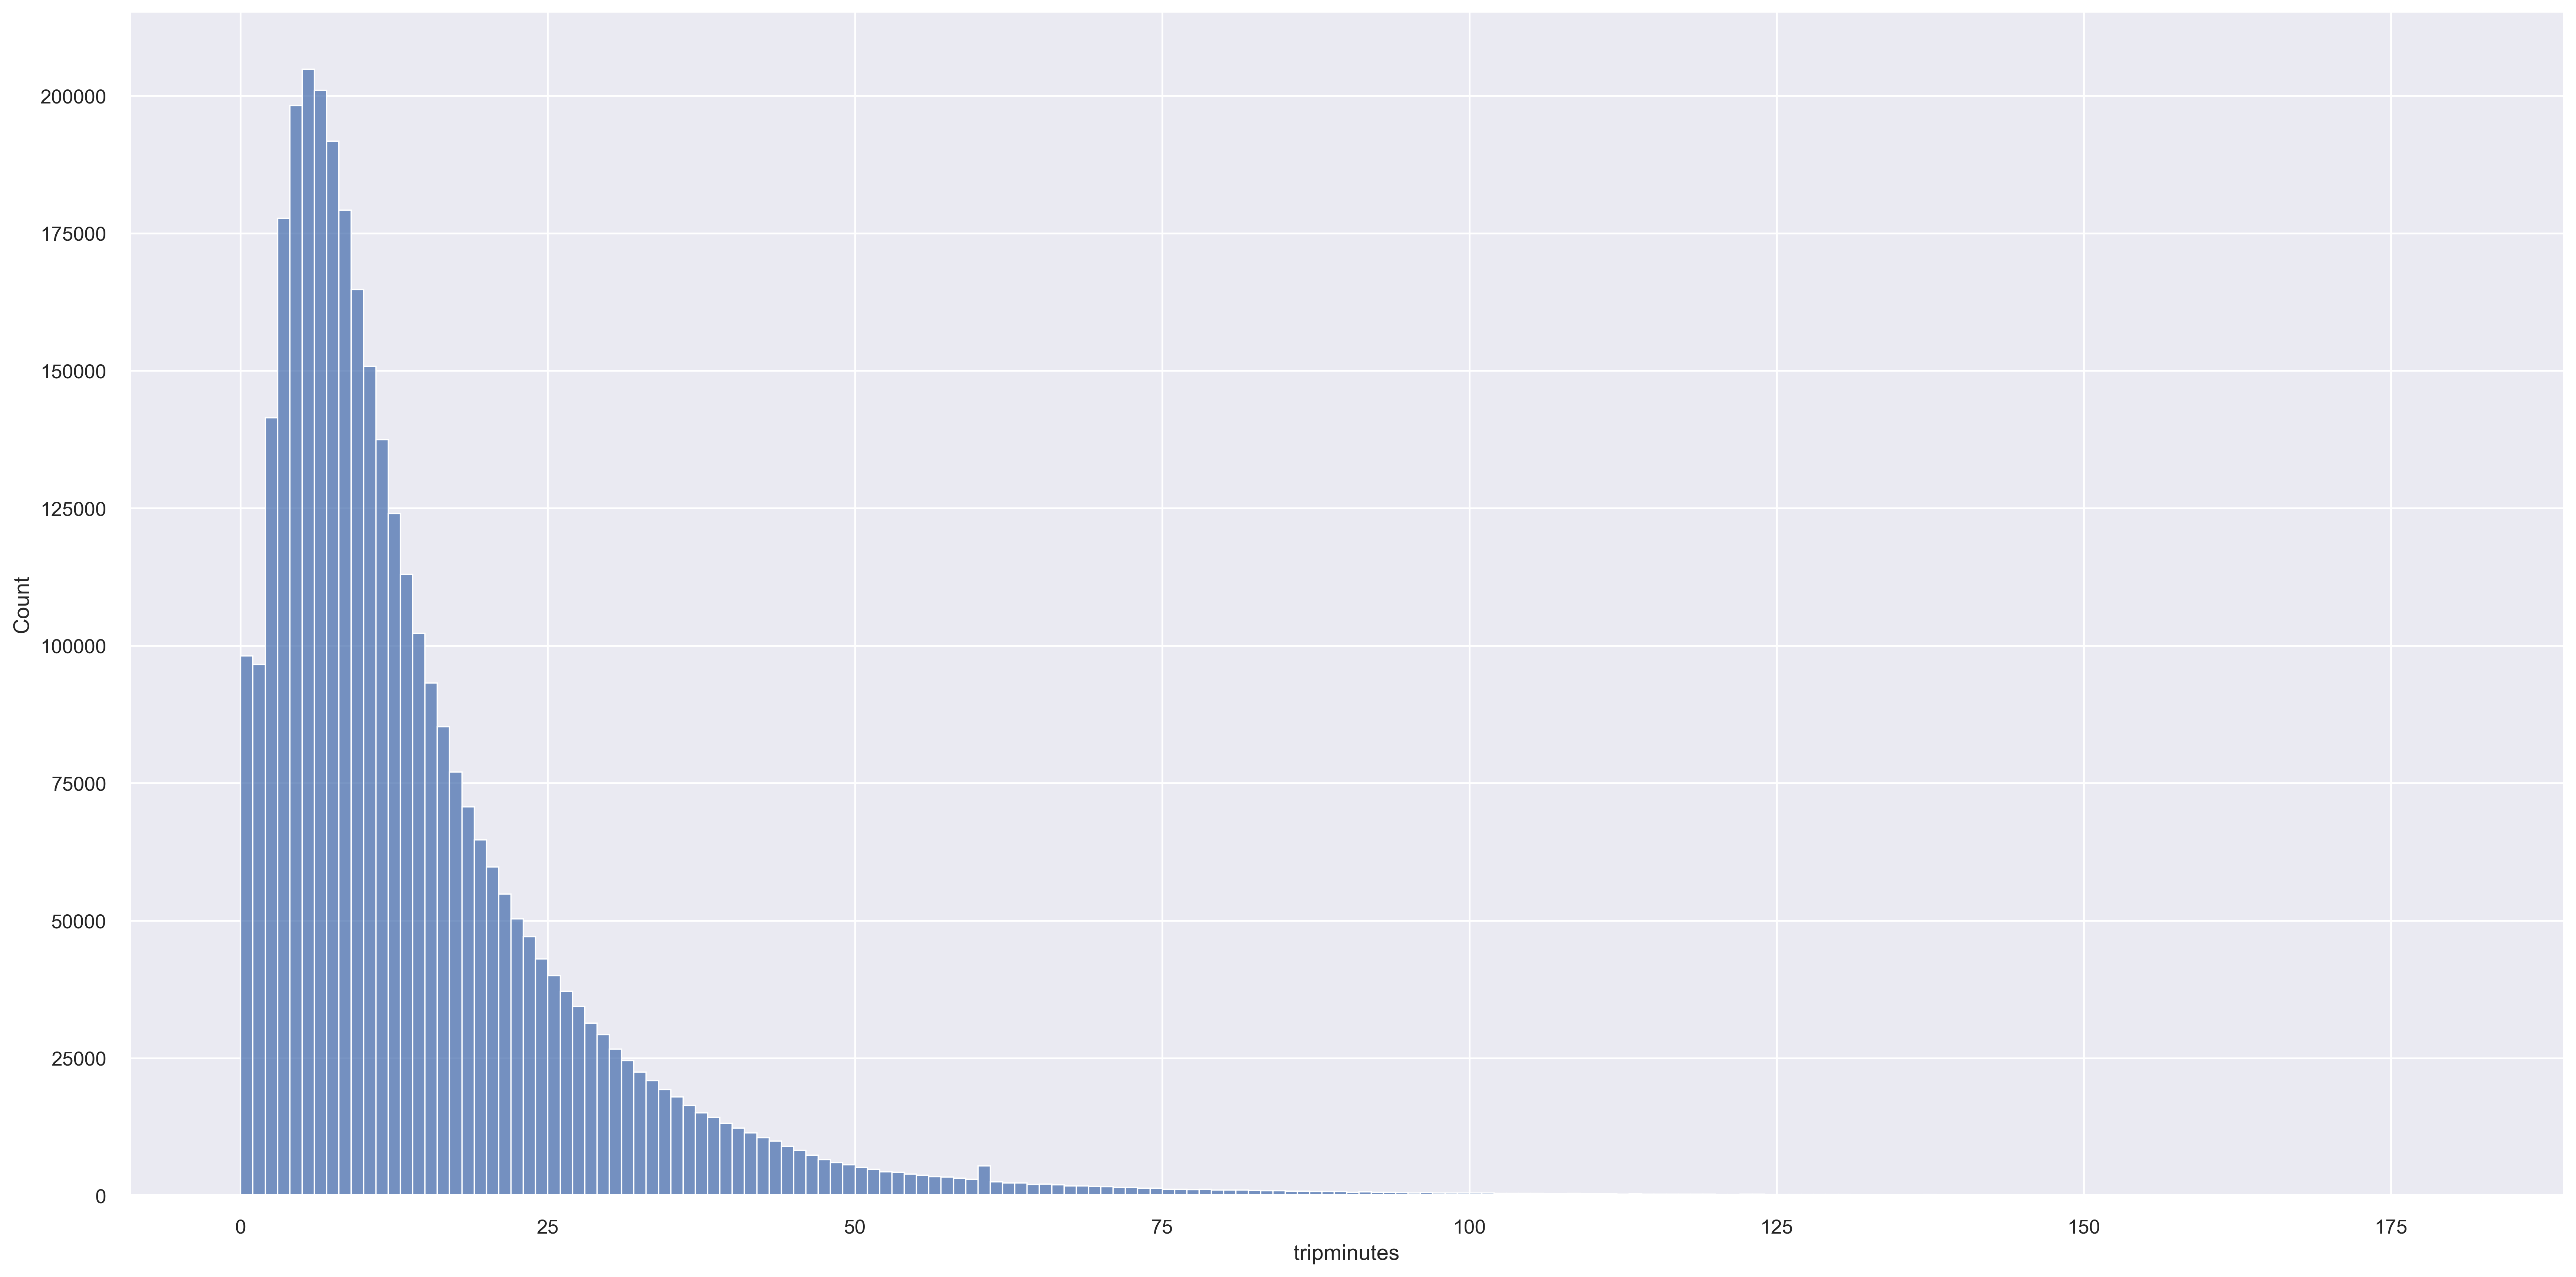

In [8]:
#1 - histogram of ride durations 
pd.options.mode.chained_assignment = None  # default='warn'

df_new['tripminutes'] = df_new.trip_duration.dt.seconds/60
sns.displot(data=df_new,x="tripminutes", bins=range(0,181), height=10, aspect=2)


Based on the histogram, most of trip durations were less than 25 minutes.

## 2. Expected Ride Duration, Variance, Probability

$E \ [Ride \ Duration] = 14.994 \ mins$ 

calculated by np.mean of tripminutes column


$\sigma = 232.833$ 

calculated by taking np.var of the tripminutes column


$P(Ride \ Duration > 20 \ mins) = 0.2327$

calculated by finding the number of rows where tripminutes is greater than 20 divided by total number of rows

In [9]:
#2 
# df_new.describe().round(2)
print('Expected Ride Duration:', df_new.tripminutes.mean()) 
print('Empirical Variance:', df_new.tripminutes.var()) 


# Probability ride duration > 20 mins
p_20mins = sum(df_new['tripminutes'] > 20)/len(df_new)
print('P(tripminutes > 20):', p_20mins)

Expected Ride Duration: 14.993813519267052
Empirical Variance: 232.8328785622765
P(tripminutes > 20): 0.2327215395657151


## 3. Probability Ride Duration is greater than 20 minutes, Given user is a Member

$P( Ride \ Duration > 20 \ mins \ | \ Member) = 0.18609$

calculated by taking the number of rows where user is a member and tripminutes is greater than 20 divided by the number of rows of user being a member

In [10]:
#3 Probability ride duration > 20 given member
df_mem = df_new[df_new['member_casual'] == 'member']
cond = sum(df_mem['tripminutes'] > 20)/len(df_mem)
print('P(tripminutes > 20 | member): ', cond)

P(tripminutes > 20 | member):  0.18609139832749863


## 4. Probability user is a Member, given Ride Duration is greater than 25 minutes

$P \ (Member \ | \ Ride \ Duration > 25 \ mins) =0.58393$

calculated by taking the number of rows where tripminutes is greater than 25 and user is a member divided by the number of rows of tripminutes is greater than 25

In [11]:
#4 Probability member given ride duration > 25
df_25 = df_new[df_new['tripminutes'] > 25]
cond = sum(df_25['member_casual'] == 'member')/len(df_25)
print('P(member | tripminutes > 25): ', cond)

P(member | tripminutes > 25):  0.5839272451304628


## 5. Expected Ride Duration for Electric and Classic Bikes

$E \ [Ride \ Duration \ | \ Electric] = 15.1707 \ mins \\ E \ [Ride \ Duration \ | \ Classic] = 14.7315 \ mins$

calculated by taking the mean where rideable_type is electric and where rideable_type is classic

In [12]:
#5 Expected ride duration of electric, classic
df_electric = df_new[df_new['rideable_type'] == 'electric_bike']
df_classic = df_new[df_new['rideable_type'] == 'classic_bike']

print('Expected Ride Duration (Electric):', df_electric['tripminutes'].mean())
print('Expected Ride Duration (Classic):', df_classic['tripminutes'].mean())

Expected Ride Duration (Electric): 15.170728448189486
Expected Ride Duration (Classic): 14.731529263276226


## 6. Probability Bike is Electric/Classic, given Ride Duration is less than 10 minutes

$P (Electric \ | \ Ride \ Duration < 10 \ mins) = 0.2338$

$P (Classic \ | \ Ride \ Duration < 10 \ mins) = 0.7635$

calculated by number of rows where tripminutes is less than 10 and is electric/classic divided by the number of rows where tripminutes is less than 10

In [13]:
#6 Ride Duration < 10, Probability electric, probability classic
df_10 = df_new[df_new['tripminutes'] < 10]
electric = sum(df_10['rideable_type'] == 'electric_bike')/len(df_10)
classic = sum(df_10['rideable_type'] == 'classic_bike')/len(df_10)

print('P(electric | tripminutes <10):', electric)
print('P(classic | tripminutes <10):', classic)

P(electric | tripminutes <10): 0.23379223076630087
P(classic | tripminutes <10): 0.7634756659010651


P(electric | tripminutes <10) + P(classic | tripminutes <10) does not equal 1. This is because there are three unique types of bikes: classic, electric, and docked. P(docked| tripminutes <10) = 1 - (P(electric | tripminutes <10) + P(classic | tripminutes <10))

$P(electric \ | \ Ride \ Duration < 10) + P(classic \ | \ Ride \ Duration < 10) \neq 1$

This is because there are three unique types of bikes: classic, electric, and docked:

$P(docked \ | \ Ride \ Duration < 10) = 1 - [ P(electric \ | \ Ride \ Duration < 10) + P(classic \ | \ Ride \ Duration < 10) ]$

In [14]:
print('Sum of probabilities', electric+classic)
df_new['rideable_type'].unique()

Sum of probabilities 0.9972678966673659


['classic_bike', 'electric_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'docked_bike', 'electric_bike']

# Project
Disclaimer: The project is done chronologically, so there is some code/working out at the beginning that is not relatively efficient but will be improved upon towards the end of the project.

## Data Preprocessing

To begin with the project, three stations were random selected after grouping the rides to have a general idea of which stations are most popular. The following stations were selected and their respective capacities found on Google Maps:
* Broadway & W 25 St (67 bikes)
* Great Jones St (19 bikes)
* 9 Ave & W 22 St (58 bikes)

We verified that there were a sufficient amount of trips from and to these stations in the dataset before continuing. We chose Great Jones St as a starting point for this project because it is a relatively popular station that has a low amount of docks, so we can compute the probability matrix and stationary distributions easier. 

In [15]:
#selecting stations
start_grouped = df_new.groupby(['start_station_name'])['start_station_name'].size().sort_values(ascending=False)
start_grouped1 = start_grouped.to_frame().rename({'start_station_name': 'count'}, axis=1).reset_index()

display(start_grouped1)

start_grouped1.loc[(start_grouped1.start_station_name == 'Great Jones St')]

start_station_name  count
0        West St & Chambers St  15830
1              W 21 St & 6 Ave  13492
2           Broadway & W 58 St  12744
3           Broadway & E 14 St  12645
4              6 Ave & W 33 St  12596
...                        ...    ...
1578         Morgan WH station     17
1579      Morgan Loading Docks     15
1580  Nassau St\t& Duffield St     14
1581            54 St & 37 Ave     10
1582                 Lab - NYC      2

[1583 rows x 2 columns]

start_station_name  count
207     Great Jones St   4858

All rides that didn't contain the three stations as either its start station or end station were removed from the dataset. The code below keeps only the trip data of start and ending stations of the stations we selected.

In [16]:
df_station = df_new.loc[(df_new.start_station_name == 'Broadway & W 25 St')|\
    (df_new.start_station_name == 'Great Jones St')|(df_new.start_station_name == '9 Ave & W 22 St')|\
        (df_new.end_station_name == 'Broadway & W 25 St')| (df_new.end_station_name == 'Great Jones St')|\
            (df_new.end_station_name == '9 Ave & W 22 St')]

df_station

ride_id  rideable_type          started_at  \
10236    155D0D1BBC944742   classic_bike 2022-07-09 17:27:19   
10238    D2A5A41003BF2B38   classic_bike 2022-07-19 17:36:06   
10301    12FFE79CF0206F63   classic_bike 2022-07-15 13:48:26   
10303    ACBF3C853263D449  electric_bike 2022-07-19 19:20:40   
10315    9355209F0E352E34   classic_bike 2022-07-16 19:47:33   
...                   ...            ...                 ...   
3493668  A858C082C59400C0   classic_bike 2022-07-19 08:41:17   
3493669  31442C0620C8CAF6   classic_bike 2022-07-08 08:44:36   
3493702  B10956701CFC7DC6  electric_bike 2022-07-18 05:23:40   
3493799  D71B1DEE024A47DD  electric_bike 2022-07-27 08:40:01   
3493920  026FCCE0A2433602   classic_bike 2022-07-26 07:02:35   

                   ended_at   start_station_name  \
10236   2022-07-09 17:57:26      E 68 St & 3 Ave   
10238   2022-07-19 17:57:02     W 34 St & 11 Ave   
10301   2022-07-15 14:07:55  FDR Drive & E 35 St   
10303   2022-07-19 19:25:56      E 20 St & 2 Ave   
10315   2022-07-16 20:03:44     W 37 St & 10 Ave   
...                     ...                  ...   
3493668 2022-07-19 08:58:15      9 Ave & W 22 St   
3493669 2022-07-08 09:01:25      9 Ave & W 22 St   
3493702 2022-07-18 05:35:56      9 Ave & W 22 St   
3493799 2022-07-27 08:59:27      9 Ave & W 22 St   
3493920 2022-07-26 07:18:43      9 Ave & W 22 St   

                          end_station_name member_casual   trip_duration  \
10236                       Great Jones St        member 0 days 00:30:07   
10238                       Great Jones St        member 0 days 00:20:56   
10301                       Great Jones St        member 0 days 00:19:29   
10303                       Great Jones St        member 0 days 00:05:16   
10315                       Great Jones St        member 0 days 00:16:11   
...                                    ...           ...             ...   
3493668  Grand Army Plaza & Central Park S        member 0 days 00:16:58   
3493669  Grand Army Plaza & Central Park S        member 0 days 00:16:49   
3493702  Grand Army Plaza & Central Park S        member 0 days 00:12:16   
3493799  Grand Army Plaza & Central Park S        member 0 days 00:19:26   
3493920             Forsyth St & Broome St        member 0 days 00:16:08   

         tripminutes  
10236      30.116667  
10238      20.933333  
10301      19.483333  
10303       5.266667  
10315      16.183333  
...              ...  
3493668    16.966667  
3493669    16.816667  
3493702    12.266667  
3493799    19.433333  
3493920    16.133333  

[50282 rows x 9 columns]

For this project, weekends were removed from the dataset as we only want to model the activity of weekdays. This is because the activity during the weekend isn't representative of the activity during the weekdays.

In [17]:
# removing weekends (weekday >= 5 )
df_station = df_station[df_station.started_at.dt.dayofweek < 5]

For similar reasons, the dataset was split between morning and evening as the patterns differ based on the time. The morning block is between 7am to 12pm, whilst the evening block is between 2pm to 9pm. We chose 7am to 12pm for the morning time block because it represents a time period where there is more activity. This means that there will be less discrete time periods within the morning where there is no activity. For example, if we chose 3am to 12pm, we felt that the minimal activity during the early morning would not fully represent the activity during the morning, whereas 7am to 12pm gives a better representation of morning activity while still keeping many data points. Similar justification for the evening time block chosen.

In [18]:
#split morning and evening
time = df_station.started_at.dt.hour
time.value_counts().sort_values(ascending=False)

18    3833
17    3646
19    2641
16    2547
9     2169
8     2167
15    2108
14    2005
13    1883
12    1858
20    1808
11    1586
10    1527
7     1198
21    1112
22     887
23     633
6      578
0      253
5      197
1      126
2       72
3       46
4       32
Name: started_at, dtype: int64

The cell below creates the variables for morning and evening start and end time so we can change these as needed. We create a morning dataframe and an evening dataframe to sort the data.

In [19]:
morning_start_time = 7 
morning_end_time = 12
evening_start_time = 14
evening_end_time = 21

df_morning = df_station[(df_station.started_at.dt.hour >= morning_start_time) & (df_station.started_at.dt.hour < morning_end_time)]
df_evening = df_station[(df_station.started_at.dt.hour >= evening_start_time) & (df_station.started_at.dt.hour < evening_end_time)]

df_morning #datafrane of morning data

ride_id  rideable_type          started_at  \
10316    ADEC6864444B9FF3   classic_bike 2022-07-27 08:50:20   
10431    20A167BFFEB85DE5   classic_bike 2022-07-27 09:02:01   
10466    8FE9CDD3C2311975   classic_bike 2022-07-08 09:58:24   
10477    4F79A05A5BA11C47   classic_bike 2022-07-25 10:03:49   
10482    7C66EA9BBD75D1EC   classic_bike 2022-07-22 07:01:47   
...                   ...            ...                 ...   
3493667  9069768807DBCD07   classic_bike 2022-07-18 08:38:07   
3493668  A858C082C59400C0   classic_bike 2022-07-19 08:41:17   
3493669  31442C0620C8CAF6   classic_bike 2022-07-08 08:44:36   
3493799  D71B1DEE024A47DD  electric_bike 2022-07-27 08:40:01   
3493920  026FCCE0A2433602   classic_bike 2022-07-26 07:02:35   

                   ended_at        start_station_name  \
10316   2022-07-27 09:17:42          W 34 St & 11 Ave   
10431   2022-07-27 09:23:36          W 22 St & 10 Ave   
10466   2022-07-08 09:59:50  Washington Pl & Broadway   
10477   2022-07-25 10:12:31     Clinton St & Grand St   
10482   2022-07-22 07:12:55    Clinton St & Cherry St   
...                     ...                       ...   
3493667 2022-07-18 08:55:08           9 Ave & W 22 St   
3493668 2022-07-19 08:58:15           9 Ave & W 22 St   
3493669 2022-07-08 09:01:25           9 Ave & W 22 St   
3493799 2022-07-27 08:59:27           9 Ave & W 22 St   
3493920 2022-07-26 07:18:43           9 Ave & W 22 St   

                          end_station_name member_casual   trip_duration  \
10316                       Great Jones St        member 0 days 00:27:22   
10431                       Great Jones St        member 0 days 00:21:35   
10466                       Great Jones St        member 0 days 00:01:26   
10477                       Great Jones St        member 0 days 00:08:42   
10482                       Great Jones St        member 0 days 00:11:08   
...                                    ...           ...             ...   
3493667  Grand Army Plaza & Central Park S        member 0 days 00:17:01   
3493668  Grand Army Plaza & Central Park S        member 0 days 00:16:58   
3493669  Grand Army Plaza & Central Park S        member 0 days 00:16:49   
3493799  Grand Army Plaza & Central Park S        member 0 days 00:19:26   
3493920             Forsyth St & Broome St        member 0 days 00:16:08   

         tripminutes  
10316      27.366667  
10431      21.583333  
10466       1.433333  
10477       8.700000  
10482      11.133333  
...              ...  
3493667    17.016667  
3493668    16.966667  
3493669    16.816667  
3493799    19.433333  
3493920    16.133333  

[8647 rows x 9 columns]

## 9 Ave & W 22 St - 58 Capacity

### Morning

We first want to get the probability distribution for a station, so we started by looking at the data for 9 Ave and W 22 St in the morning.

In [20]:
df_morning = df_morning.drop(columns=['rideable_type','member_casual','trip_duration','tripminutes']) #drop columns
df_morning = df_morning.sort_values(by='started_at') #sort by started at time

Here are the number of rides in July in the morning and evening for time blocks we selected for this station.

In [21]:
df_9ave_morning = df_morning.loc[(df_morning.start_station_name == '9 Ave & W 22 St')|(df_morning.end_station_name == '9 Ave & W 22 St')]
df_9ave_evening = df_evening.loc[(df_evening.start_station_name == '9 Ave & W 22 St')|(df_evening.end_station_name == '9 Ave & W 22 St')]

print("Amount of rides entering or exiting in the morning in July 2022:", df_9ave_morning.index.size)
print("Amount of rides entering or exiting in the evening in July 2022:", df_9ave_evening.index.size)

Amount of rides entering or exiting in the morning in July 2022: 2716
Amount of rides entering or exiting in the evening in July 2022: 6527


The functions below is created to apply to the data dataframe. If a row has a start station name NOT EQUAL to 9 ave and end station name EQUAL to 9 ave, the function returns 1, which means that there is 1 bike entering the station. If a row has a start station name EQUAL to 9 ave and end station name NOT EQUAL to 9 ave, then the function returns -1, which means that there is 1 bike exiting the station.

In [22]:
def bike_in_9ave(row):
    if row['start_station_name'] != "9 Ave & W 22 St" and row['end_station_name'] == "9 Ave & W 22 St":
        x = 1
    else:
        x = 0
    return x

def bike_out_9ave(row):
    if row['start_station_name'] == "9 Ave & W 22 St" and row['end_station_name'] != "9 Ave & W 22 St":
        x = -1
    else:
        x = 0
    return x

The code block below creates separate columns in the dataframe referring to if there is a bike entering or exiting the station. `df_ave_in` and `df_ave_out` group the individual data points of the bikes going in and out into 5 minute intervals starting at 7am and ending on 12pm on each weekday and sum it together. 

The first 4 lines of code calculates if a bike enters or exits at a specific time, then groups them into 5 minute intervals and sums it together to discretize the time. This is done for bikes in and out separately at first, then they are merged together to calculate the net flow of bikes during each discretized time interval. This can be seen more clearly in the output of the code cell, where there is a time block, in, out, and net flow column.

When the time is resampled into 5 minute intervals, it creates a continuous time interval again, so it needs to be filtered again by weekday and morning time block.

The net flow is calculated by adding in and out in each respective time interval. Therefore, we can see that at time = 0, net flow = 0; t = 1, netflow = 0; t = 2, netflow = 0; t = 3, netflow = -2, t = 4, netflow = -1, and so on, for this station in the morning.

In [23]:
#create new column In
df_9ave_morning['In'] = df_9ave_morning.apply(bike_in_9ave, axis=1)
#create new column Out
df_9ave_morning['Out'] = df_9ave_morning.apply(bike_out_9ave, axis=1)

#calculate the amount of bikes in / out
df_9ave_in = df_9ave_morning.groupby(pd.Grouper(key="started_at", freq='5T'))['In'].sum().to_frame()
df_9ave_out = df_9ave_morning.groupby(pd.Grouper(key="ended_at", freq='5T'))['Out'].sum().to_frame()

#merge in and out dataframe 
merge_9ave = pd.concat([df_9ave_in, df_9ave_out], axis=1).fillna(0)
nineave_morning = merge_9ave.reset_index().rename({'index': 'Time'}, axis=1)

#filter by weekday and morning time
nineave_morning = nineave_morning[nineave_morning.Time.dt.dayofweek < 5]
nineave_morning = nineave_morning[(nineave_morning.Time.dt.hour >= morning_start_time) & (nineave_morning.Time.dt.hour < morning_end_time)]

#net flow calculated by in + out
nineave_morning['Net Flow'] = nineave_morning['In'] + nineave_morning['Out']
nineave_morning['Net Flow'] = nineave_morning['Net Flow'].apply(int)
nineave_morning = nineave_morning.reset_index().drop(columns = 'index')
nineave_morning

Time   In  Out  Net Flow
0    2022-07-01 07:05:00  0.0  0.0         0
1    2022-07-01 07:10:00  0.0  0.0         0
2    2022-07-01 07:15:00  0.0  0.0         0
3    2022-07-01 07:20:00  0.0 -2.0        -2
4    2022-07-01 07:25:00  0.0 -1.0        -1
...                  ...  ...  ...       ...
1254 2022-07-29 11:35:00  0.0 -1.0        -1
1255 2022-07-29 11:40:00  1.0 -3.0        -2
1256 2022-07-29 11:45:00  3.0 -3.0         0
1257 2022-07-29 11:50:00  2.0 -2.0         0
1258 2022-07-29 11:55:00  1.0 -1.0         0

[1259 rows x 4 columns]

The probability is calculated by counting the amount of times each value of netflow occurs divided by the amount of times in total as seen below. So for example, It can be seen below that net flow = 0 happens 413 times, and so on, and the probability is calculated by 413 divided by the sum of all counts (which is 1259) for the morning time period in July.

This means we get the probability to go from state i to state j in one time step:

$$ Pr(j|i) = P_{i,j} $$

where $i$ is the state at time $n$ and $j$ is the state at time $n+1$. Therefore, it can be seen that 

$$P_{i, i} = 0.328$$ 
$$P_{i, i+1} = 0.143$$ 
$$P_{i, i-1} = 0.114$$ 

in most cases, but there will be some cases at the extremes where this will not be the case, for example, $P_{0,0}$. This will be discussed later when creating the transition matrix for stations.

In [24]:
nineave_morning_probabilities = (nineave_morning.groupby(['Net Flow'])['Net Flow'].count()/nineave_morning.groupby(['Net Flow'])['Net Flow'].count().sum()).to_frame().rename({'Net Flow': 'Probability'}, axis=1).reset_index()
display(nineave_morning.groupby(['Net Flow'])['Net Flow'].count().to_frame())
nineave_morning_probabilities

Net Flow
Net Flow          
-7               2
-6               6
-5              16
-4              42
-3              80
-2             144
-1             284
 0             413
 1             180
 2              68
 3              18
 4               5
 5               1

Net Flow  Probability
0         -7     0.001589
1         -6     0.004766
2         -5     0.012708
3         -4     0.033360
4         -3     0.063542
5         -2     0.114376
6         -1     0.225576
7          0     0.328038
8          1     0.142971
9          2     0.054011
10         3     0.014297
11         4     0.003971
12         5     0.000794

### Evening

The same is done for the evening to calculate the probability array. We initially did these all separately to get an idea of the method of finding probabilities, later we will define a general function to generalize this method and find the probability array of any station in the morning or evening. The next section will all be working out.

In [25]:
df_9ave_evening['In'] = df_9ave_evening.apply(bike_in_9ave, axis=1)
df_9ave_evening['Out'] = df_9ave_evening.apply(bike_out_9ave, axis=1)

dfe_9ave_in = df_9ave_evening.groupby(pd.Grouper(key="started_at", freq='5T'))['In'].sum().to_frame()
dfe_9ave_out = df_9ave_evening.groupby(pd.Grouper(key="ended_at", freq='5T'))['Out'].sum().to_frame()

merge_9ave_evening = pd.concat([dfe_9ave_in, dfe_9ave_out], axis=1).fillna(0)
nineave_evening = merge_9ave_evening.reset_index().rename({'index': 'Time'}, axis=1)

nineave_evening = nineave_evening[nineave_evening.Time.dt.dayofweek < 5]
nineave_evening = nineave_evening[(nineave_evening.Time.dt.hour >= evening_start_time) & (nineave_evening.Time.dt.hour < evening_end_time)]

nineave_evening['Net Flow'] = nineave_evening['In'] + nineave_evening['Out']
nineave_evening['Net Flow'] = nineave_evening['Net Flow'].apply(int)
nineave_evening = nineave_evening.reset_index().drop(columns = 'index')
nineave_evening


Time   In  Out  Net Flow
0    2022-07-01 14:00:00  2.0  0.0         2
1    2022-07-01 14:05:00  0.0 -1.0        -1
2    2022-07-01 14:10:00  3.0  0.0         3
3    2022-07-01 14:15:00  2.0 -1.0         1
4    2022-07-01 14:20:00  4.0 -2.0         2
...                  ...  ...  ...       ...
1759 2022-07-29 20:35:00  0.0 -1.0        -1
1760 2022-07-29 20:40:00  2.0  0.0         2
1761 2022-07-29 20:45:00  0.0 -1.0        -1
1762 2022-07-29 20:50:00  2.0 -1.0         1
1763 2022-07-29 20:55:00  2.0 -5.0        -3

[1764 rows x 4 columns]

In [26]:
nineave_evening_probabilities = (nineave_evening.groupby(['Net Flow'])['Net Flow'].count()/nineave_evening.groupby(['Net Flow'])['Net Flow'].count().sum()).to_frame().rename({'Net Flow': 'Probability'}, axis=1).reindex(range(-8,10)).fillna(0).reset_index()
nineave_evening_probabilities

Net Flow  Probability
0         -8     0.001134
1         -7     0.001134
2         -6     0.002834
3         -5     0.006803
4         -4     0.017574
5         -3     0.037415
6         -2     0.079365
7         -1     0.155329
8          0     0.233560
9          1     0.201247
10         2     0.128118
11         3     0.074830
12         4     0.035147
13         5     0.013605
14         6     0.005669
15         7     0.005669
16         8     0.000000
17         9     0.000567

## Great Jones St - 19 Capacity

The same calculations from 9 Ave & W 22 St was implemented for Great Jones St to get its probabilities.

### Morning

In [27]:
df_gj_morning = df_morning.loc[(df_morning.start_station_name == 'Great Jones St')|(df_morning.end_station_name == 'Great Jones St')]
df_gj_evening = df_evening.loc[(df_evening.start_station_name == 'Great Jones St')|(df_evening.end_station_name == 'Great Jones St')]

print("Amount of rides entering or exiting in the morning in July 2022:", df_gj_morning.index.size)
print("Amount of rides entering or exiting in the evening in July 2022:", df_gj_evening.index.size)

Amount of rides entering or exiting in the morning in July 2022: 1496
Amount of rides entering or exiting in the evening in July 2022: 3548


In [28]:
def bike_in_gj(row):
    if row['start_station_name'] != "Great Jones St" and row['end_station_name'] == "Great Jones St":
        x = 1
    else:
        x = 0
    return x

def bike_out_gj(row):
    if row['start_station_name'] == "Great Jones St" and row['end_station_name'] != "Great Jones St":
        x = -1
    else:
        x = 0
    return x

In [29]:
df_gj_morning['In'] = df_gj_morning.apply(bike_in_gj, axis=1)
df_gj_morning['Out'] = df_gj_morning.apply(bike_out_gj, axis=1)

df_gj_in = df_gj_morning.groupby(pd.Grouper(key="started_at", freq='5T'))['In'].sum().to_frame()
df_gj_out = df_gj_morning.groupby(pd.Grouper(key="ended_at", freq='5T'))['Out'].sum().to_frame()

merge_gj = pd.concat([df_gj_in, df_gj_out], axis=1).fillna(0)
greatjones_morning = merge_gj.reset_index().rename({'index': 'Time'}, axis=1)

greatjones_morning = greatjones_morning[greatjones_morning.Time.dt.dayofweek < 5]
greatjones_morning = greatjones_morning[(greatjones_morning.Time.dt.hour >= morning_start_time) & (greatjones_morning.Time.dt.hour < morning_end_time)]

greatjones_morning['Net Flow'] = greatjones_morning['In'] + greatjones_morning['Out']
greatjones_morning['Net Flow'] = greatjones_morning['Net Flow'].apply(int)
greatjones_morning = greatjones_morning.reset_index().drop(columns = 'index')
greatjones_morning

Time   In  Out  Net Flow
0    2022-07-01 07:30:00  1.0  0.0         1
1    2022-07-01 07:35:00  2.0  0.0         2
2    2022-07-01 07:40:00  0.0 -1.0        -1
3    2022-07-01 07:45:00  0.0  0.0         0
4    2022-07-01 07:50:00  1.0 -1.0         0
...                  ...  ...  ...       ...
1249 2022-07-29 11:35:00  1.0 -1.0         0
1250 2022-07-29 11:40:00  2.0 -3.0        -1
1251 2022-07-29 11:45:00  4.0 -2.0         2
1252 2022-07-29 11:50:00  2.0 -5.0        -3
1253 2022-07-29 11:55:00  1.0 -2.0        -1

[1254 rows x 4 columns]

In [30]:
greatjones_morning_probabilities = (greatjones_morning.groupby(['Net Flow'])['Net Flow'].count()/greatjones_morning.groupby(['Net Flow'])['Net Flow'].count().sum()).to_frame().rename({'Net Flow': 'Probability'}, axis=1).reset_index()
greatjones_morning_probabilities

Net Flow  Probability
0        -5     0.000797
1        -4     0.001595
2        -3     0.011962
3        -2     0.050239
4        -1     0.151515
5         0     0.526316
6         1     0.182616
7         2     0.056619
8         3     0.014354
9         4     0.003987

### Evening

In [31]:
df_gj_evening['In'] = df_gj_evening.apply(bike_in_gj, axis=1)
df_gj_evening['Out'] = df_gj_evening.apply(bike_out_gj, axis=1)

dfe_gj_in = df_gj_evening.groupby(pd.Grouper(key="started_at", freq='5T'))['In'].sum().to_frame()
dfe_gj_out = df_gj_evening.groupby(pd.Grouper(key="ended_at", freq='5T'))['Out'].sum().to_frame()

merge_gje = pd.concat([dfe_gj_in, dfe_gj_out], axis=1).fillna(0)
greatjones_evening = merge_gje.reset_index().rename({'index': 'Time'}, axis=1)

greatjones_evening = greatjones_evening[greatjones_evening.Time.dt.dayofweek < 5]
greatjones_evening = greatjones_evening[(greatjones_evening.Time.dt.hour >= evening_start_time) & (greatjones_evening.Time.dt.hour < evening_end_time)]

greatjones_evening['Net Flow'] = greatjones_evening['In'] + greatjones_evening['Out']
greatjones_evening['Net Flow'] = greatjones_evening['Net Flow'].apply(int)
greatjones_evening = greatjones_evening.reset_index().drop(columns = 'index')
greatjones_evening

Time   In  Out  Net Flow
0    2022-07-01 14:05:00  1.0  0.0         1
1    2022-07-01 14:10:00  0.0  0.0         0
2    2022-07-01 14:15:00  0.0  0.0         0
3    2022-07-01 14:20:00  0.0  0.0         0
4    2022-07-01 14:25:00  0.0 -1.0        -1
...                  ...  ...  ...       ...
1758 2022-07-29 20:35:00  1.0  0.0         1
1759 2022-07-29 20:40:00  0.0 -1.0        -1
1760 2022-07-29 20:45:00  0.0 -7.0        -7
1761 2022-07-29 20:50:00  0.0 -2.0        -2
1762 2022-07-29 20:55:00  0.0  0.0         0

[1763 rows x 4 columns]

In [32]:
greatjones_evening_probabilities = (greatjones_evening.groupby(['Net Flow'])['Net Flow'].count()/greatjones_evening.groupby(['Net Flow'])['Net Flow'].count().sum()).to_frame().rename({'Net Flow': 'Probability'}, axis=1).reset_index()
greatjones_evening_probabilities

Net Flow  Probability
0         -7     0.000567
1         -6     0.001134
2         -5     0.006239
3         -4     0.008508
4         -3     0.032898
5         -2     0.060125
6         -1     0.180942
7          0     0.415201
8          1     0.183778
9          2     0.073171
10         3     0.023256
11         4     0.009643
12         5     0.002836
13         6     0.001134
14         7     0.000567

## Broadway & W 25 St - 67 Bikes

The same calculations from 9 Ave & W 22 St was implemented for Broadway & W 25 St to get its probabilities.

### Morning

In [33]:
df_br_morning = df_morning.loc[(df_morning.start_station_name == 'Broadway & W 25 St')|(df_morning.end_station_name == 'Broadway & W 25 St')]
df_br_evening = df_evening.loc[(df_evening.start_station_name == 'Broadway & W 25 St')|(df_evening.end_station_name == 'Broadway & W 25 St')]

print("Amount of rides entering or exiting in the morning in July 2022:", df_br_morning.index.size)
print("Amount of rides entering or exiting in the evening in July 2022:",df_br_evening.index.size)

Amount of rides entering or exiting in the morning in July 2022: 4488
Amount of rides entering or exiting in the evening in July 2022: 8604


In [34]:
def bike_in_br(row):
    if row['start_station_name'] != "Broadway & W 25 St" and row['end_station_name'] == "Broadway & W 25 St":
        x = 1
    else:
        x = 0
    return x

def bike_out_br(row):
    if row['start_station_name'] == "Broadway & W 25 St" and row['end_station_name'] != "Broadway & W 25 St":
        x = -1
    else:
        x = 0
    return x

In [35]:
df_br_morning['In'] = df_br_morning.apply(bike_in_br, axis=1)
df_br_morning['Out'] = df_br_morning.apply(bike_out_br, axis=1)

df_br_in = df_br_morning.groupby(pd.Grouper(key="started_at", freq='5T'))['In'].sum().to_frame()
df_br_out = df_br_morning.groupby(pd.Grouper(key="ended_at", freq='5T'))['Out'].sum().to_frame()

merge_br = pd.concat([df_br_in,df_br_out], axis=1).fillna(0)
broadway_morning = merge_br.reset_index().rename({'index': 'Time'}, axis=1)

broadway_morning = broadway_morning[broadway_morning.Time.dt.dayofweek < 5]
broadway_morning = broadway_morning[(broadway_morning.Time.dt.hour >= morning_start_time) & (broadway_morning.Time.dt.hour < morning_end_time)]

broadway_morning['Net Flow'] = (broadway_morning['In'] + broadway_morning['Out'])
broadway_morning['Net Flow'] = broadway_morning['Net Flow'].apply(int)
broadway_morning = broadway_morning.reset_index().drop(columns = 'index')
broadway_morning

Time   In  Out  Net Flow
0    2022-07-01 07:05:00  1.0  0.0         1
1    2022-07-01 07:10:00  0.0  0.0         0
2    2022-07-01 07:15:00  0.0  0.0         0
3    2022-07-01 07:20:00  2.0  0.0         2
4    2022-07-01 07:25:00  1.0  0.0         1
...                  ...  ...  ...       ...
1254 2022-07-29 11:35:00  3.0 -1.0         2
1255 2022-07-29 11:40:00  8.0  0.0         8
1256 2022-07-29 11:45:00  4.0 -3.0         1
1257 2022-07-29 11:50:00  2.0 -1.0         1
1258 2022-07-29 11:55:00  1.0 -4.0        -3

[1259 rows x 4 columns]

In [36]:
broadway_morning_probabilities = (broadway_morning.groupby(['Net Flow'])['Net Flow'].count()/broadway_morning.groupby(['Net Flow'])['Net Flow'].count().sum()).to_frame().rename({'Net Flow': 'Probability'}, axis=1).reindex(range(-8,12)).fillna(0).reset_index()
broadway_morning_probabilities

Net Flow  Probability
0         -8     0.001589
1         -7     0.000794
2         -6     0.000794
3         -5     0.000794
4         -4     0.007149
5         -3     0.018268
6         -2     0.062748
7         -1     0.129468
8          0     0.218427
9          1     0.223193
10         2     0.146148
11         3     0.079428
12         4     0.057983
13         5     0.026211
14         6     0.016680
15         7     0.005560
16         8     0.003971
17         9     0.000000
18        10     0.000000
19        11     0.000794

### Evening

In [37]:
df_br_evening['In'] = df_br_evening.apply(bike_in_br, axis=1)
df_br_evening['Out'] = df_br_evening.apply(bike_out_br, axis=1)

dfe_br_in = df_br_evening.groupby(pd.Grouper(key="started_at", freq='5T'))['In'].sum().to_frame()
dfe_br_out = df_br_evening.groupby(pd.Grouper(key="ended_at", freq='5T'))['Out'].sum().to_frame()

merge_bre = pd.concat([dfe_br_in,dfe_br_out], axis=1).fillna(0)
broadway_evening = merge_bre.reset_index().rename({'index': 'Time'}, axis=1)

broadway_evening = broadway_evening[broadway_evening.Time.dt.dayofweek < 5]
broadway_evening = broadway_evening[(broadway_evening.Time.dt.hour >= evening_start_time) & (broadway_evening.Time.dt.hour < evening_end_time)]

broadway_evening['Net Flow'] = broadway_evening['In'] + broadway_evening['Out']
broadway_evening['Net Flow'] = broadway_evening['Net Flow'].apply(int)

broadway_evening = broadway_evening.reset_index().drop(columns = 'index')
broadway_evening

Time   In  Out  Net Flow
0    2022-07-01 14:00:00  2.0  0.0         2
1    2022-07-01 14:05:00  0.0 -1.0        -1
2    2022-07-01 14:10:00  2.0 -1.0         1
3    2022-07-01 14:15:00  2.0 -4.0        -2
4    2022-07-01 14:20:00  2.0 -3.0        -1
...                  ...  ...  ...       ...
1759 2022-07-29 20:35:00  3.0 -2.0         1
1760 2022-07-29 20:40:00  3.0  0.0         3
1761 2022-07-29 20:45:00  1.0 -1.0         0
1762 2022-07-29 20:50:00  8.0 -3.0         5
1763 2022-07-29 20:55:00  0.0 -3.0        -3

[1764 rows x 4 columns]

In [38]:
broadway_evening_probabilities = (broadway_evening.groupby(['Net Flow'])['Net Flow'].count()/broadway_evening.groupby(['Net Flow'])['Net Flow'].count().sum()).to_frame().rename({'Net Flow': 'Probability'}, axis=1).reset_index()
broadway_evening_probabilities


Net Flow  Probability
0        -12     0.000567
1        -11     0.001134
2        -10     0.001701
3         -9     0.002268
4         -8     0.004535
5         -7     0.008503
6         -6     0.017574
7         -5     0.027778
8         -4     0.037982
9         -3     0.084467
10        -2     0.121315
11        -1     0.168934
12         0     0.199546
13         1     0.136621
14         2     0.092971
15         3     0.046485
16         4     0.026077
17         5     0.013605
18         6     0.003968
19         7     0.003968

## Get Transition Matrices

In this section, we find the transition matrix for Great Jones St station using the probability distribution we calculated before: $P_{i,j}$. As mentioned before, we can assume that $P_{i,i} = P_{i,i}$,  $P_{i,i+1} = P_{i,i+1}$, $P_{i,i-1} = P_{i,i-1}$, and so on for most $i$ except for when $i$ is close to 0 or N, which will change based on the station and the net flow probabilities. The cases we need to change it are when the stations are close to empty or close to full. This is because we know that the probability it goes from 0 bikes to negative bikes is zero $P_{0,-1} = 0$. This means that we need to make assumptions for the probabilities of $P_{0,0}$, $P_{1,0}$, $P_{2,0}$ up to $P_{-a,0}$, where $a$ is this minimum net flow for the respective station in one time step. We also need to make an assumption for when the station is close to full, so when $P_{N,N}$, $P_{N-1,N}$, $P_{N-2,N}$, down to $P_{N-b,N}$ where $b$ is the maximum net flow for that respective station in one time step.

To make a simple example, let's assume a bike station has N=9 bikes and we calculate the probability from the net flow for this station and it turns out to be $P_{i,i} = 0.3$, $P_{i,i-1} = P_{i,i+1} = 0.2$, $P_{i,i-2} = P_{i,i+2} = 0.1$, and $P_{i,i-3} = P_{i,i+3} = 0.05$, we make an assumption that this is true for $3 \leq i \leq 6$ where $3 = -min$ and $6 = N-max$ in this example because $P_{i,i-3}$ & $P_{i,i+3}$ are the minimum and maximum netflows in one time step. This means in our transition matrix $P_{i,j}$, the rows $3 \leq i \leq 6$ can be calculated easily by just using $P_{i,i}$, $P_{i,i+1}$, $P_{i,i-1}$, and so on, but the rows $i < 3$ and $i > 6$ need to be calculated differently because we can't assume, for example, $P_{2,-1} = 0.05$ anymore because it is impossible for a station to have negative number of bikes.

$$P_{i,j} = \begin{bmatrix}
0.05 \
0.1 \ 
0.2 \
0.3 \
0.2 \
0.1 \
0.05
\end{bmatrix} \\
j \in [i-3, i+3]$$ 

So to find the transition matrix $P$ which is a matrix of size $N \times N$, we first know that the first 3 rows and last 3 rows need extra computation to calculate, so we fill in the middle rows first for $3 \leq i \leq 6$.

$$P = \begin{bmatrix}
&&&&\dots \\
&&&&\dots \\
&&&&\dots \\
0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 & 0 & 0 & 0 \\
0 & 0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 & 0 & 0 \\
0 & 0 & 0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 & 0 \\
0& 0 & 0& 0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 \\ 
&&&&\dots \\
&&&&\dots \\
&&&&\dots \\
\end{bmatrix} $$

For i = 2, and similarly i = 7, because of symmetry. **The important assumption** we make here is that $P_{2,0} = P_{i,i-2} + P_{i,i-3} = 0.1 + 0.05$, which is stating that the probability it goes from 2 bikes to 0 bikes is the sum of probabilities that 2 bikes leave and 3 bikes leave. This is because when there are only 2 bikes at the station, 3 bikes cannot leave, so we assume that in the cases where 3 bikes leave, only 2 bikes leave. This means we add $P_{i,i-2} + P_{i,i-3}$ to find $P_{2,0}$. Similarly for $P_{7,N = 9}$, when there are 7 bikes at the station, 3 bikes cannot enter, so we assume that in the scenarios where 3 bikes enter, only 3 bikes enter. This means $P_{7,9} = P_{i,i+2} + P_{i,i+3}$.

$$P_{2,j} = \begin{bmatrix}
(0.05 + 0.1) \ 
0.2 \
0.3 \
0.2 \
0.1 \
0.05
\end{bmatrix} \\
j \in i-2, i-1, ..., i+3$$ 

$$P_{7,j} = \begin{bmatrix}
0.05 \
0.1 \ 
0.2 \
0.3 \
0.2 \
(0.1 + 0.05)
\end{bmatrix} \\
j \in i-3, i-2, ..., i +2 $$ 

Again, similarly for i = 1 and i = 8, because 2 and 3 bikes cannot leave or enter when there are 1 and 8 bikes respectively at the station, we add the surplus probabilities to the edge case.

$$ P_{1,0} = P_{i,i-1} + P_{i,i-2} + P_{i,i-3} = 0.2 + 0.1 + 0.05 = 0.35 \\
\\ P_{1,j} = \begin{bmatrix}
0.35 \ 
0.3 \
0.2 \
0.1 \
0.05
\end{bmatrix} \\
j \in i-1, i, ..., i+3 = 0, 1, 2, 3, 4$$ 

$$ P_{8, 9} = P_{i,i+1} + P_{i,i+2} + P_{i,i+3} = 0.2 + 0.1 + 0.05 = 0.35 \\
\\ P_{1,j} = \begin{bmatrix}
0.05 \ 
0.1 \
0.2 \
0.3 \
0.35
\end{bmatrix} \\
j \in i-3, i-2, ..., i+1 = 5, 6, 7, 8, 9$$ 

and again for i = 0 and i = 9:

$$ P_{0, 0} = P_{i,i} + P_{i,i+1} + P_{i,i+2} + P_{i,i+3} = 0.3 + 0.2 + 0.1 + 0.05 = 0.65 \\
\\ P_{0,j} = \begin{bmatrix}
0.65 \ 
0.2 \
0.1 \
0.05
\end{bmatrix} \\
j \in 0,1,2,3 $$ 

$$ P_{9, 9} = P_{i,i} + P_{i,i+1} + P_{i,i+2} + P_{i,i+3} = 0.3 + 0.2 + 0.1 + 0.05 = 0.65 \\
\\ P_{1,j} = \begin{bmatrix}
0.05 \ 
0.1 \
0.2 \
0.65
\end{bmatrix} \\
j \in 6,7,8,9 $$ 

This means we can construct our matrix $P$:

$$P = \begin{bmatrix}
0.65 & 0.2 & 0.1 & 0.05 & 0 & 0 & 0 & 0 & 0 & 0 \\
0.35 & 0.3 & 0.2 & 0.1 & 0.05 & 0 & 0 & 0 & 0 & 0  \\
0.15 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 & 0 & 0 & 0 & 0  \\
0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 & 0 & 0 & 0 \\
0 & 0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 & 0 & 0 \\
0 & 0 & 0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 & 0 \\
0& 0 & 0& 0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.1 & 0.05 \\ 
0& 0 & 0& 0 &0.05 & 0.1 & 0.2 & 0.3 & 0.2 & 0.15 \\
0& 0& 0 & 0& 0 &0.05 & 0.1 & 0.2 & 0.3 & 0.35 \\
0& 0& 0& 0 & 0& 0 &0.05 & 0.1 & 0.2 & 0.65 \\
\end{bmatrix} $$

The graph for this example bike station looks like this, where the arrows represent the probabilities $P_{i,j}$ where $i$ is the state at time $n$ and $j$ is the state at time $n+1$.

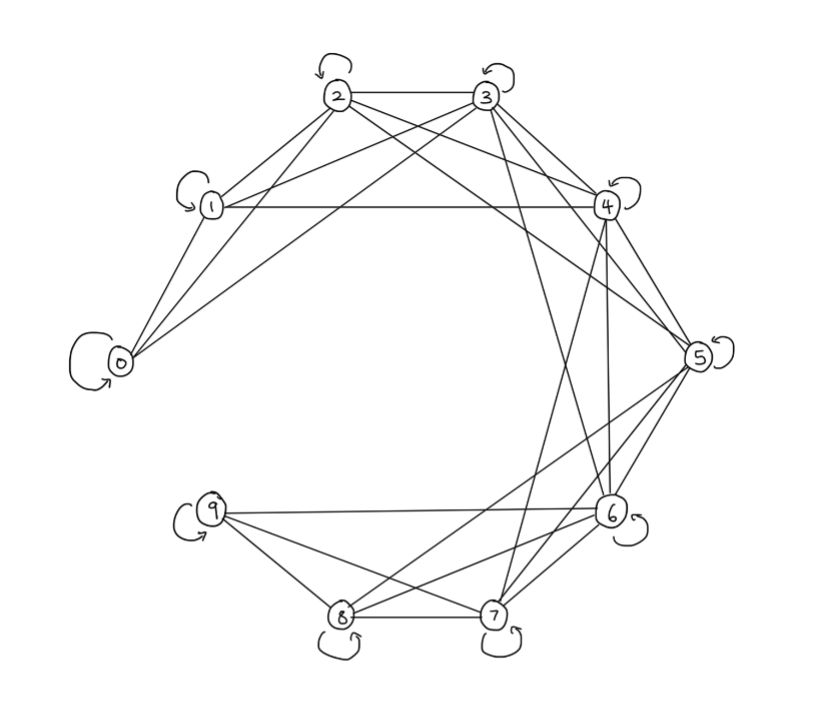

In [39]:
Image("https://i.imgur.com/nrSCdsQ.png")

The code cell below generalizes the above method into a for loop. We first tried to create a transition matrix for Great Jones St station because it has the least amount of capacity (N=19). We first find the minimum net flow and maximum net flow to know which rows need extra computation. Then an empty matrix is created of size $N+1 x N+1$ because the states $S = \{0, 1, ..., N\}$. Then we loop over the number of rows. The code is saying in the first `-min(netflow)` and last `N-max(netflow)` rows, we need to do extra computation to find $P_{i,j}$. We can fill in the matrix elements, for example, $P_{0,1}$ to $P_{0,j}$ using $P_{i,i+1}$ to $P_{i,i+max}$, but for matrix element $P_{0,0}$, we need to add $P_{i,i} + \sum_{k=0}^{min} P_{i,i+k} $. So for example, as seen below for the evening probabilities for Great Jones St, there is a minimum net flow of -7, and maximum net flow of 7 for one time step. So $P_{0,0} = P_{i,i} + P_{i,i-1} + ... + P_{i,i-7} = \sum_{k=0}^{-7} P_{i,i+k}$. Additionally, $P_{1,0} = P_{i,i-1} + P_{i,i-2} + ... + P_{i,i-7} = \sum_{k=-1}^{-7} P_{i,i+k}$ and so on for the first 7 rows (because there is a minimum net flow of 7). 

For the last 7 rows, to calculate $P_{N=19,N=19}$, we add $P_{i,i} + P_{i,i + 1} + ... + P_{i,i + 7} = \sum_{k=0}^{7} P_{i,i+k}$ because there is a maximum net flow of 7. Similarly, $P_{18,19} = P_{i,i+1} + P_{i,i + 2} + ... + P_{i,i + 7}= \sum_{k=1}^{7} P_{i,i+k}$  and so on for the last N - 7 rows.

In [40]:
greatjones_evening_probabilities

Net Flow  Probability
0         -7     0.000567
1         -6     0.001134
2         -5     0.006239
3         -4     0.008508
4         -3     0.032898
5         -2     0.060125
6         -1     0.180942
7          0     0.415201
8          1     0.183778
9          2     0.073171
10         3     0.023256
11         4     0.009643
12         5     0.002836
13         6     0.001134
14         7     0.000567

So the below code generalizes this and fills in the matrix elements accordingly. As seen below in the matrix output, $P_{0,0} = 0.706$ which is relatively large, this is because, as explained in more detail before, we assume that where there are 0 bikes at the station, we add all the probabilities $\sum_{k-1}^7 P_{i,i+k}$ to $P_{i,i}$ to find $P_{0,0}$. We feel like this is a naive assumption to make, but a sensible one given the dataset and the parameters we were given, since the data does not include the amount of bikes at the station when bikes enter or leave, so there is important contextual information that is neglected. As seen in the transition matrix below, it is irreducible because we can go from any state i to any other state j (does not need to be one step), and it is aperiodic because there is a self loop at every state so we can return to a given state in a period of 1 time step. This means that for this transition matrix for Great Jones St, there will be a unique stationary distribution because the transition matrix is irreducible and aperiodic. Given that we use this generalized method for creating the transition matrix for other stations as well, we can assume that the other transition matrices for other stations will also be irreducible and aperiodic, which can be seen later. The output is rounded to 1 decimal place for printing purposes.

In [41]:
min = greatjones_evening_probabilities['Net Flow'].min()
max = greatjones_evening_probabilities['Net Flow'].max()


greatjones_matrix = np.zeros((20,20)) #create blank 20x20 array for matrix

for i in range(20): #loop over number of rows
    #condition to determine first few rows 
    if i + min < 0:
        for k in range(-i, max+1):
            greatjones_matrix[i][i+k] = greatjones_evening_probabilities.loc[greatjones_evening_probabilities['Net Flow'] == k].Probability
        greatjones_matrix[i][0] = greatjones_evening_probabilities.loc[greatjones_evening_probabilities['Net Flow'] < -i].Probability.sum() + greatjones_evening_probabilities.loc[greatjones_evening_probabilities['Net Flow'] == -i].Probability
    #condition to determine last few rows where extra computation is needed
    elif i + max > 19:
        for l in range(min, 19-i):
            greatjones_matrix[i][i+l] = greatjones_evening_probabilities.loc[greatjones_evening_probabilities['Net Flow'] == l].Probability
        greatjones_matrix[i][19] = greatjones_evening_probabilities.loc[greatjones_evening_probabilities['Net Flow'] > 19-i].Probability.sum() + greatjones_evening_probabilities.loc[greatjones_evening_probabilities['Net Flow'] == 19-i].Probability
    #middle rows 
    else:
        for z in range(-min, 20-max):
            for j in range(min, max+1):
                greatjones_matrix[z][z+j] = greatjones_evening_probabilities.loc[greatjones_evening_probabilities['Net Flow'] == j].Probability

pd.DataFrame(greatjones_matrix.round(1))


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   0.7  0.2  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.3  0.4  0.2  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.1  0.2  0.4  0.2  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.0  0.1  0.2  0.4  0.2  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.1  0.2  0.4  0.2  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.1  0.2  0.4  0.2  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.1  0.2  0.4  0.2  0.1  0.0  0.0  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.1  0.2  0.4  0.2  0.1  0.0  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.2  0.4  0.2  0.1  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.2  0.4  0.2  0.1  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.2  0.4  0.2  0.1  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.2  0.4  0.2  0.1  0.0   
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.2  0.4  0.2  0.1   
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.2  0.4  0.2   
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.2  0.4   
15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.2   
16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1   
17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     15   16   17   18   19  
0   0.0  0.0  0.0  0.0  0.0  
1   0.0  0.0  0.0  0.0  0.0  
2   0.0  0.0  0.0  0.0  0.0  
3   0.0  0.0  0.0  0.0  0.0  
4   0.0  0.0  0.0  0.0  0.0  
5   0.0  0.0  0.0  0.0  0.0  
6   0.0  0.0  0.0  0.0  0.0  
7   0.0  0.0  0.0  0.0  0.0  
8   0.0  0.0  0.0  0.0  0.0  
9   0.0  0.0  0.0  0.0  0.0  
10  0.0  0.0  0.0  0.0  0.0  
11  0.0  0.0  0.0  0.0  0.0  
12  0.0  0.0  0.0  0.0  0.0  
13  0.1  0.0  0.0  0.0  0.0  
14  0.2  0.1  0.0  0.0  0.0  
15  0.4  0.2  0.1  0.0  0.0  
16  0.2  0.4  0.2  0.1  0.0  
17  0.1  0.2  0.4  0.2  0.1  
18  0.0  0.1  0.2  0.4  0.3  
19  0.0  0.0  0.1  0.2  0.7

If we sum up a random row, it should equal to 1 as that is a property of a transition matrix.

In [42]:
greatjones_matrix[2].sum()

1.0

We copied and pasted the code from above for the 9 Ave & W 22 St station. 

In [43]:
min = nineave_evening_probabilities['Net Flow'].min()
max = nineave_evening_probabilities['Net Flow'].max()

n=58
nineave_matrix = np.zeros((n+1,n+1))

for i in range(0, -min):
    for j in range(-i, max+1):
        nineave_matrix[i][i+j] = nineave_evening_probabilities.loc[nineave_evening_probabilities['Net Flow'] == j].Probability
    nineave_matrix[i][0] = nineave_evening_probabilities.loc[nineave_evening_probabilities['Net Flow'] < -i].Probability.sum() + nineave_evening_probabilities.loc[nineave_evening_probabilities['Net Flow'] == -i].Probability

for i in range(-min, n-max):
    for j in range(min, max+1):
        nineave_matrix[z][z+j] = nineave_evening_probabilities.loc[nineave_evening_probabilities['Net Flow'] == j].Probability

for i in range(n-max, n+1):
    for j in range(min, n+1-i):
        nineave_matrix[i][i+j] = nineave_evening_probabilities.loc[nineave_evening_probabilities['Net Flow'] == j].Probability
    nineave_matrix[i][n] = nineave_evening_probabilities.loc[nineave_evening_probabilities['Net Flow'] > n-i].Probability.sum() + nineave_evening_probabilities.loc[nineave_evening_probabilities['Net Flow'] == n-i].Probability

nineave_matrix.round(2)

array([[0.54, 0.2 , 0.13, ..., 0.  , 0.  , 0.  ],
       [0.3 , 0.23, 0.2 , ..., 0.  , 0.  , 0.  ],
       [0.15, 0.16, 0.23, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.23, 0.2 , 0.26],
       [0.  , 0.  , 0.  , ..., 0.16, 0.23, 0.46],
       [0.  , 0.  , 0.  , ..., 0.08, 0.16, 0.7 ]])

In this code cell, we defined a function to return the transition matrix for the 3 chosen stations during the morning or evening. We can input the station name and and the time and it will return the transition matrix. This code cell is basically just a generalized form of the two code cells above where I created a variable `n` based on the inputs and a variable `probability_array` to assign the different probability distribution based on the given station and time. 

In [44]:
def get_transition_matrix(time, station):
    if station == "9ave":
        n = 58
        if time == "morning":
            probability_array = nineave_morning_probabilities
        else:
            probability_array = nineave_evening_probabilities
    if station == "greatjones":
        n = 19
        if time == "morning":
            probability_array = greatjones_morning_probabilities
        else:
            probability_array = greatjones_evening_probabilities
    if station == "broadway":
        n = 67
        if time == "morning":
            probability_array = broadway_morning_probabilities
        else:
            probability_array = broadway_evening_probabilities
    
    trans_matrix = np.zeros((n+1, n+1))

    min = probability_array['Net Flow'].min()
    max = probability_array['Net Flow'].max()


    for i in range(n+1):
        if i + min < 0:
            for k in range(-i, max+1):
                trans_matrix[i][i+k] = probability_array.loc[probability_array['Net Flow'] == k].Probability
            trans_matrix[i][0] = probability_array.loc[probability_array['Net Flow'] < -i].Probability.sum() + probability_array.loc[probability_array['Net Flow'] == -i].Probability
        elif i + max > n:
            for l in range(min, n-i):
                trans_matrix[i][i+l] = probability_array.loc[probability_array['Net Flow'] == l].Probability
            trans_matrix[i][n] = probability_array.loc[probability_array['Net Flow'] > n-i].Probability.sum() + probability_array.loc[probability_array['Net Flow'] == n-i].Probability
        else:
            for z in range(-min, n-max+1):
                for j in range(min, max+1):
                    trans_matrix[z][z+j] = probability_array.loc[probability_array['Net Flow'] == j].Probability
    
    return trans_matrix.round(2)
    


We realized that the for loop used in this function was fast for Great Jones St, but slow for the other 2 station because of the higher capacity, so we defined another function that uses less nested loops to decrease the run time. It is basically the same function but roughly 5-10 times faster. (5s vs 0.5s for broadway and 9 ave)

In [45]:
def fast_transition_matrix(station, time):
    if station == "9ave":
        n = 58
        if time == "morning":
            probability_array = nineave_morning_probabilities
        else:
            probability_array = nineave_evening_probabilities
    if station == "greatjones":
        n = 19
        if time == "morning":
            probability_array = greatjones_morning_probabilities
        else:
            probability_array = greatjones_evening_probabilities
    if station == "broadway":
        n = 67
        if time == "morning":
            probability_array = broadway_morning_probabilities
        else:
            probability_array = broadway_evening_probabilities
    
    trans_matrix = np.zeros((n+1, n+1))

    min = probability_array['Net Flow'].min()
    max = probability_array['Net Flow'].max()

    for i in range(0, -min):
        for j in range(-i, max+1):
            trans_matrix[i][i+j] = probability_array.loc[probability_array['Net Flow'] == j].Probability
        trans_matrix[i][0] = probability_array.loc[probability_array['Net Flow'] < -i].Probability.sum() + probability_array.loc[probability_array['Net Flow'] == -i].Probability

    for i in range(-min, n-max):
        for j in range(min, max+1):
            trans_matrix[i][i+j] = probability_array.loc[probability_array['Net Flow'] == j].Probability

    for i in range(n-max, n+1):
        for j in range(min, n+1-i):
            trans_matrix[i][i+j] = probability_array.loc[probability_array['Net Flow'] == j].Probability
        trans_matrix[i][n] = probability_array.loc[probability_array['Net Flow'] > n-i].Probability.sum() + probability_array.loc[probability_array['Net Flow'] == n-i].Probability

    return trans_matrix



In [46]:
broadway_evening_matrix = fast_transition_matrix("broadway", "evening")

In [47]:
broadway_evening_matrix.round(3)

array([[0.676, 0.137, 0.093, ..., 0.   , 0.   , 0.   ],
       [0.477, 0.2  , 0.137, ..., 0.   , 0.   , 0.   ],
       [0.308, 0.169, 0.2  , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.2  , 0.137, 0.187],
       [0.   , 0.   , 0.   , ..., 0.169, 0.2  , 0.324],
       [0.   , 0.   , 0.   , ..., 0.121, 0.169, 0.523]])

## Get Stationary Distributions

Since we know that all of our transition matrices that we obtained for the morning and evening time periods for all three chosen stations are irreducible and aperiodic, we can find a unique stationary distribution for each station in the morning and evening.

From class, we know that the stationary distribution $\pi$ is calculated using the three equations:

$$\pi P =\pi$$
$$\sum \pi_i = 1$$
$$\pi_i \geq 0$$

But for Markov Chains with a large number of states $S = \{0,1,...,N\}$ it can be difficult and computationally heavy to calculate the stationary distribution using the system of equations $\pi_0 = \pi_0P_{0,0} + \pi_1P_{0,1} + ...$, so another method of calculating the stationary distribution is to use eigendecomposition of the matrix $P$.

The equation $\pi P = \pi$ implies that the vector $\pi$ is a left eigenvector of matrix $P$ with an eigenvalues that is equal to 1. Therefore, to find the stationary distribution, we first find the matrix $P$ for our given station at a given time. Then we find the eigenvectors and eigenvalues using `np.linalg.eig`, then we find the eigenvectors with eigenvalues that are close to 1 with `np.isclose`. This will return an array of size 1 x N, but we want an array of size N x 1. We then normalize using the requirement $\sum \pi_i = 1$ an then taking the real parts because `np.linalg.eig` returns complex eigenvalues and eigenvectors. $\pi$ will be a vector that is size $N +1$ because there are $N+1$ states given capacity $N$.

In [48]:
## CODE COPIED FROM: https://ninavergara2.medium.com/calculating-stationary-distribution-in-python-3001d789cd4b
##https://stackoverflow.com/questions/31791728/python-code-explanation-for-stationary-distribution-of-a-markov-chain
greatjones_evening_matrix = fast_transition_matrix("greatjones", "evening")
evals, evecs = np.linalg.eig(greatjones_evening_matrix.T)
evec1 = evecs[:,np.isclose(evals, 1)] # find eigenvectors with eigenvalues that are close to 1

#Since np.isclose will return an array, we've indexed with an array
#so we still have our 2nd axis.  Get rid of it, since it's only size 1.
evec1 = evec1[:,0]

stationary = evec1 / evec1.sum()

#eig finds complex eigenvalues and eigenvectors, so you'll want the real part.
stationary = stationary.real
stationary

array([0.08317189, 0.05158465, 0.05169975, 0.05083811, 0.05039059,
       0.04974536, 0.04917721, 0.04861231, 0.04801061, 0.04743211,
       0.04685811, 0.0462948 , 0.04574489, 0.04518098, 0.04468858,
       0.04387164, 0.04359287, 0.0422769 , 0.04266493, 0.0681637 ])

We can verify the stationary distribution using the equation $\pi P =\pi$. As seen in the output in the code cells above and below, they are the same, and all other requirements are met, which means that the unique stationary distribution is found.

In [49]:
np.matmul(stationary,greatjones_evening_matrix)

array([0.08317189, 0.05158465, 0.05169975, 0.05083811, 0.05039059,
       0.04974536, 0.04917721, 0.04861231, 0.04801061, 0.04743211,
       0.04685811, 0.0462948 , 0.04574489, 0.04518098, 0.04468858,
       0.04387164, 0.04359287, 0.0422769 , 0.04266493, 0.0681637 ])

The plot below shows the stationary distribution at Great Jones St station in the morning. It can be seen that there is a higher probability that it will be empty or full compared to the other states.

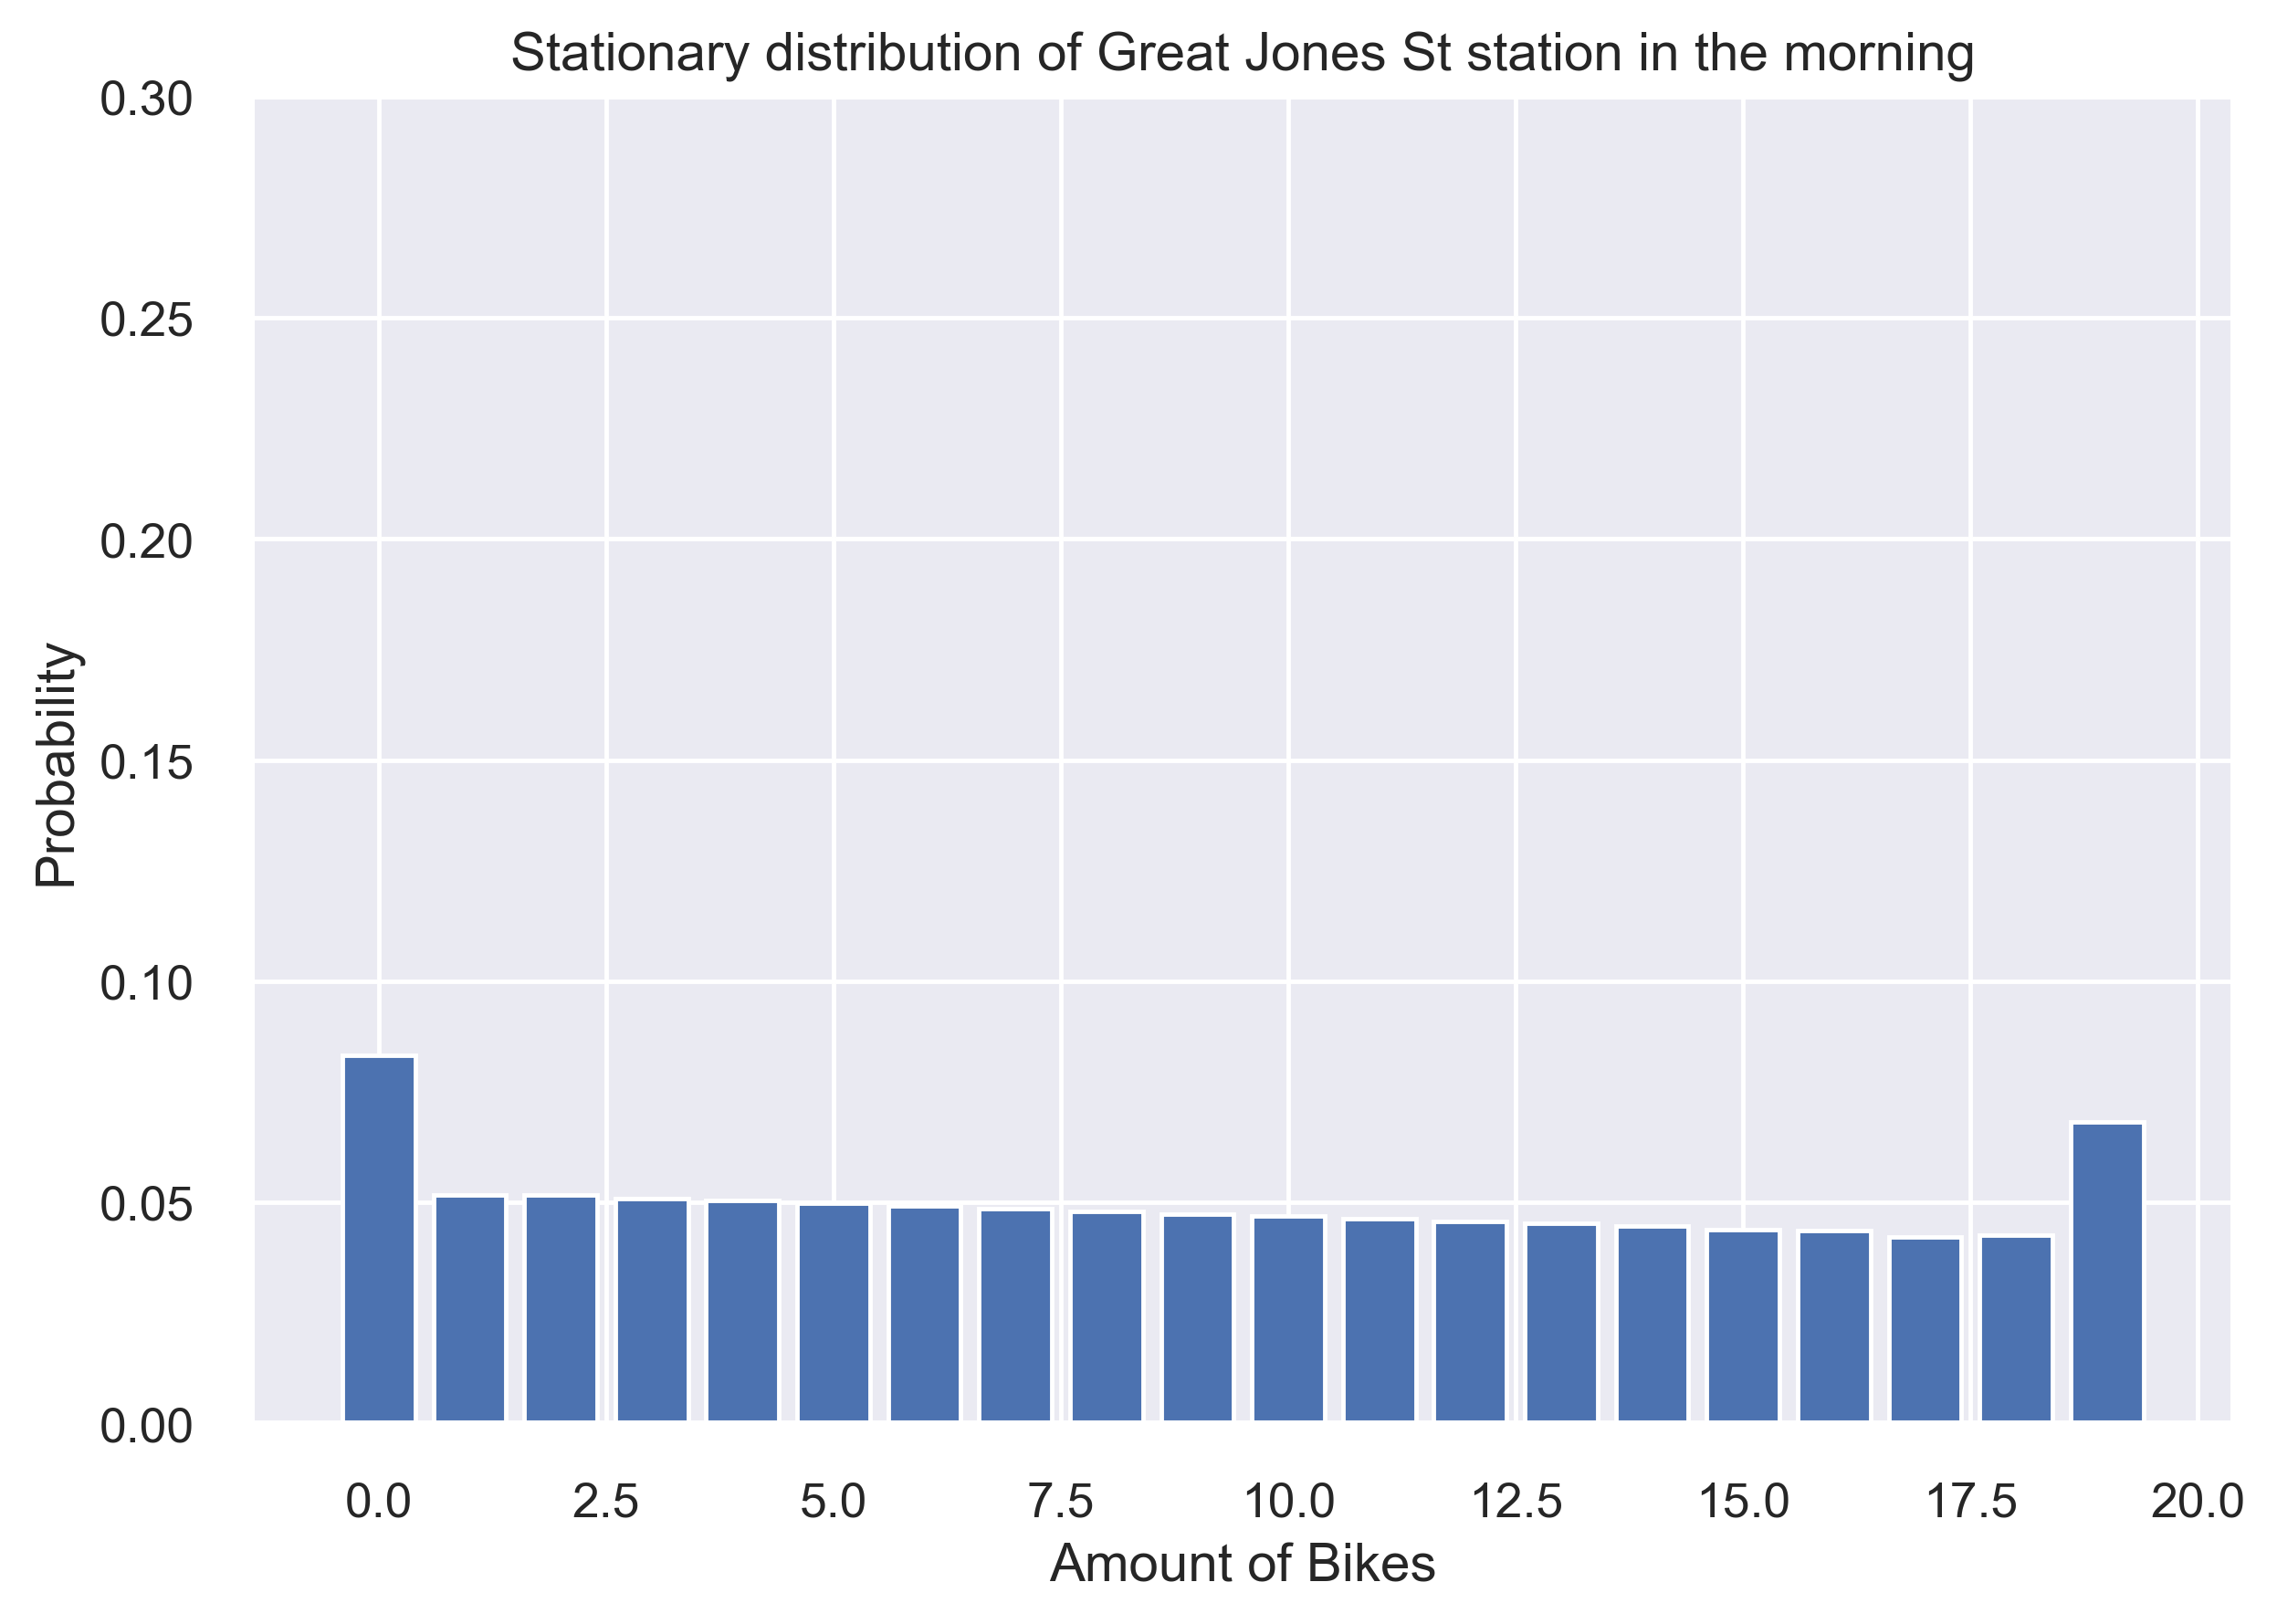

In [50]:
y = stationary
x = np.arange(0,20)

plt.title('Stationary distribution of Great Jones St station in the morning')
plt.ylabel('Probability')
plt.xlabel('Amount of Bikes')
plt.ylim(0,0.3)
plt.bar(x,y)
plt.show()


## Putting It Together

The function below generalizes the stationary distribution function above to get the stationary distribution for the desired station at any time.

In [51]:
def get_stationary_dist(station, time):
    ## CODE COPIED FROM: https://ninavergara2.medium.com/calculating-stationary-distribution-in-python-3001d789cd4b
    # ##https://stackoverflow.com/questions/31791728/python-code-explanation-for-stationary-distribution-of-a-markov-chain
    trans_matrix = fast_transition_matrix(station, time)
    evals, evecs = np.linalg.eig(trans_matrix.T)
    evec1 = evecs[:,np.isclose(evals, 1)] # find eigenvectors with eigenvalues that are close to 1

    #Since np.isclose will return an array, we've indexed with an array
    #so we still have our 2nd axis.  Get rid of it, since it's only size 1.
    evec1 = evec1[:,0]

    stationary = evec1 / evec1.sum()

    #eig finds complex eigenvalues and eigenvectors, so you'll want the real part.
    stationary = stationary.real
    return stationary


Create list of stations and times to calculate and plot stationary distribution

In [52]:
stations = ['9ave', 'greatjones', 'broadway']
times = ['morning', 'evening']

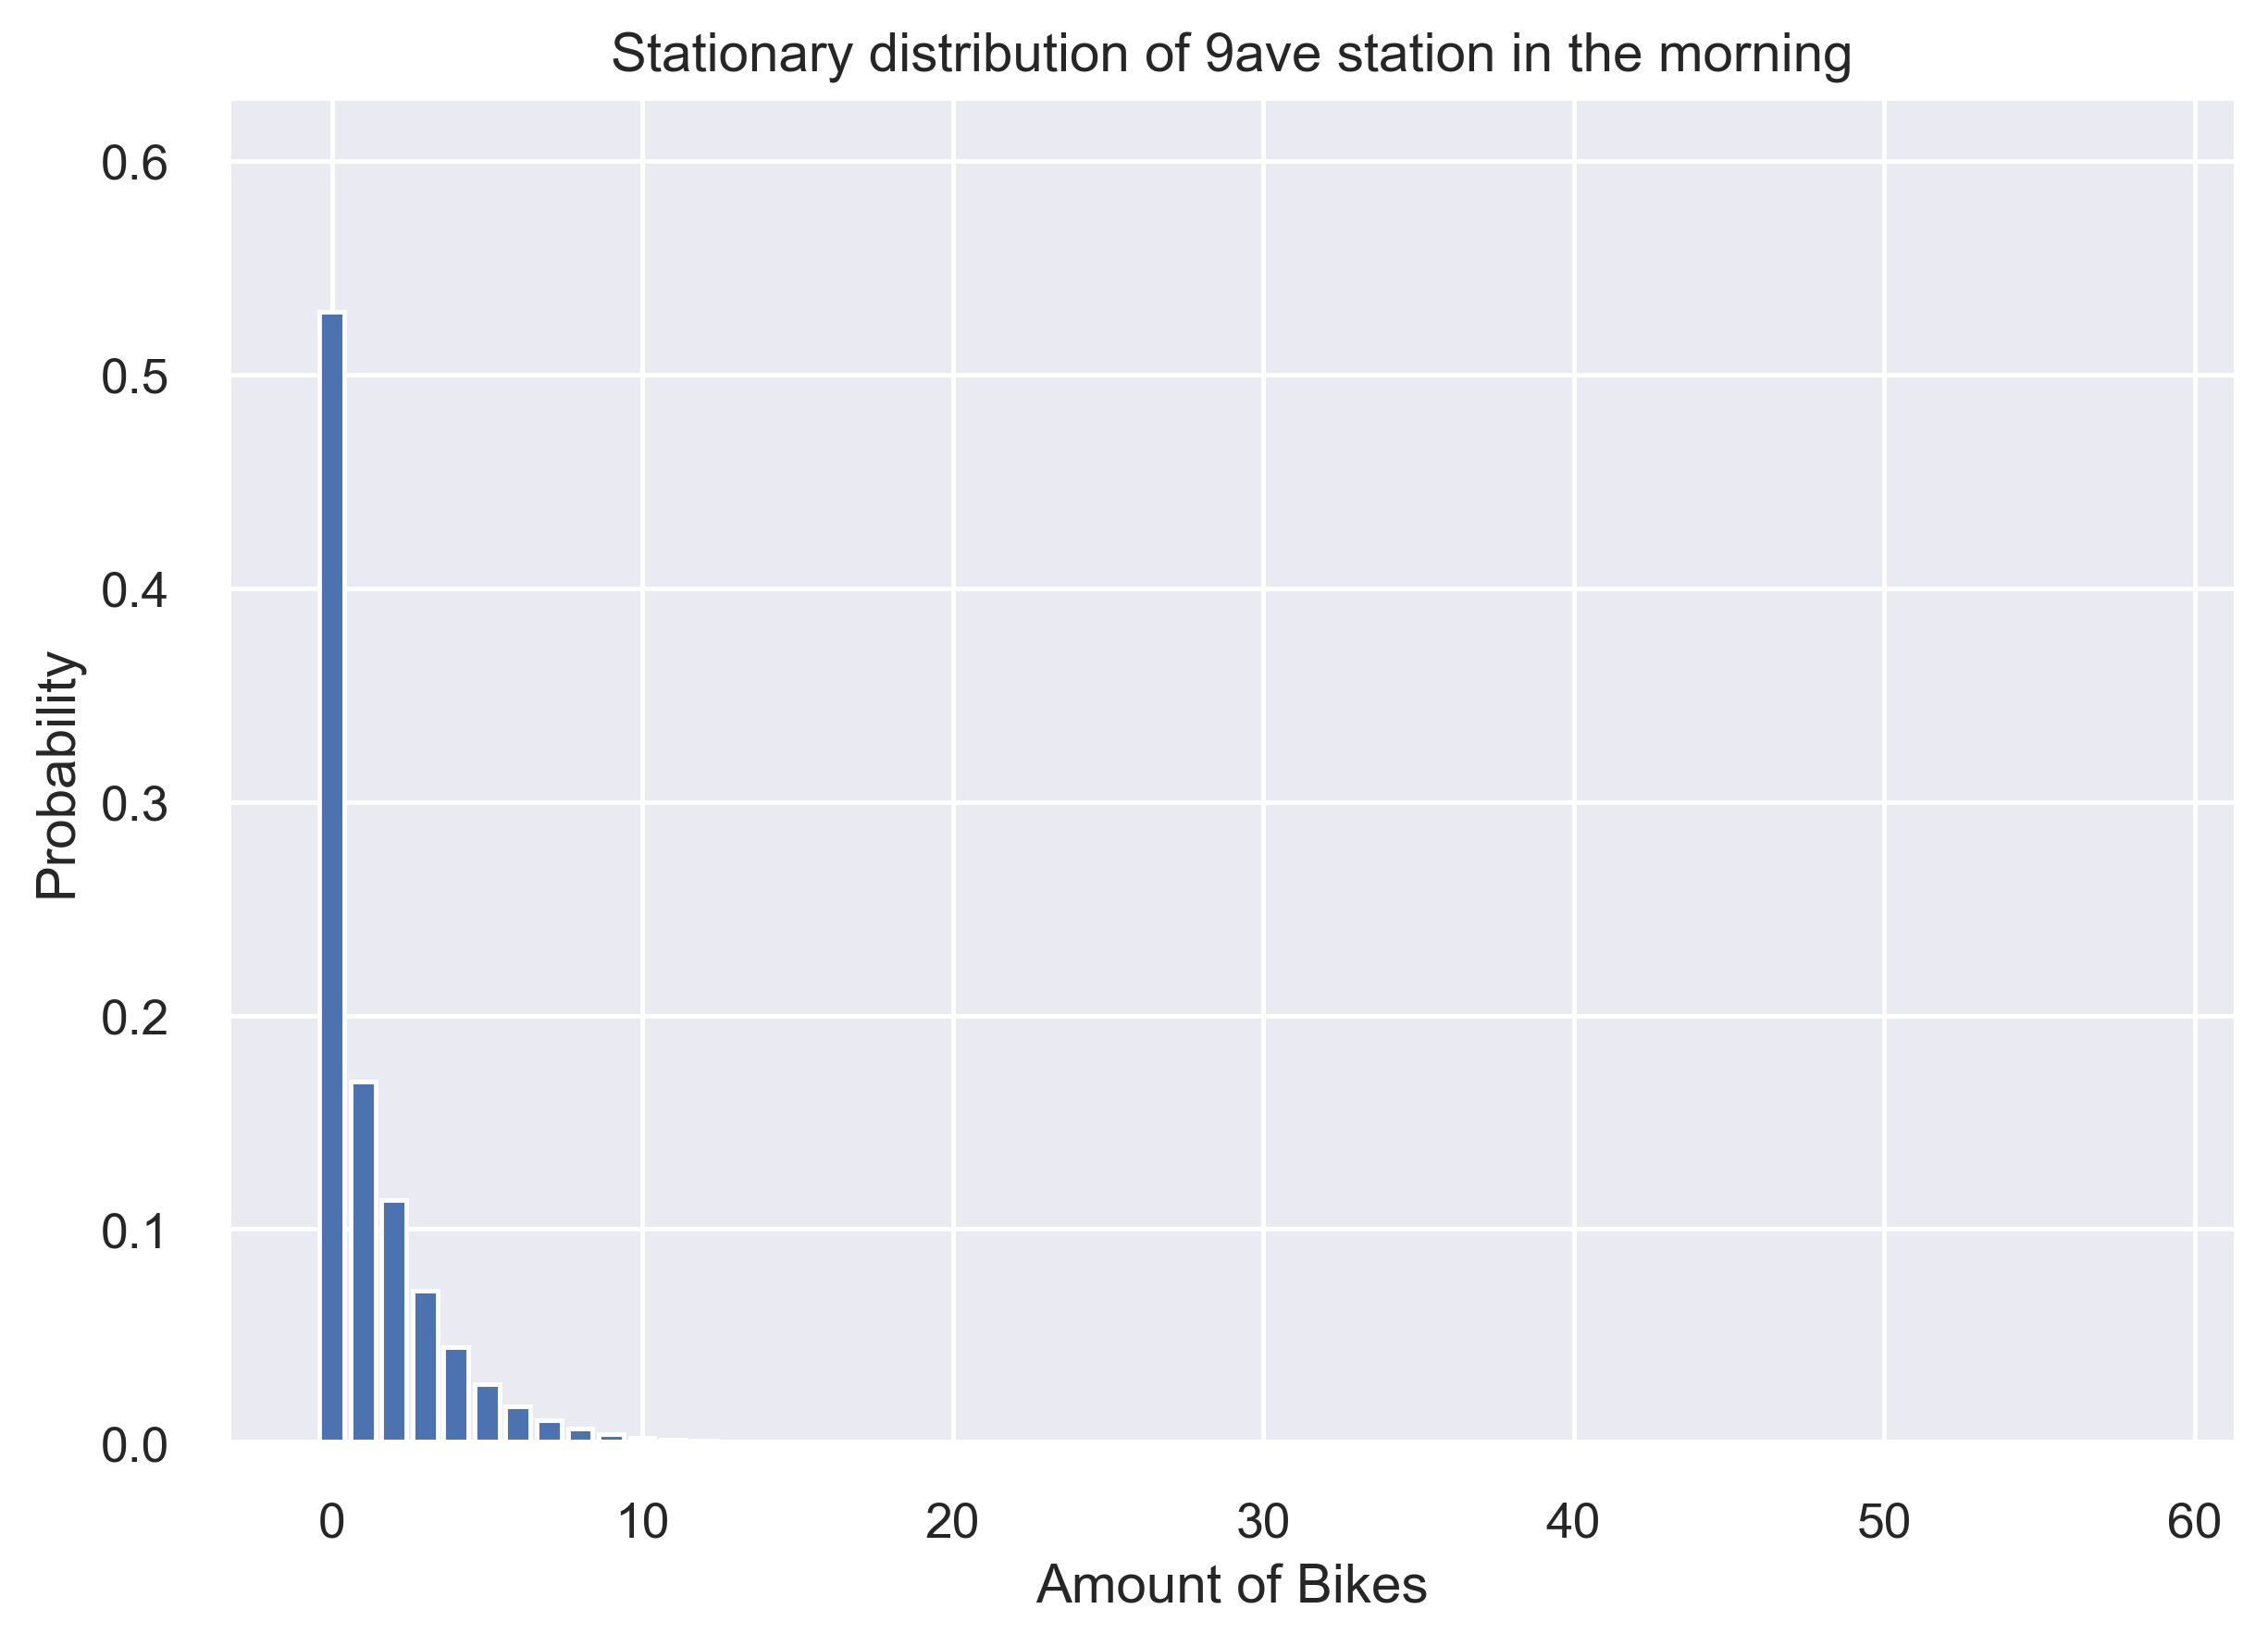

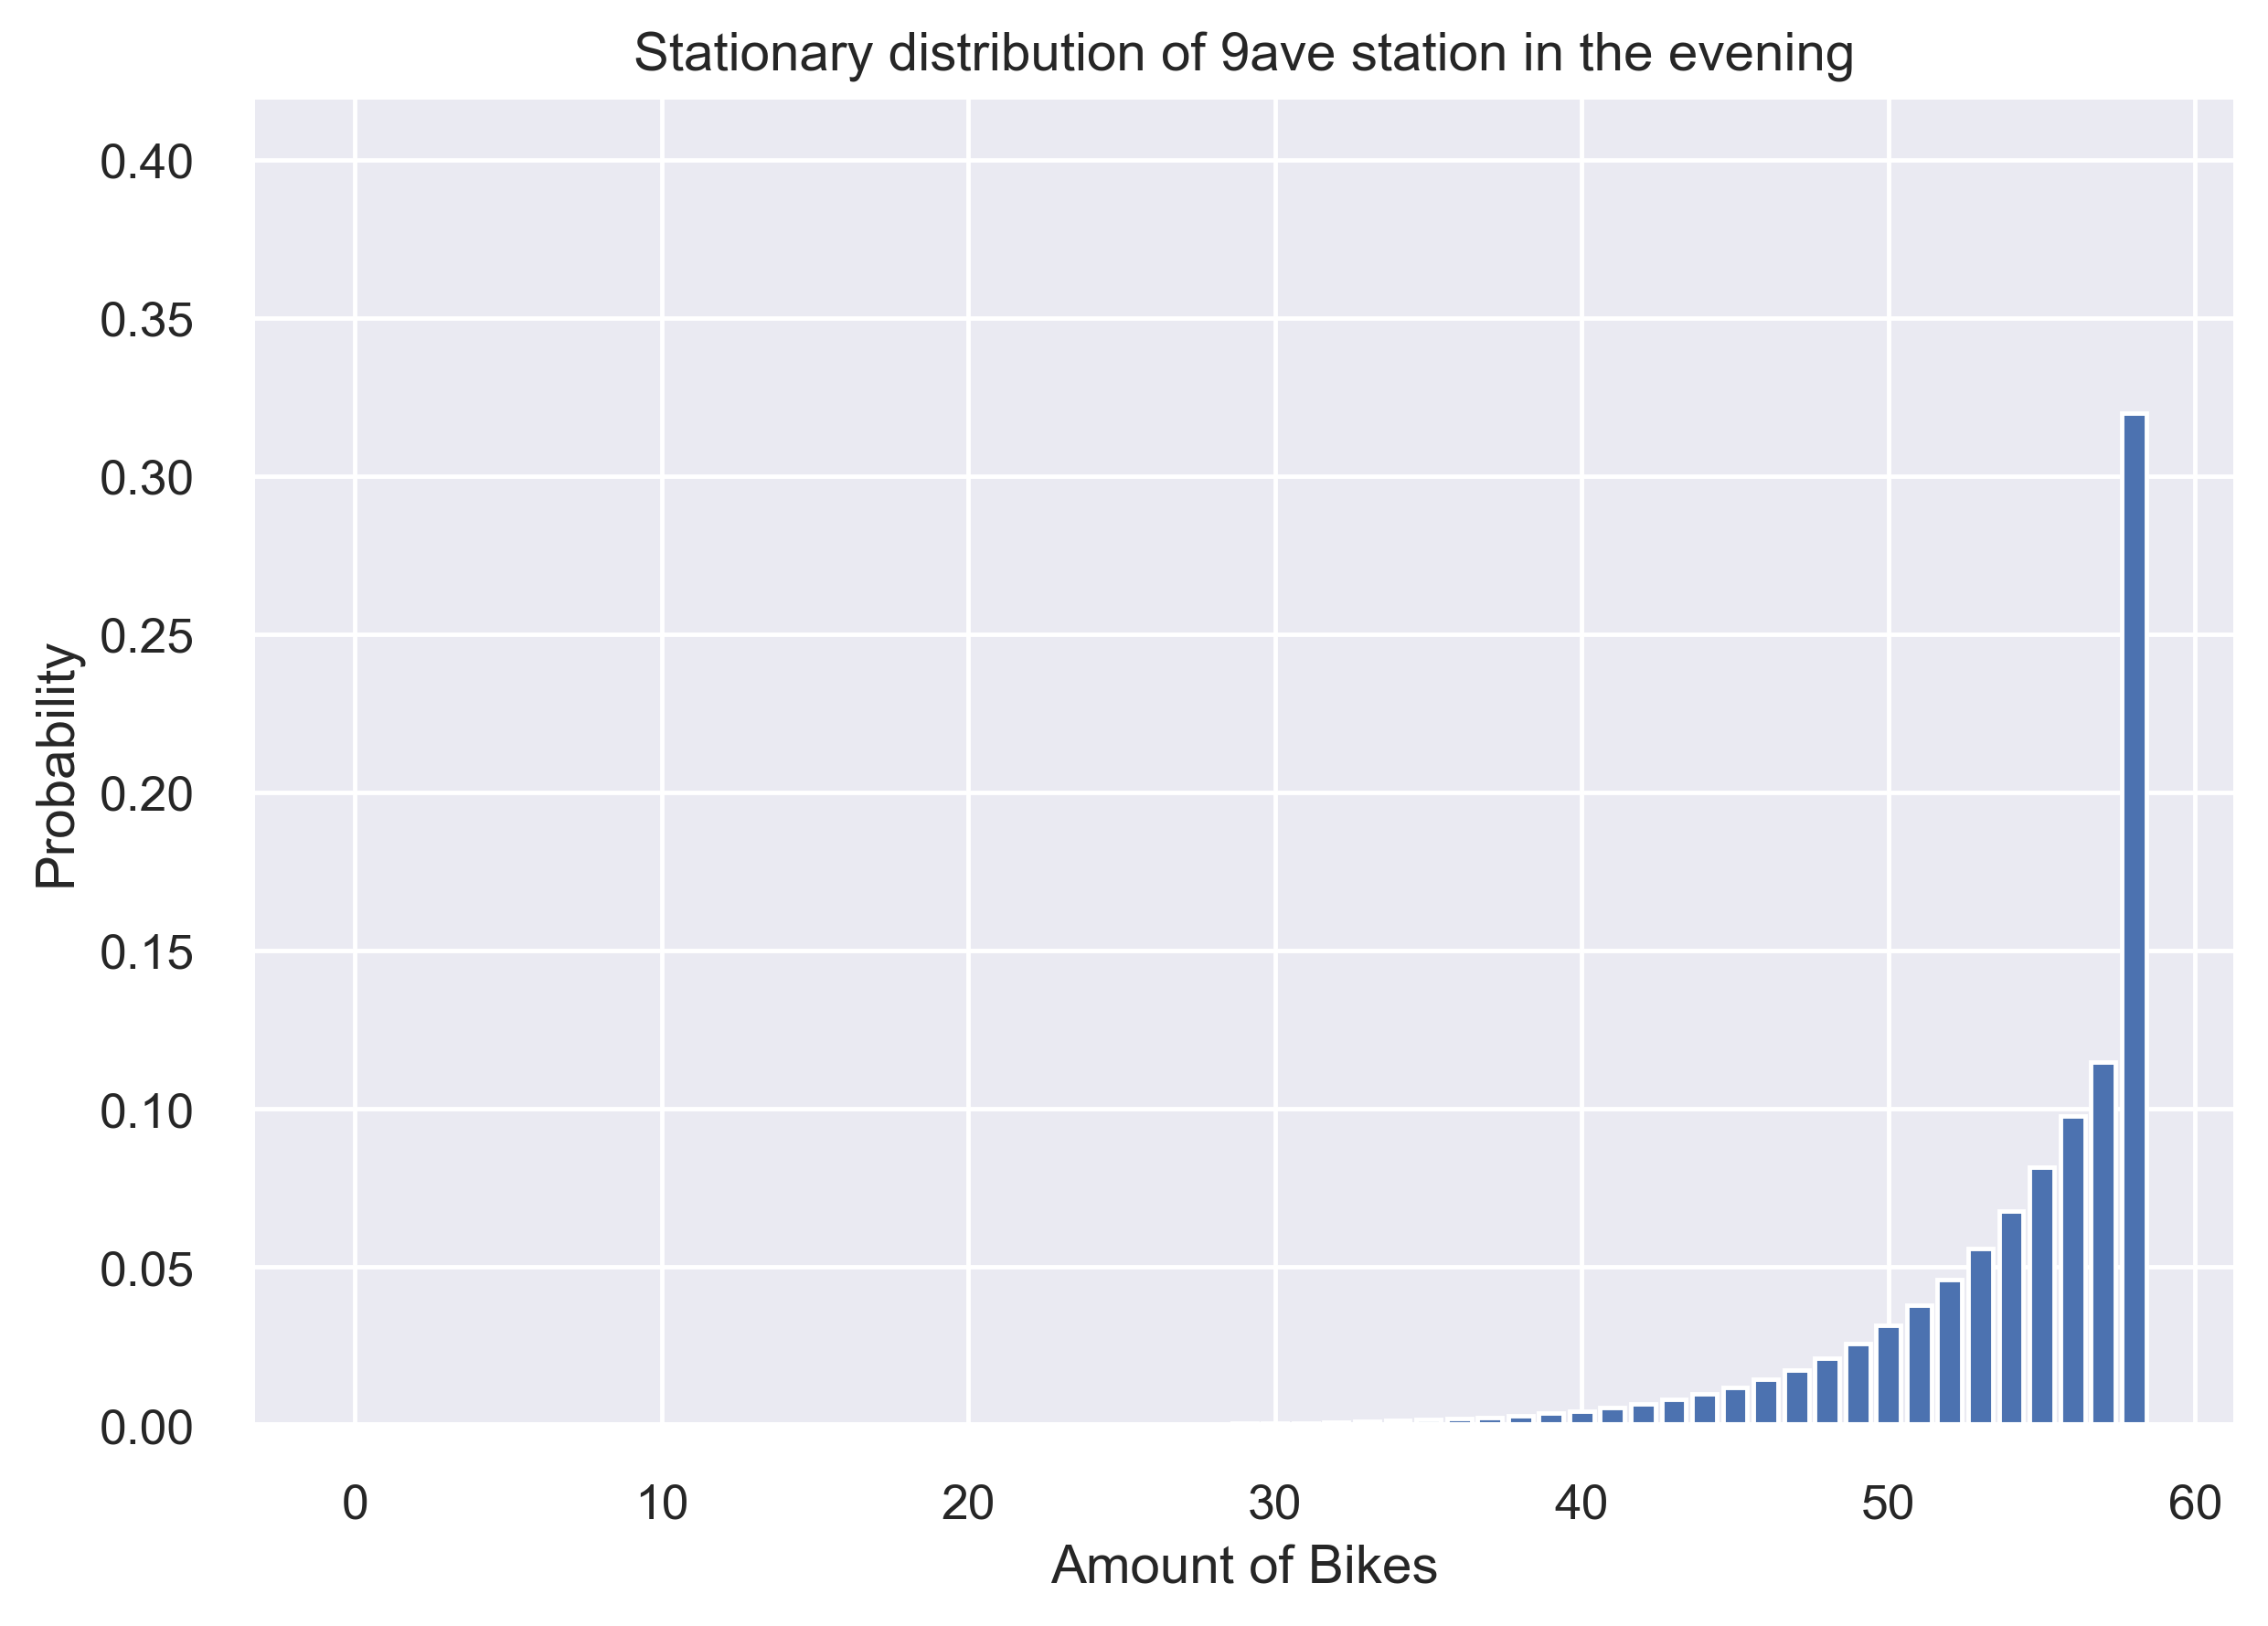

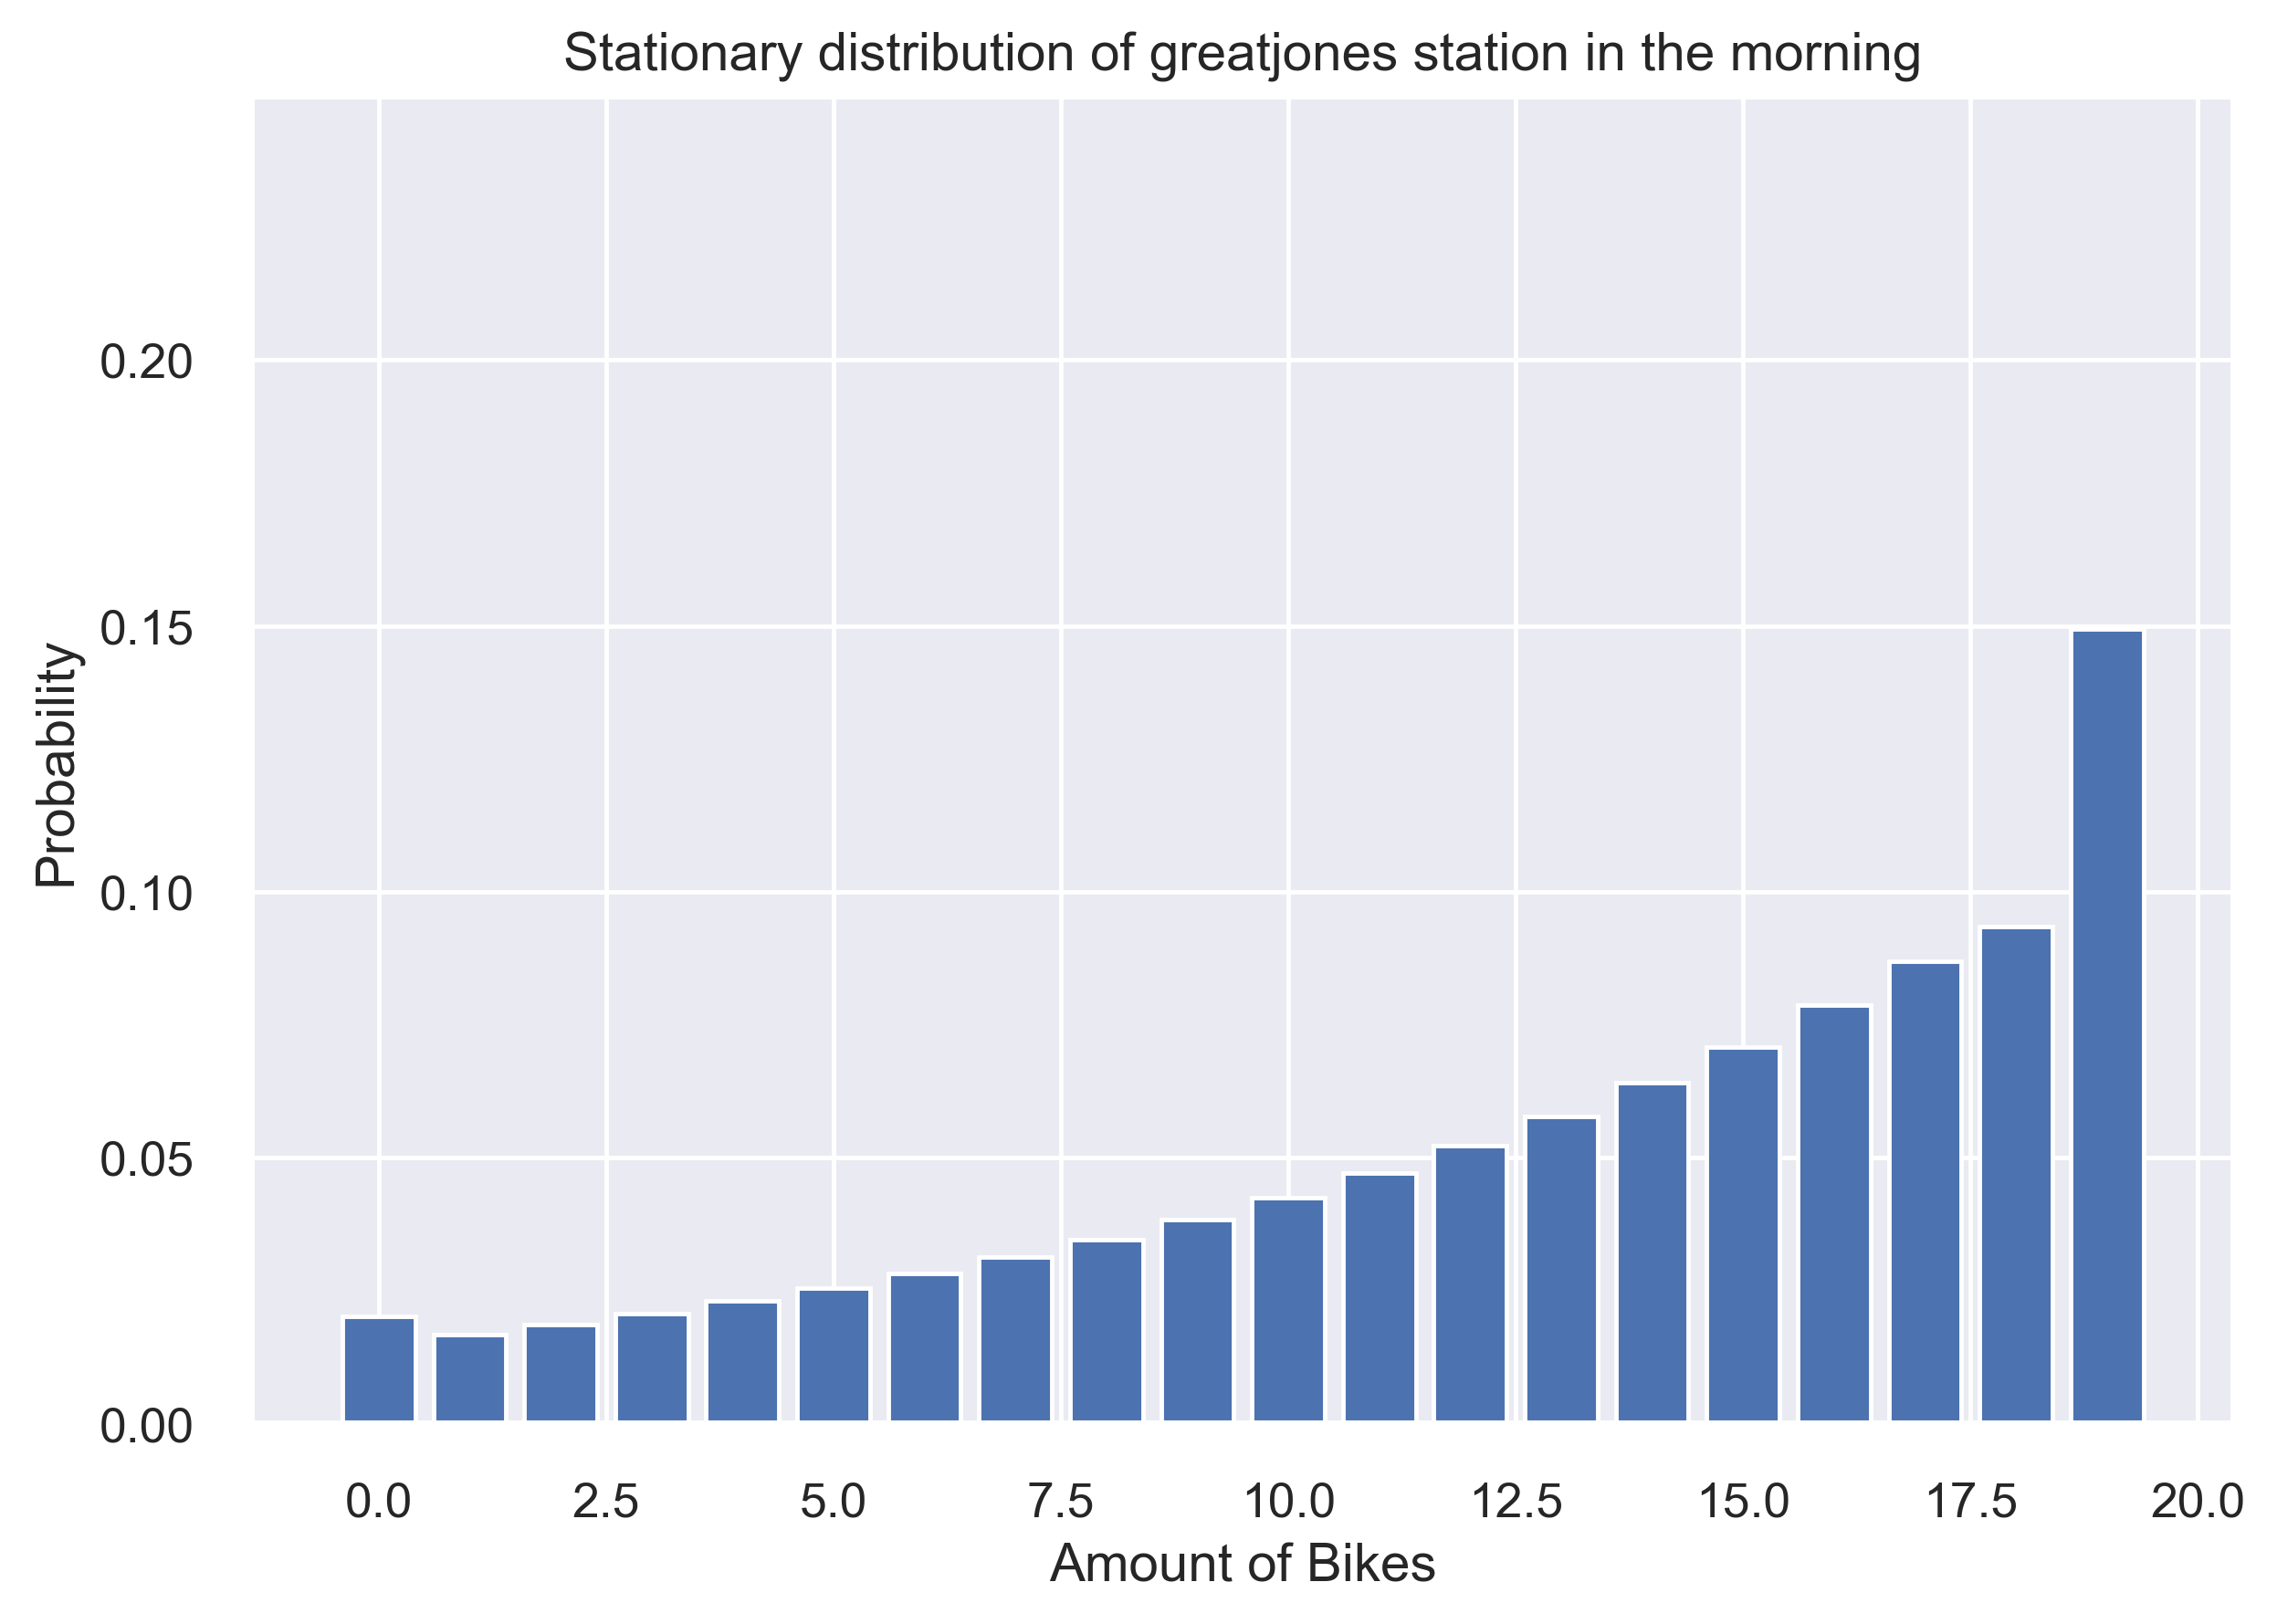

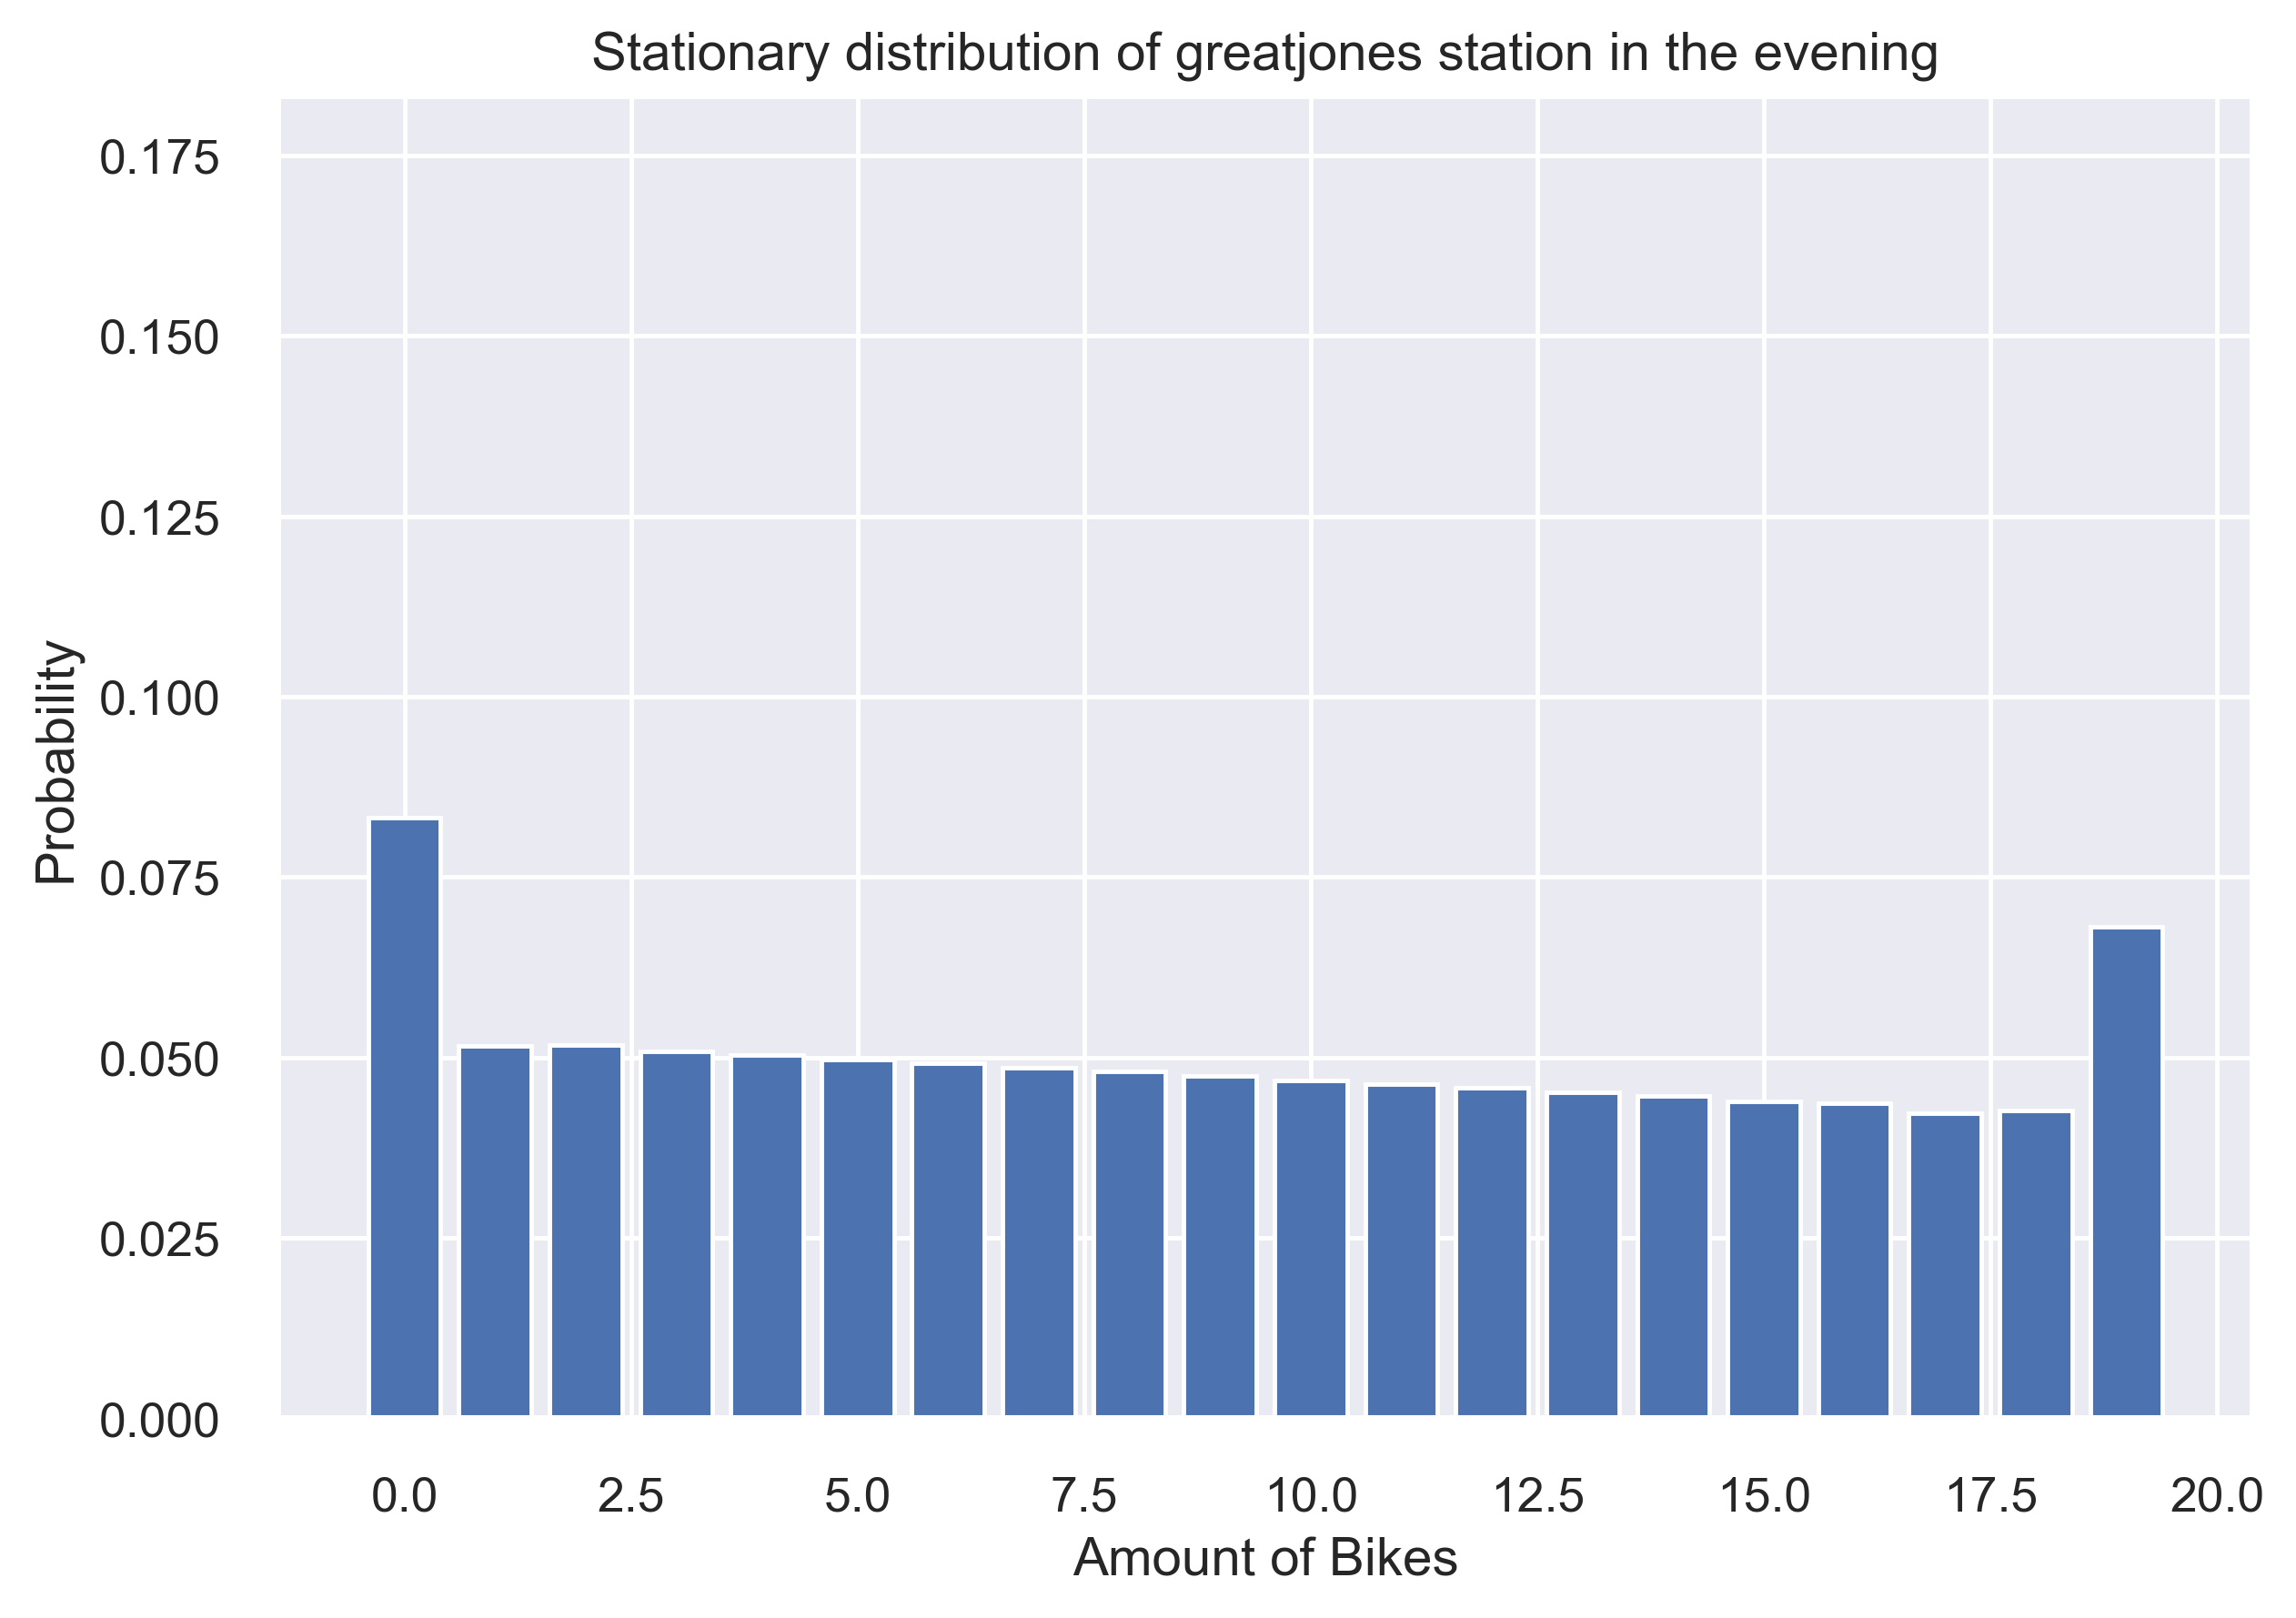

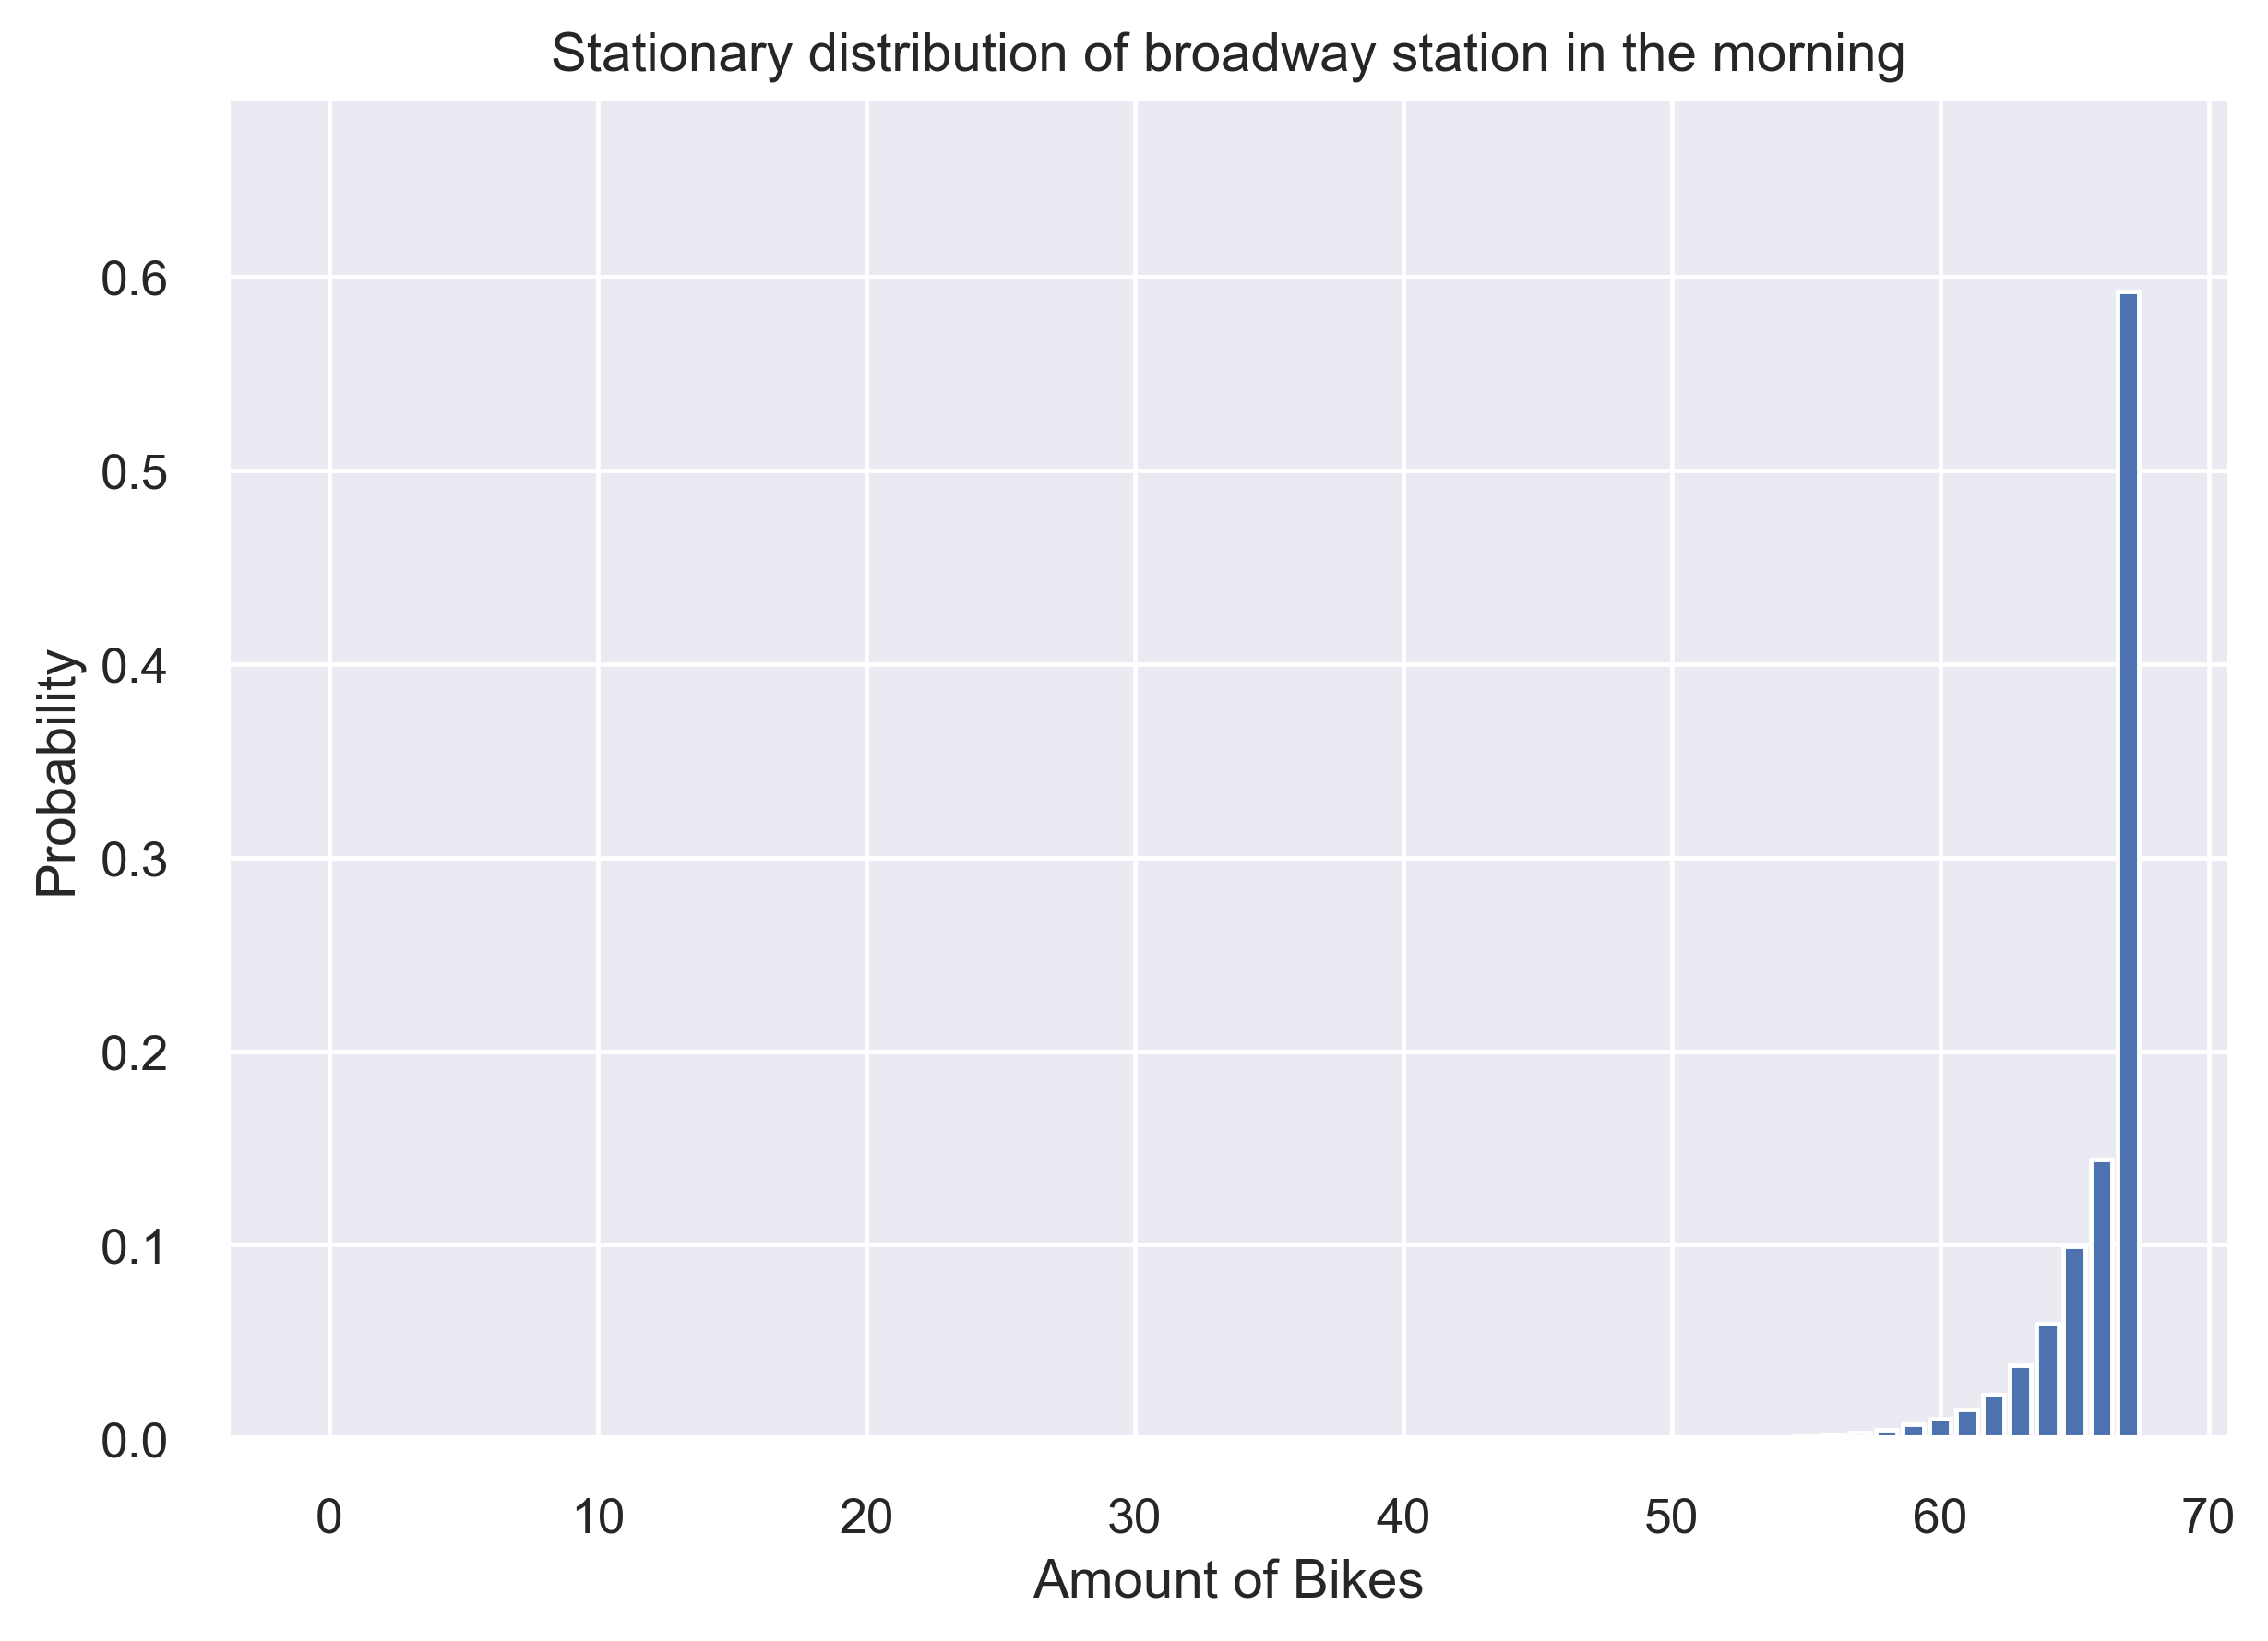

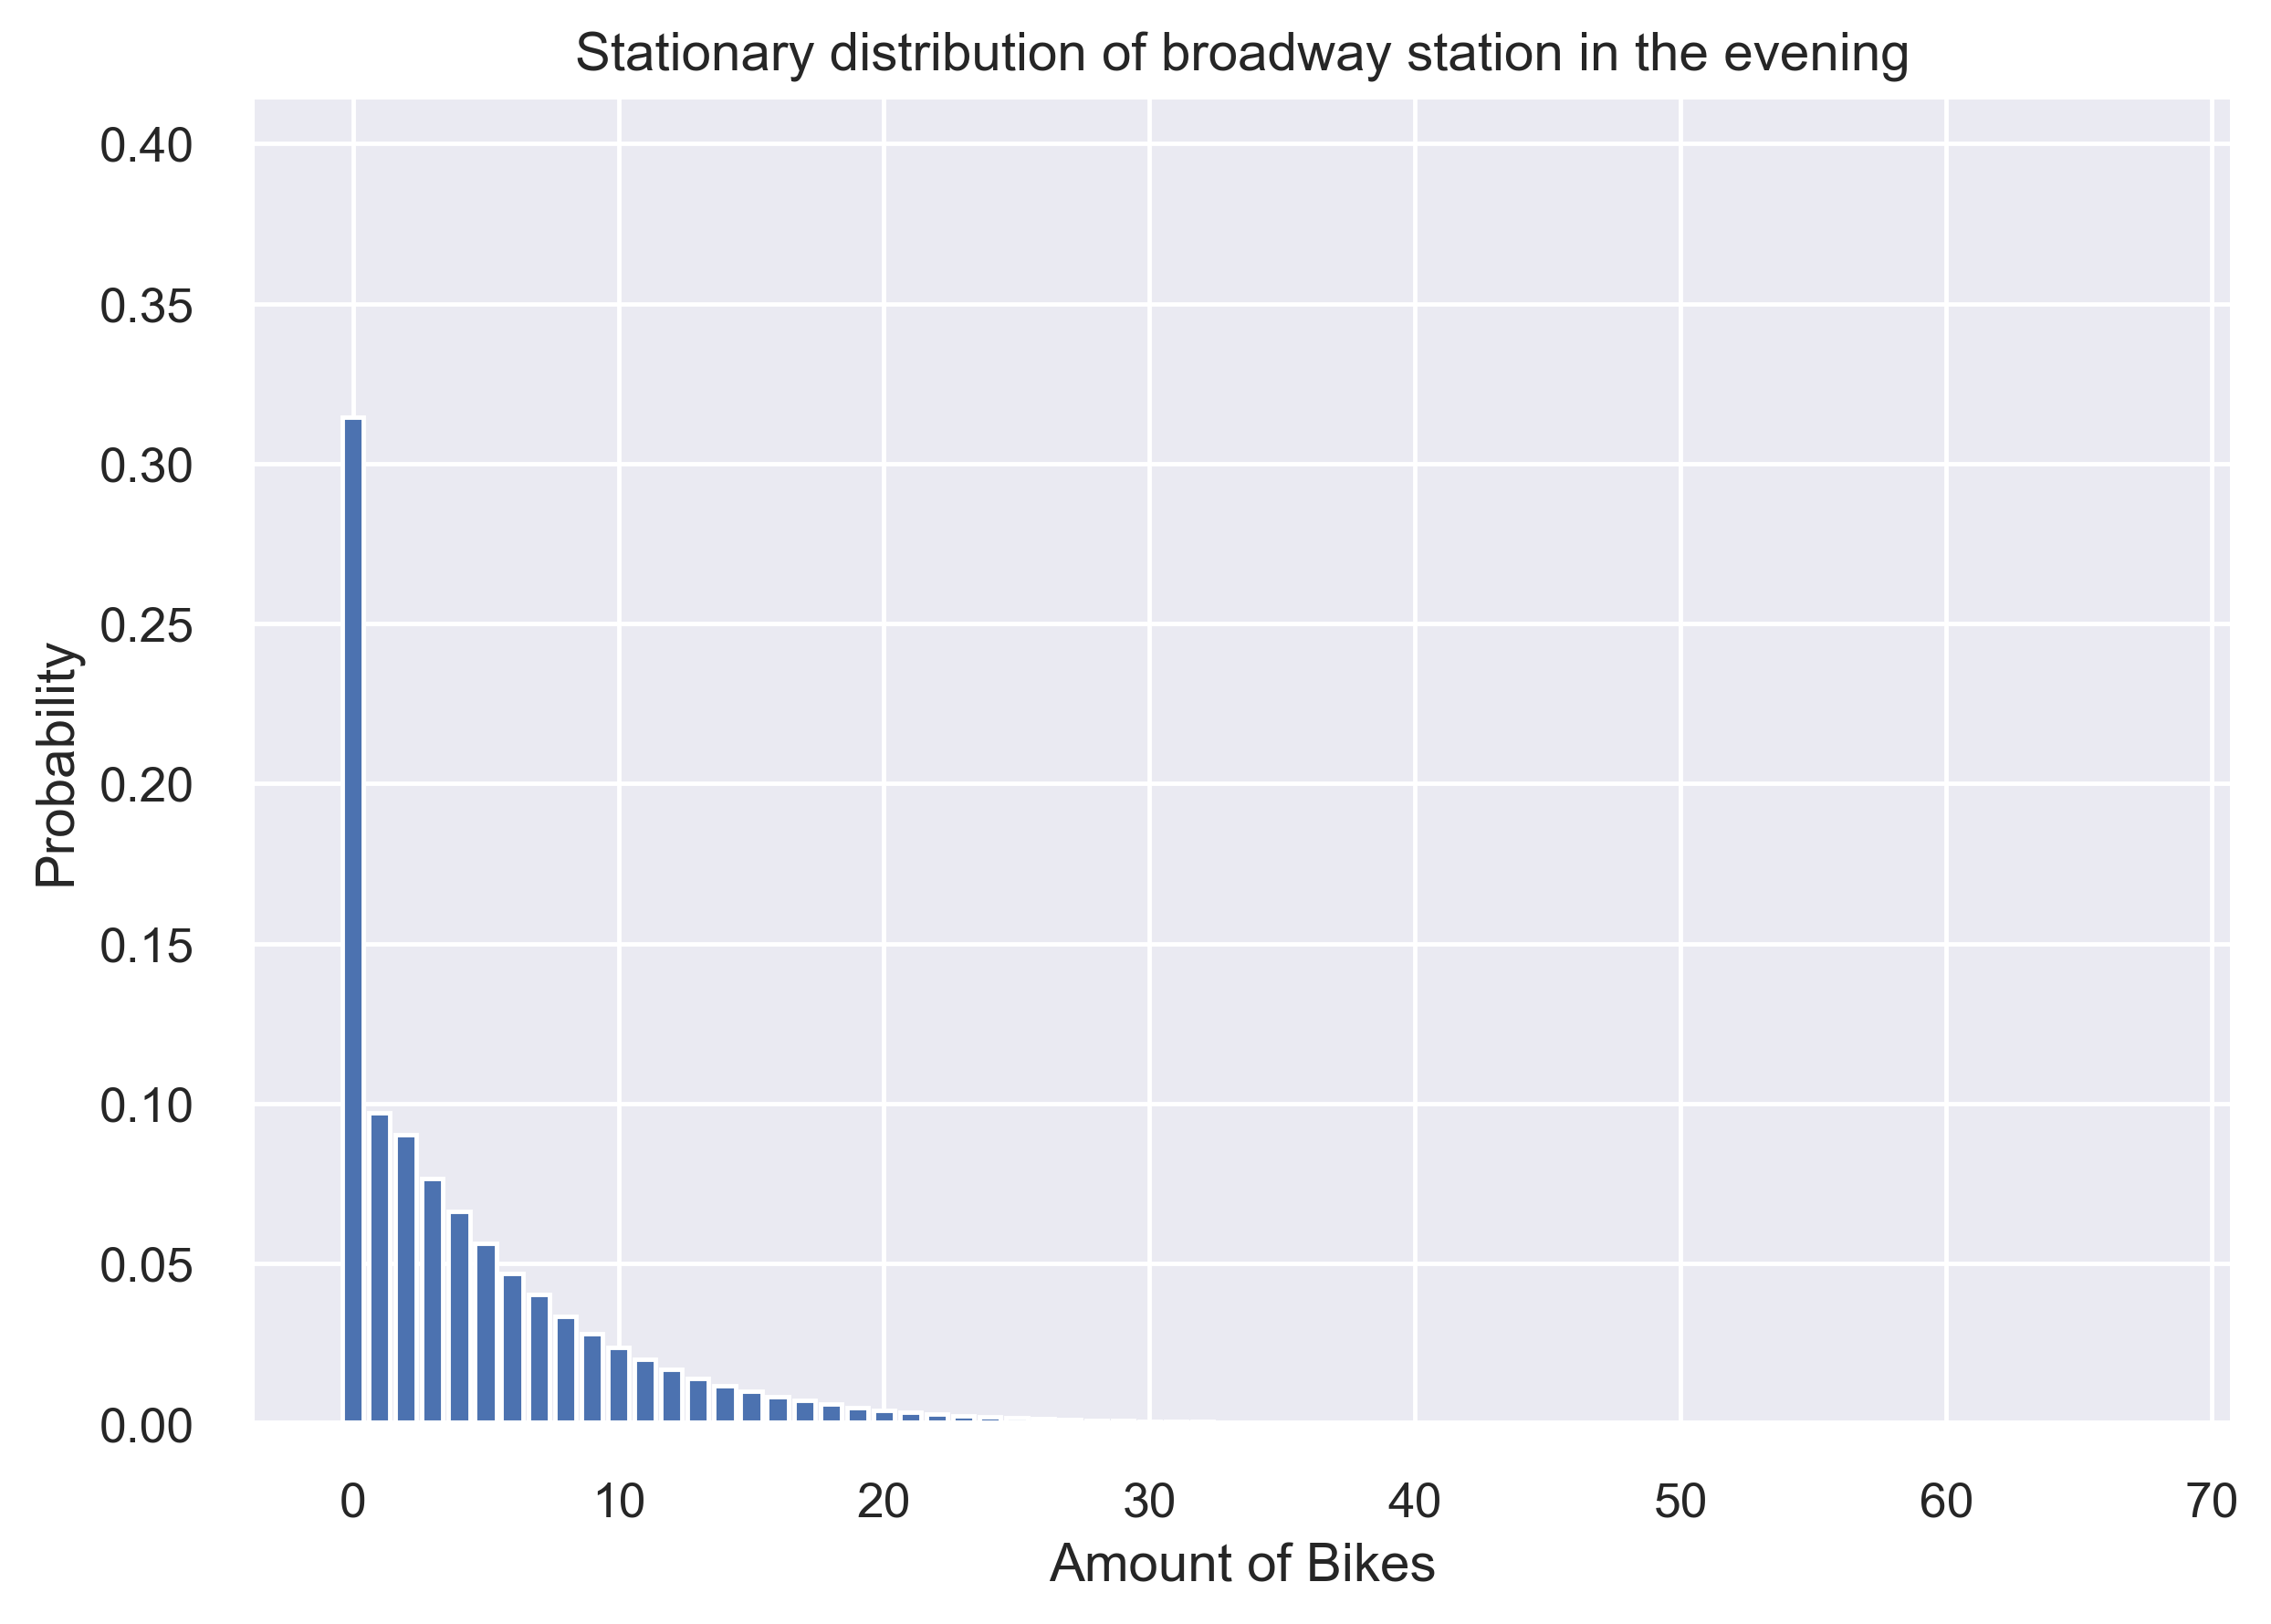

In [53]:
for station in stations:
    for time in times:
        stationary = get_stationary_dist(station, time)
        y = stationary
        x = np.arange(0, len(stationary))

        plt.title('Stationary distribution of '+ str(station) + ' station in the ' +str(time))
        plt.ylabel('Probability')
        plt.xlabel('Amount of Bikes')
        plt.ylim(0, stationary.max() + 0.1)
        plt.bar(x,y)
        plt.show()

## Final Optimization of Code

**This final iteration of code have modifications to the previous code to make it more mathematically accurate, so the results of this section represent our final stationary distributions for the three chosen stations.**


After doing the process sequentially to find the $P_{i,j}$ for every station, then creating a matrix, then finding the stationary distribution, I thought it would be sensible and feasible to optimize the code and generalize everything so that we can find the stationary distribution for any station in the morning or evening. This section aims to do that by simplifying the steps I did individually for the three chosen stations into functions for all stations.

This code cell below looks at the started at station and ended at station and determines whether there is a bike entering or exiting that station.

In [54]:
def bike_in(row, station):
    #if the end station name is equal to the station specified, then return 1
    if row['end_station_name'] == station:
        x = 1
    #else return 0
    else:
        x = 0
    return x

def bike_out(row, station):
    #if the start station name is equal to the station specified, then return -1
    if row['start_station_name'] == station:
        x = -1
    #else return 0
    else:
        x = 0
    return x

The code cell below finds $P_{i,j}$ for a given station in the morning or in the evening. The time block for start time and end times for mornings/evenings can be changed in the function. 

The function uses the initial dataset dataframe that has only been preprocessed to include ride durations that are less than or equal to 3 hours. From this dataframe, we sort by the given station to keep only the data that has start station name or end station name as the station we are interested in.

The function is a generalized function for the method we used to obtain the probability distribution for the individual stations, but we figured out how to generalize it for any station by creating the `bike_in` and `bike_out` function to apply to the dataset.

What we also did was that we realized that it was redundant to sort the dataframe initially by morning and evening because the `pd.Grouper` function that resamples the time into discrete intervals creates continuous intervals anyway, so it would be more optimal to filter by weekday and morning/evening after this function was applied. 

The index is reindexed again for the whole of July in 5 minute intervals because for some stations when we concatenate the in and out data, the data sometimes starts at around 7:30 instead of 7:00 for the morning time period of 7:00 - 12:00 because the first enter or exit of the bike starts at 7:30, so when we counted the net flows and divided by the sum, it would be slightly inaccurate as it is not taking into account the data points from 7:00 - 7:30 (first 6 time steps). So we resampled the index and filled with 0 to include data for 7:00 to 7:30 to make the probability distribution more accurate.

We also resampled the probability distribution dataframe that is calculated because sometimes the net flow values would not be continuous and that caused an error when computing the transition matrix using the transition matrix function. For example, a station could have a max net flow of 11 bikes going out in one timestep which happens very rarely, but no occurences for net flow of 10 or 9 bikes in one timestep, with the next highest being 8 net flow. This caused a computation error in the code, so we resampled the net flow to include that there is a probability of 0 for net flow of 9 and 10.

In [55]:
def get_probability(station, time, data_df = df_new):
    if time == "morning":
        start_time = 7
        end_time = 12
    if time == "evening":
        start_time = 14
        end_time = 21
    
    #keep rows where start station or end station = station we are interested in
    df_station1 = data_df.loc[(data_df.start_station_name == station)|(data_df.end_station_name == station)]
    
    #create new column for if a bike entered or if a bike exited 
    df_station1['In'] = df_station1.apply(bike_in, station = station, axis=1)
    df_station1['Out'] = df_station1.apply(bike_out, station = station, axis=1)
    
    #create new dataframe for bikes in and discretize the time blocks using groupby(pd.Grouper()). 
    #This function groups the time intervals by 5 minutes and sums up the 'In' column to find the total amount of bikes coming in during this timestep
    df_in = df_station1.groupby(pd.Grouper(key="started_at", freq='5T'))['In'].sum().to_frame()
    #do the same for bikes going out
    df_out = df_station1.groupby(pd.Grouper(key="ended_at", freq='5T'))['Out'].sum().to_frame()

    #we are interested in July 2022
    date_range =  pd.DatetimeIndex(pd.date_range(start='2022-07-01', end='2022-08-01 00:00:00', freq='5T'))

    #concatenate the two dataframes of bikes entering and exiting using the datetime index to match the time accordingly
    #reindex and fill with 0 for missing ranges (if we don't do this it can start at 7:30 for 7:00 - 12:00 as that is the earlist we have data)
    merge = pd.concat([df_in, df_out], axis=1).reindex(date_range).fillna(0) 
    #merge and reset index, the index can now be seen as the time steps 
    merge_df = merge.reset_index().rename({'index': 'Time'}, axis=1)

    #filter by weekday and morning/evening
    merge_df = merge_df[merge_df.Time.dt.dayofweek < 5]
    merge_df = merge_df[(merge_df.Time.dt.hour >= start_time) & (merge_df.Time.dt.hour < end_time)]
    
    #calculte net flow by adding the in and out (out is negative so in + out = net)
    merge_df['Net Flow'] = merge_df['In'] + merge_df['Out']
    #converted to float so convert it back to integer
    merge_df['Net Flow'] = merge_df['Net Flow'].apply(int)
    merge_df = merge_df.reset_index().drop(columns = 'index')
    
    
    #find probability P_i,j 
    #take the count of net flows, then divide by the sum of count of all net flows. e.g netflow = 0 happens 500 times, total count of netflows = 2500 times. P_i,i = 500/2500
    probability_df  = (merge_df.groupby(['Net Flow'])['Net Flow'].count()/merge_df.groupby(['Net Flow'])['Net Flow'].count().sum()).to_frame().rename({'Net Flow': 'Probability'}, axis=1)
    
    #find minimum and maximum net flow
    min = probability_df.index.min()
    max = probability_df.index.max()

    
    #reindex and fill with 0. e.g sometimes there is a netflow of 11 but no net flow of 10 or 9, we want to df to show 8 = something, 9 = 0, 10 = 0, 11 = something or the matrix function wont work
    probability_df = probability_df.reindex(range(min,max+1)).fillna(0).reset_index()

    return probability_df, merge_df

The function below is basically the same as `fast_transition_matrix` above but we included another argument `n` = capacity to generalize it for all stations. For the three chosen stations, we can input the exact full name in the station argument and "morning" or "evening" into the time argument and it will automatically assign the correct value of n for that respective station. For any other station, we will need to input the exact full name into the station argument, the time, and the capacity `n` into the function to correctly compute the transition matrix

In [56]:
def get_transition_matrix(station, time, n = ""):
    probability_array, _ = get_probability(station, time, df_new)
    
    if station == "9 Ave & W 22 St":
        n = 58
    if station == "Great Jones St":
        n = 19
    if station == "Broadway & W 25 St":
        n = 67
    else:
        n = n

    trans_matrix = np.zeros((n+1, n+1))

    min = probability_array['Net Flow'].min()
    max = probability_array['Net Flow'].max()

    for i in range(0, -min):
        for j in range(-i, max+1):
            trans_matrix[i][i+j] = probability_array.loc[probability_array['Net Flow'] == j].Probability
        trans_matrix[i][0] = probability_array.loc[probability_array['Net Flow'] < -i].Probability.sum() + probability_array.loc[probability_array['Net Flow'] == -i].Probability

    for i in range(-min, n-max):
        for j in range(min, max+1):
            trans_matrix[i][i+j] = probability_array.loc[probability_array['Net Flow'] == j].Probability

    for i in range(n-max, n+1):
        for j in range(min, n+1-i):
            trans_matrix[i][i+j] = probability_array.loc[probability_array['Net Flow'] == j].Probability
        trans_matrix[i][n] = probability_array.loc[probability_array['Net Flow'] > n-i].Probability.sum() + probability_array.loc[probability_array['Net Flow'] == n-i].Probability

    return trans_matrix

This function is the same as `get_stationary_dist` but it also includes another argument `n` in the function to generalize it for all stations. It calculates the stationary distribution based on eigendecomposition by finding the eigenvector with eigenvalues that are close to 1. 

In [57]:
def get_stationary_distribution(station, time, n = ""):
    trans_matrix = get_transition_matrix(station, time, n)
    evals, evecs = np.linalg.eig(trans_matrix.T)
    evec1 = evecs[:,np.isclose(evals, 1)] # find eigenvectors with eigenvalues that are close to 1

    #Since np.isclose will return an array, we've indexed with an array
    #so we still have our 2nd axis.  Get rid of it, since it's only size 1.
    evec1 = evec1[:,0]

    stationary = evec1 / evec1.sum()

    #eig finds complex eigenvalues and eigenvectors, so you'll want the real part.
    stationary = stationary.real
    return stationary


This function below combines all of the other functions together into one function. We can input the exact full name of the station, the time, and the capacity into the function and it will return the flow dataframe, probability distribution, transition matrix, and stationary distribution. The flow dataframe is the dataframe that shows the bikes in and out and net flow in the mornings/evenings of July 2022 at that specific station. 

In [58]:
def get_all(station, time, n = ""):
    probability, flow = get_probability(station, time, data_df = df_new)
    transition_matrix = get_transition_matrix(station, time, n)
    stationary_distribution = get_stationary_distribution(station, time, n)

    return flow, probability, transition_matrix, stationary_distribution


In [59]:
flow, probability, transition_matrix, stationary_distribution = get_all("9 Ave & W 22 St", "evening")

Time   In  Out  Net Flow
0    2022-07-01 14:00:00  2.0  0.0         2
1    2022-07-01 14:05:00  0.0 -3.0        -3
2    2022-07-01 14:10:00  3.0  0.0         3
3    2022-07-01 14:15:00  3.0 -2.0         1
4    2022-07-01 14:20:00  4.0 -2.0         2
...                  ...  ...  ...       ...
1759 2022-07-29 20:35:00  0.0 -1.0        -1
1760 2022-07-29 20:40:00  2.0  0.0         2
1761 2022-07-29 20:45:00  2.0 -3.0        -1
1762 2022-07-29 20:50:00  2.0 -1.0         1
1763 2022-07-29 20:55:00  2.0 -5.0        -3

[1764 rows x 4 columns]

Net Flow  Probability
0         -8     0.001134
1         -7     0.001134
2         -6     0.002834
3         -5     0.006236
4         -4     0.018707
5         -3     0.040249
6         -2     0.081633
7         -1     0.160998
8          0     0.227891
9          1     0.196145
10         2     0.128118
11         3     0.074263
12         4     0.035147
13         5     0.013039
14         6     0.006236
15         7     0.005669
16         8     0.000000
17         9     0.000567

array([[0.541, 0.196, 0.128, ..., 0.   , 0.   , 0.   ],
       [0.313, 0.228, 0.196, ..., 0.   , 0.   , 0.   ],
       [0.152, 0.161, 0.228, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.228, 0.196, 0.263],
       [0.   , 0.   , 0.   , ..., 0.161, 0.228, 0.459],
       [0.   , 0.   , 0.   , ..., 0.082, 0.161, 0.687]])

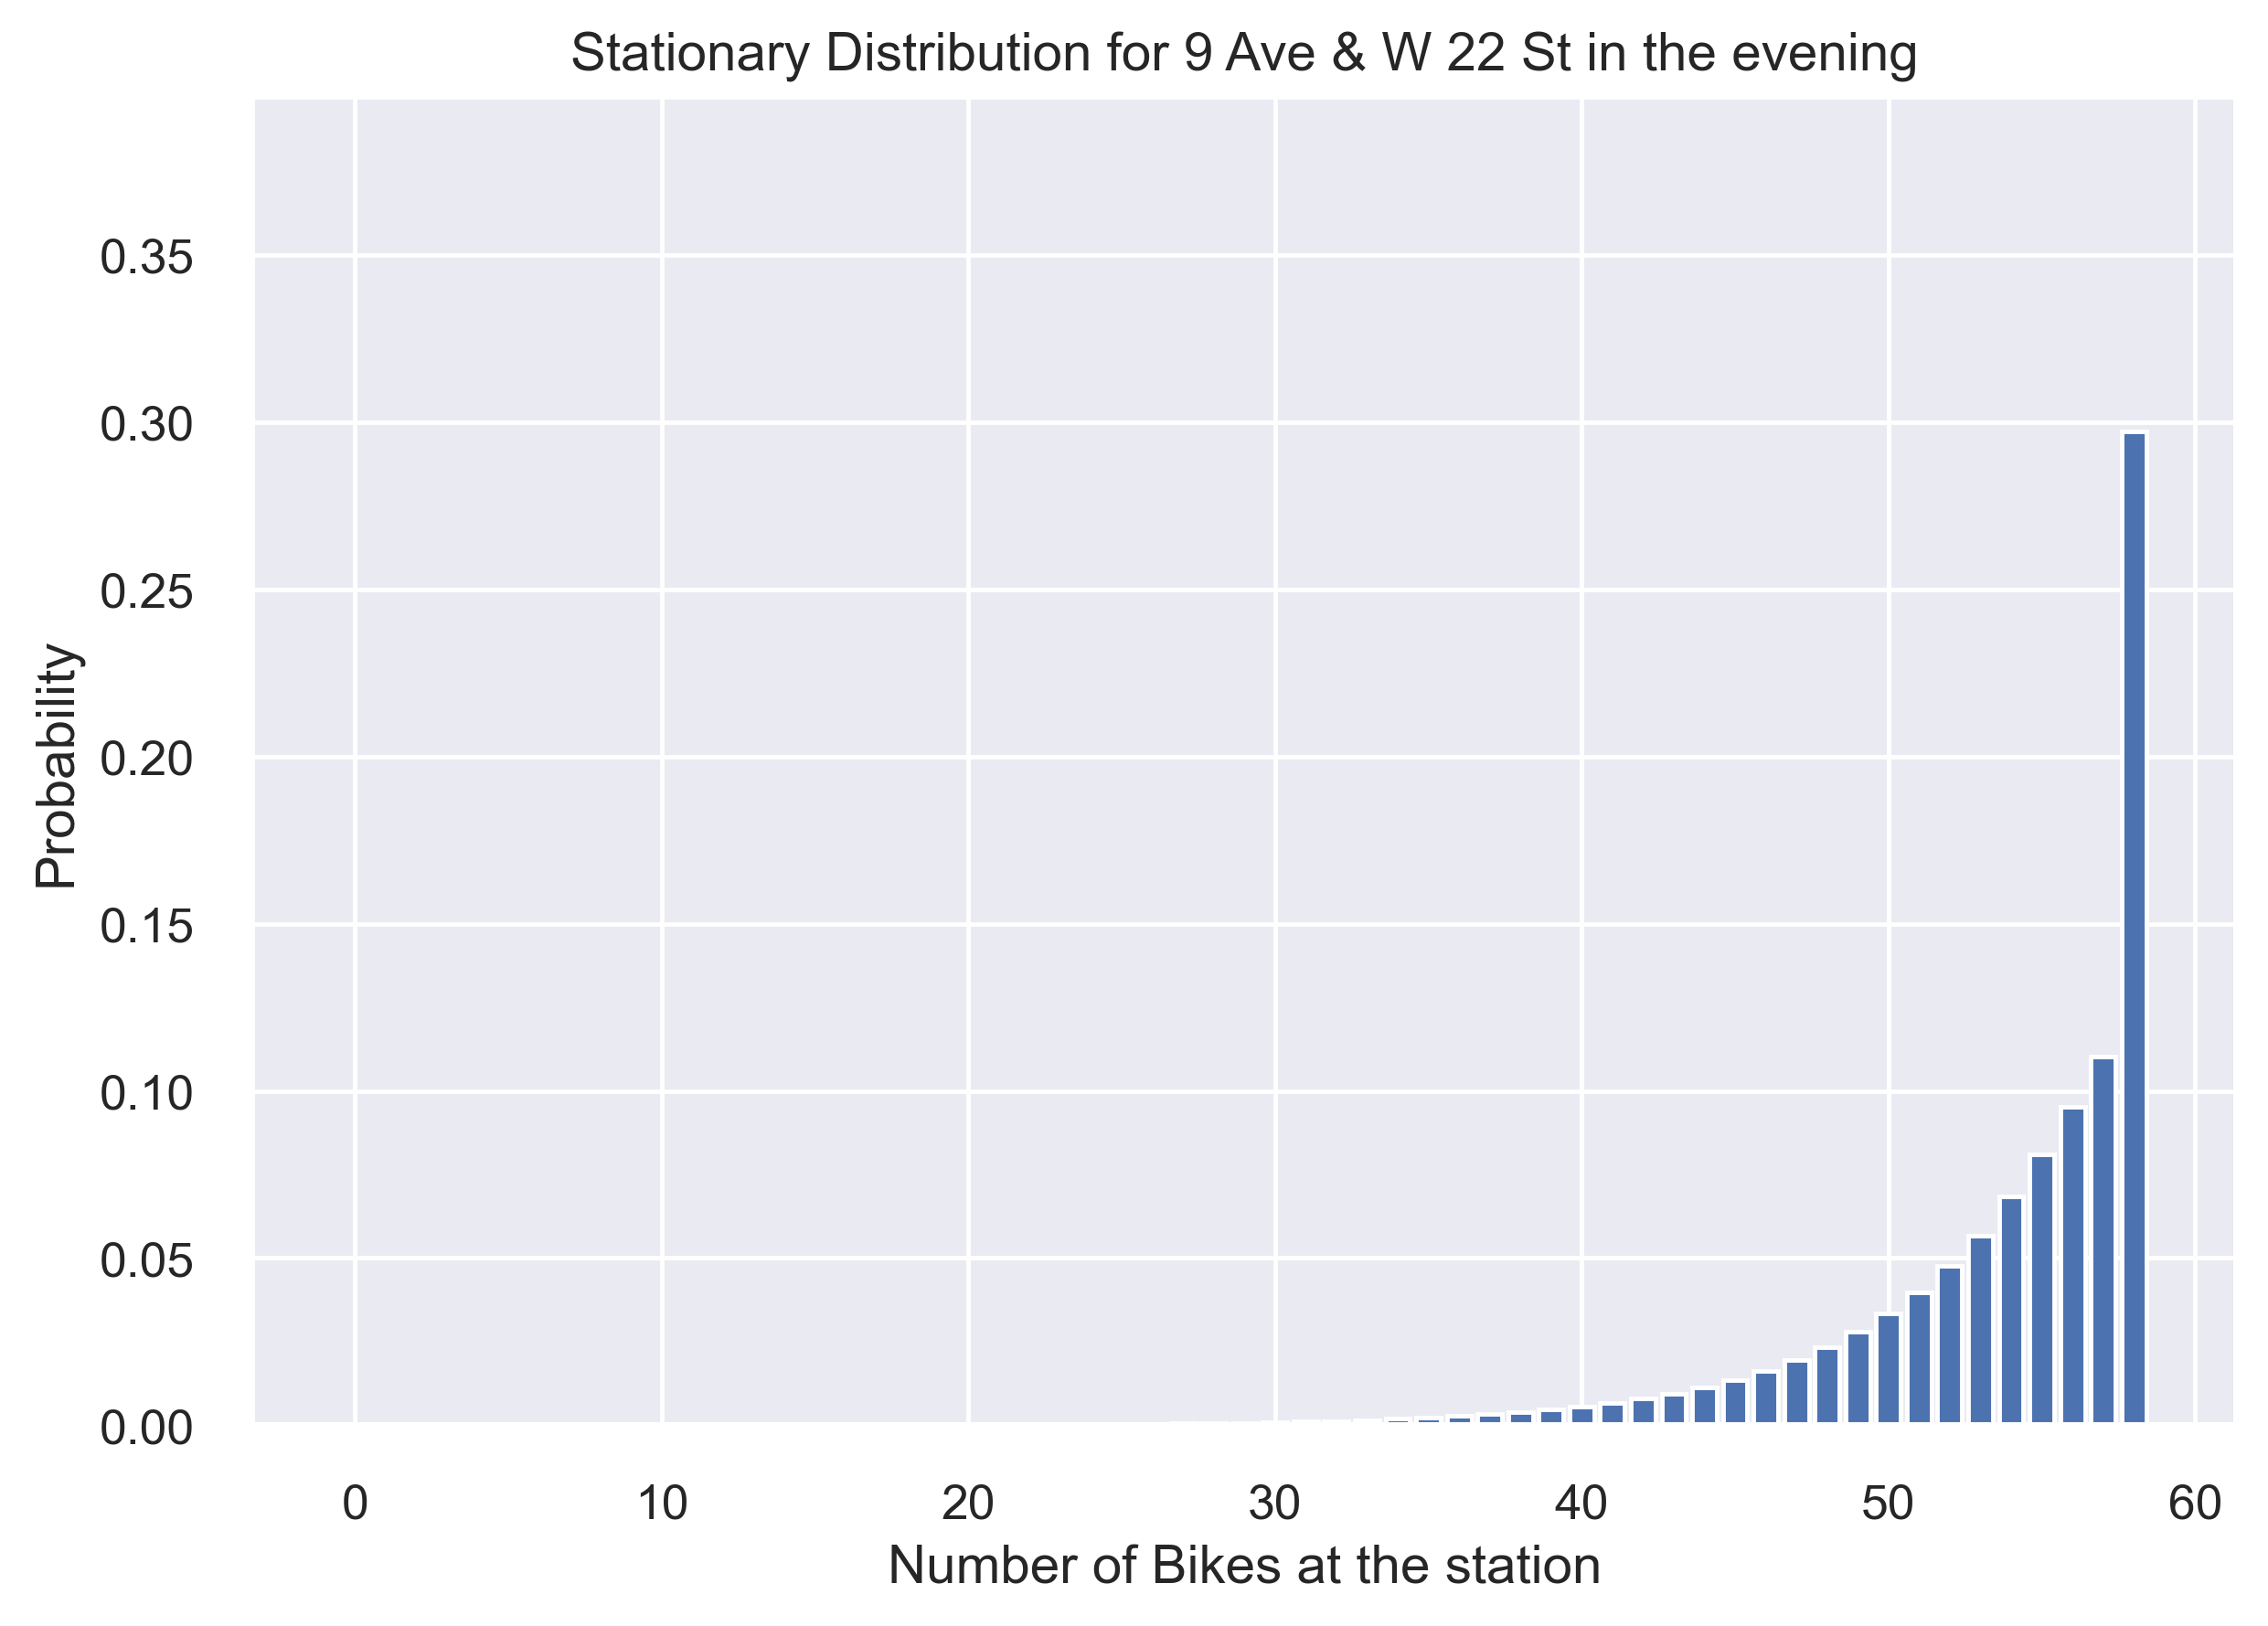

In [60]:
display(flow)
display(probability)
display(transition_matrix.round(3))

y = stationary_distribution
x = np.arange(0, len(y), 1).tolist()

plt.ylim(0, stationary_distribution.max() + 0.1)
plt.bar(x,y)
plt.title('Stationary Distribution for 9 Ave & W 22 St in the evening')
plt.xlabel('Number of Bikes at the station')
plt.ylabel('Probability')
plt.show()

## Plotting Stationary Distributions for 3 Chosen Stations

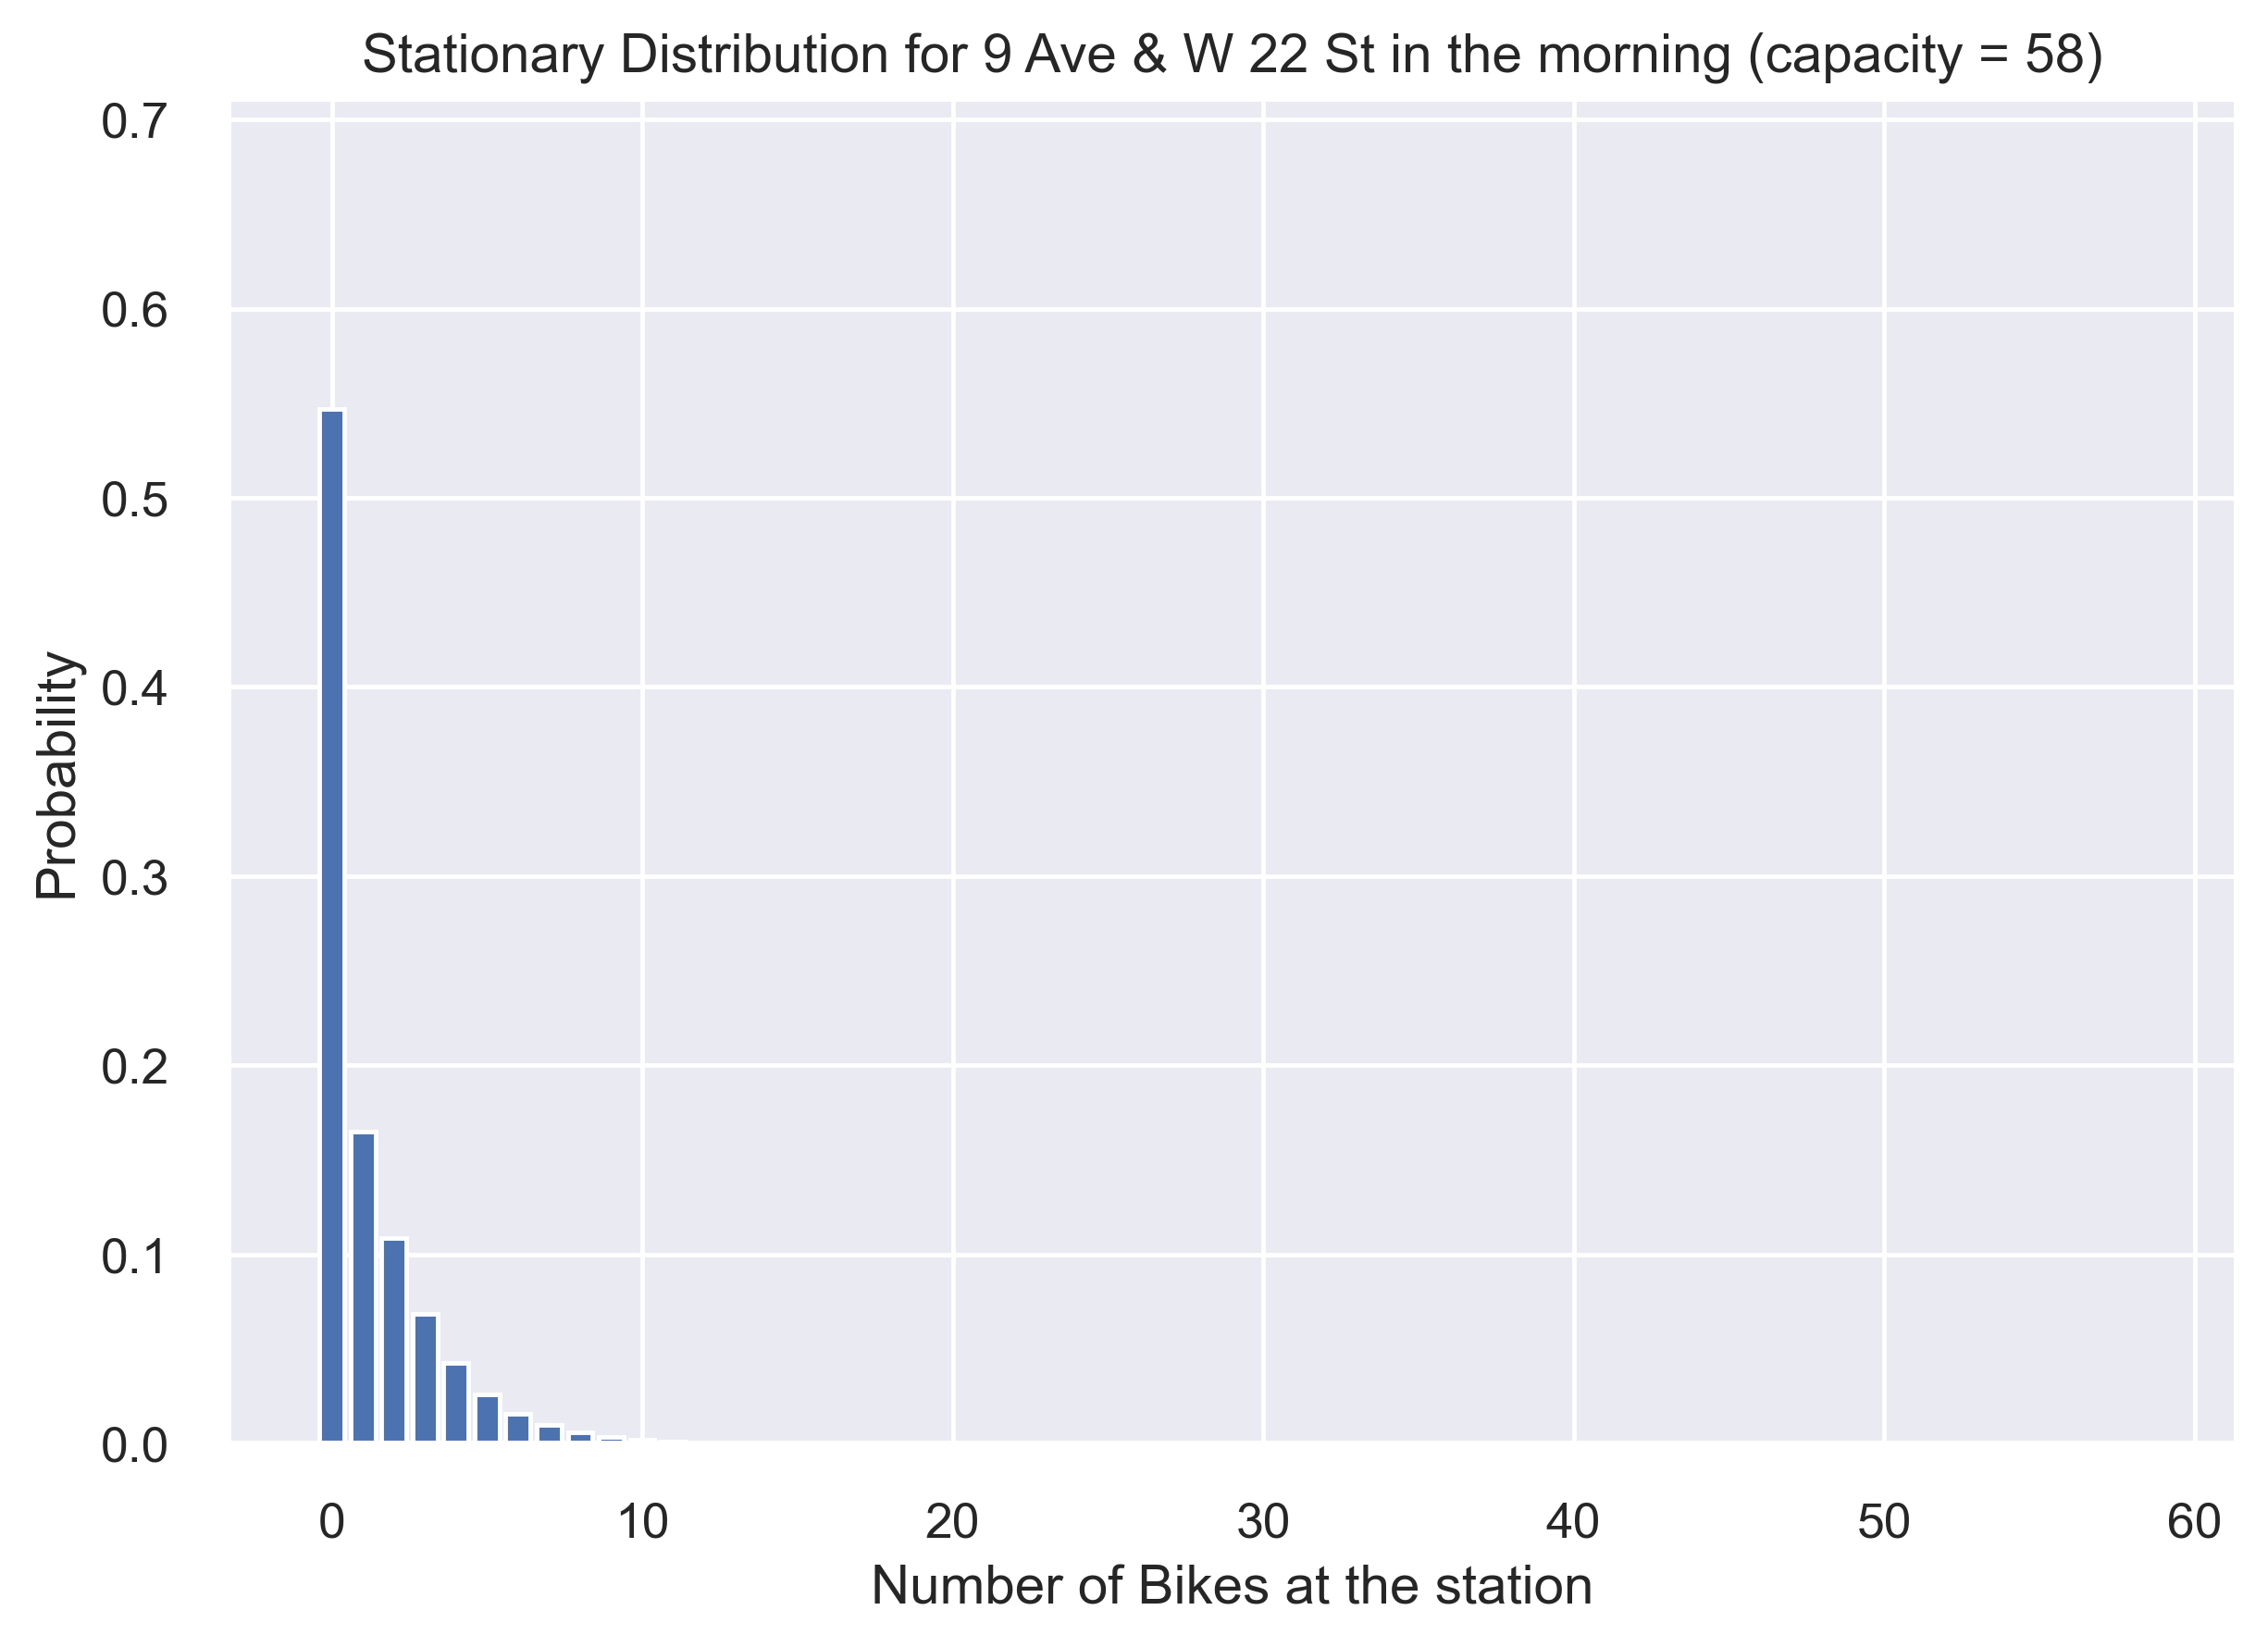

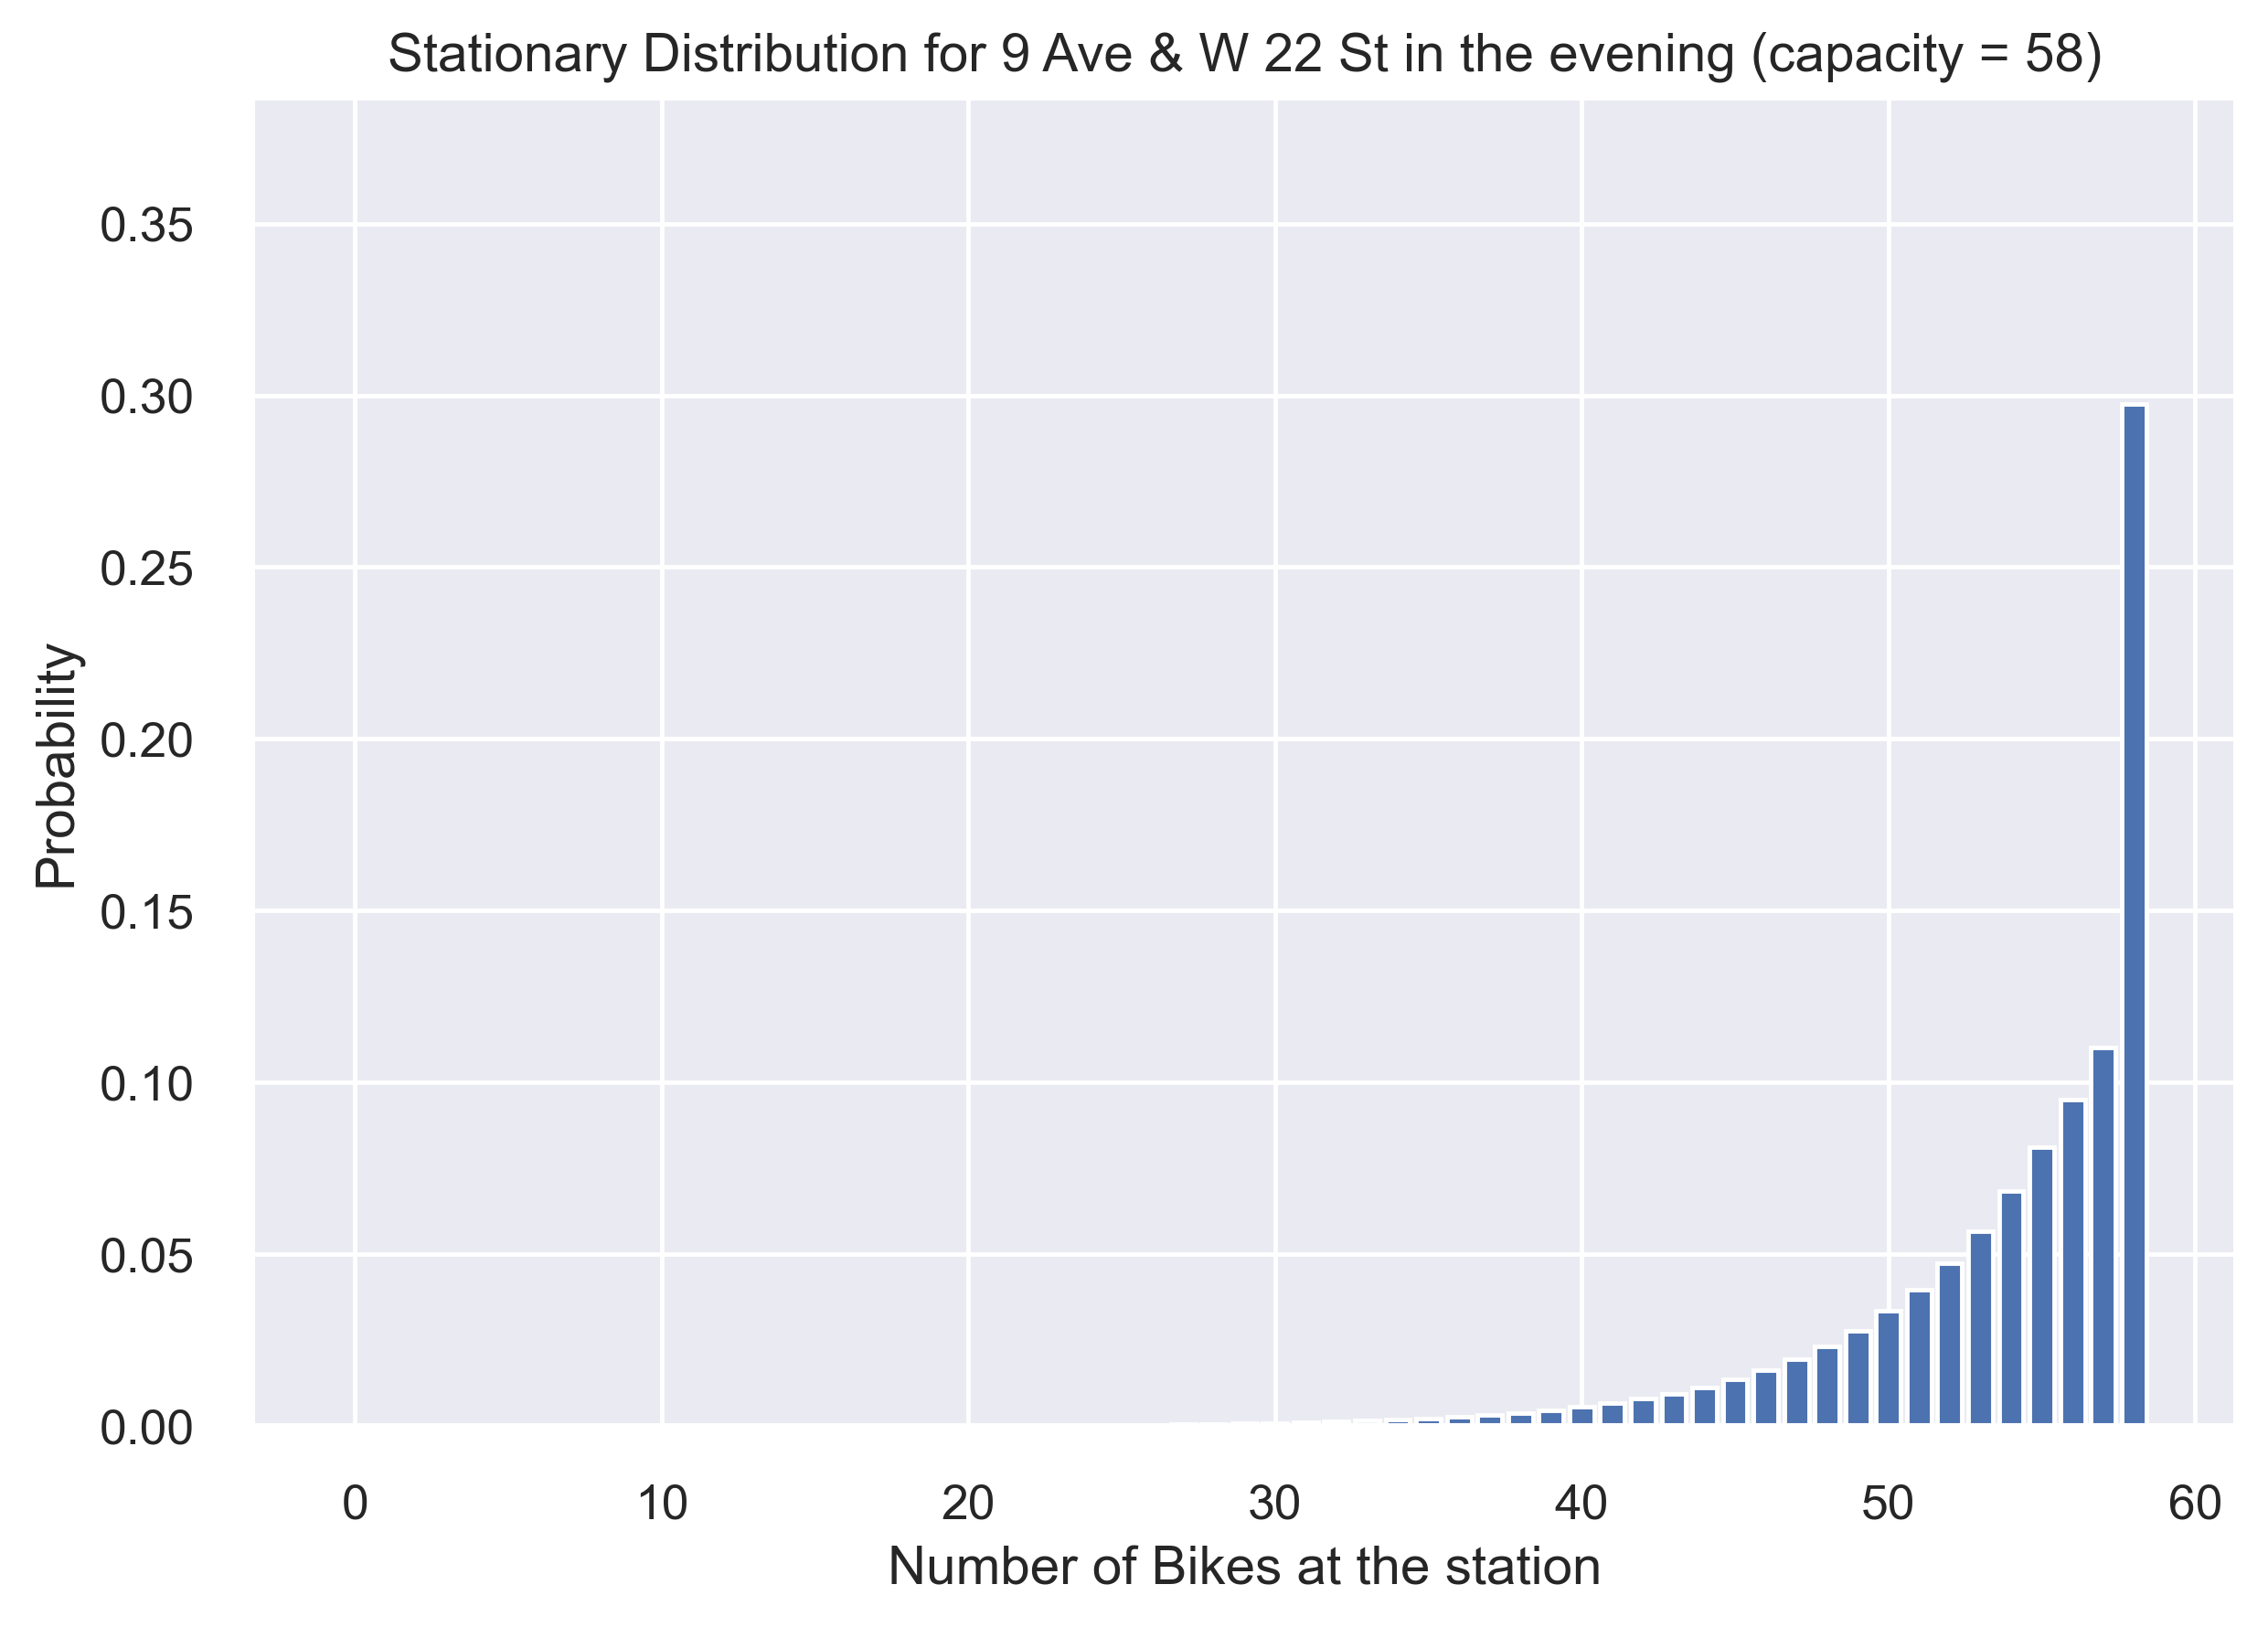

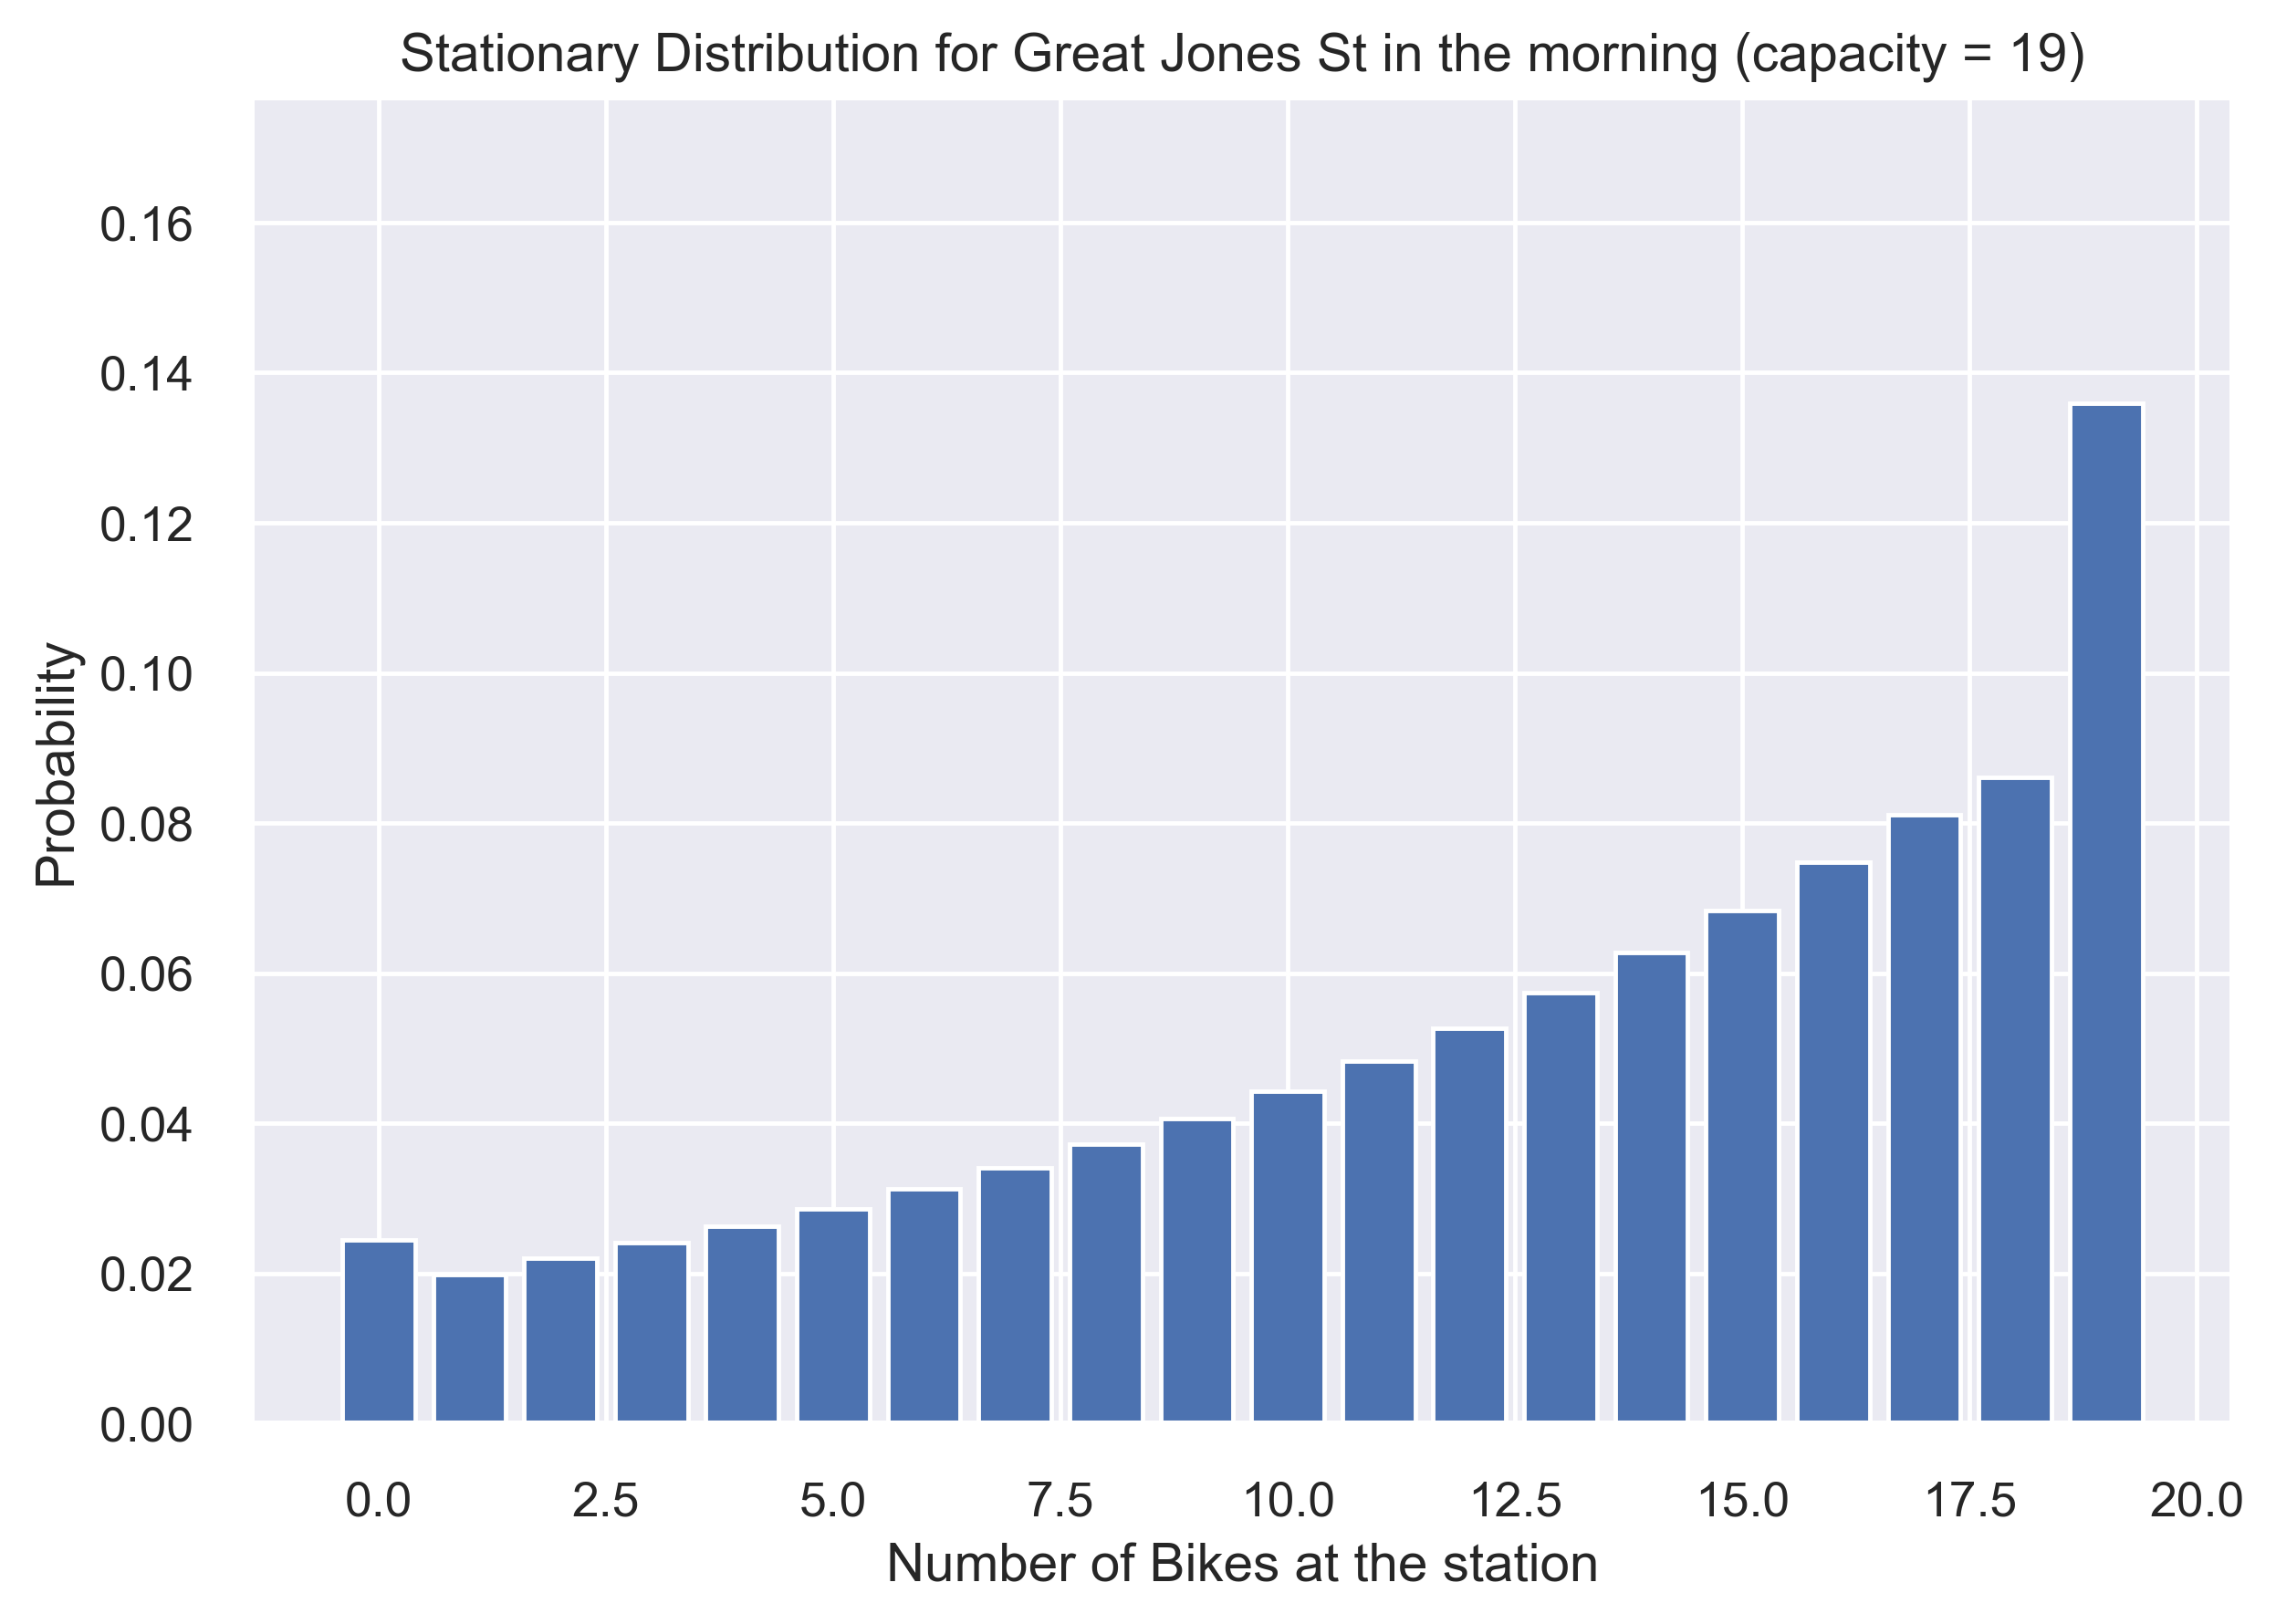

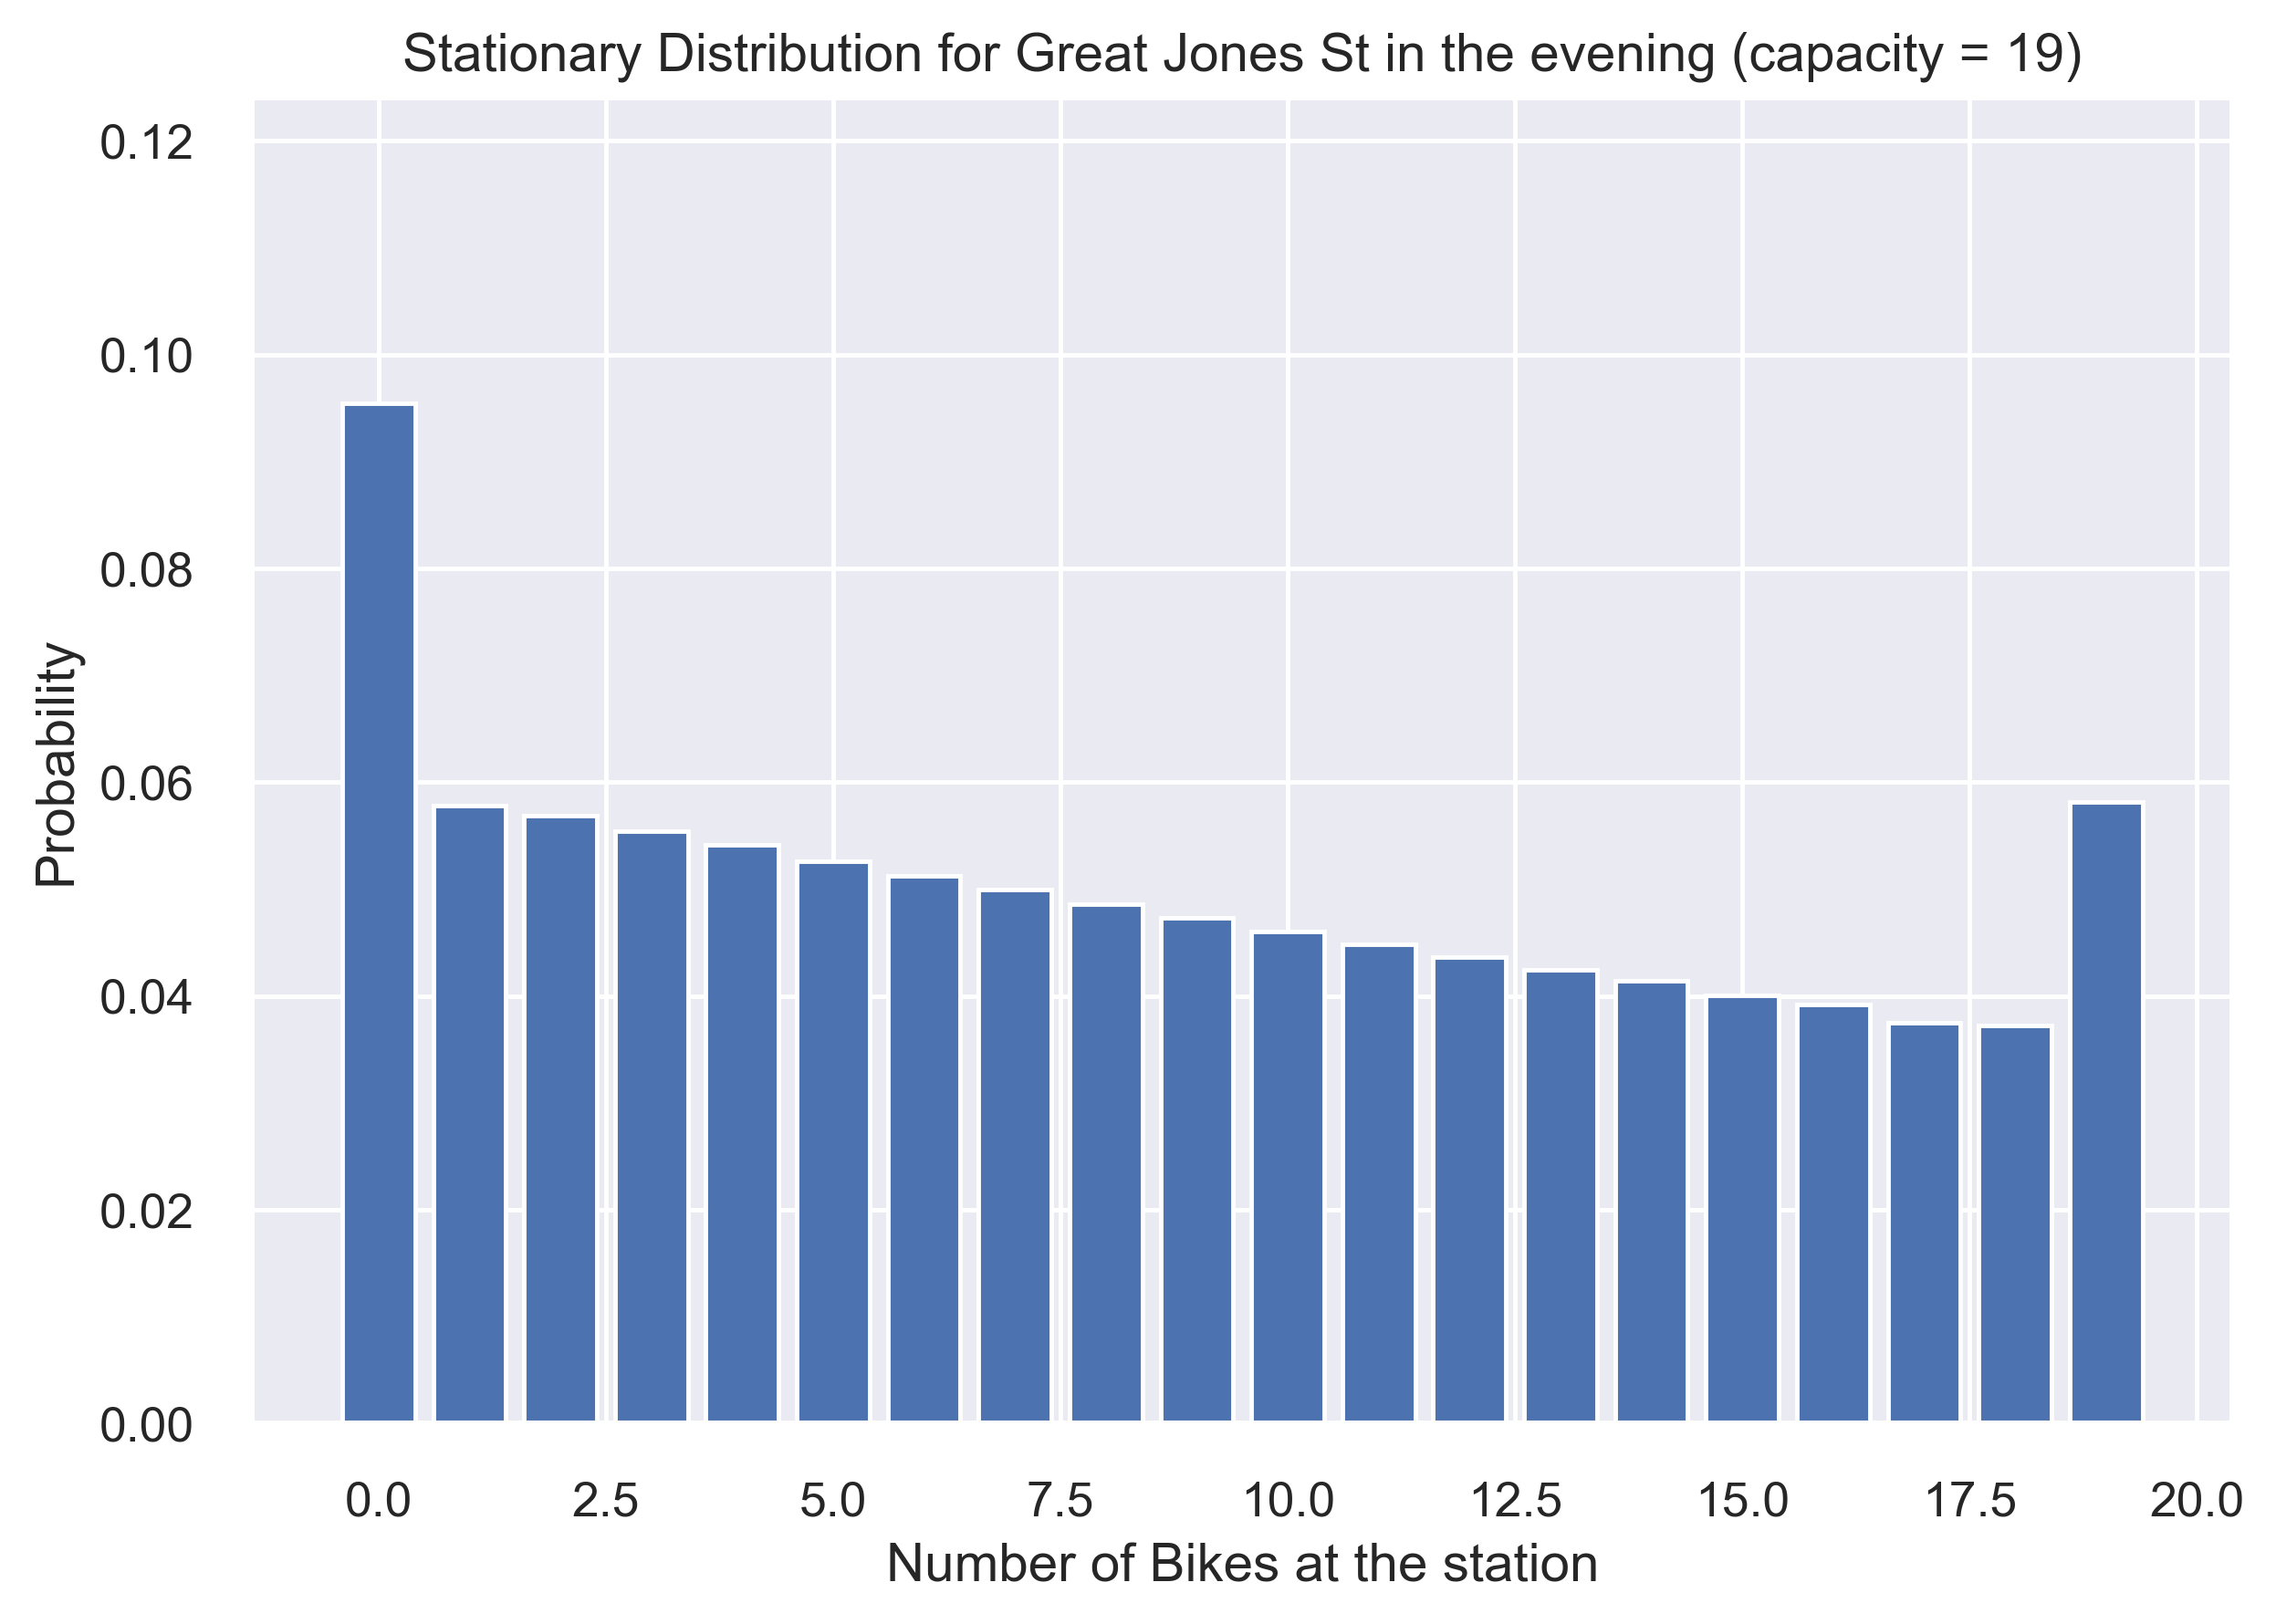

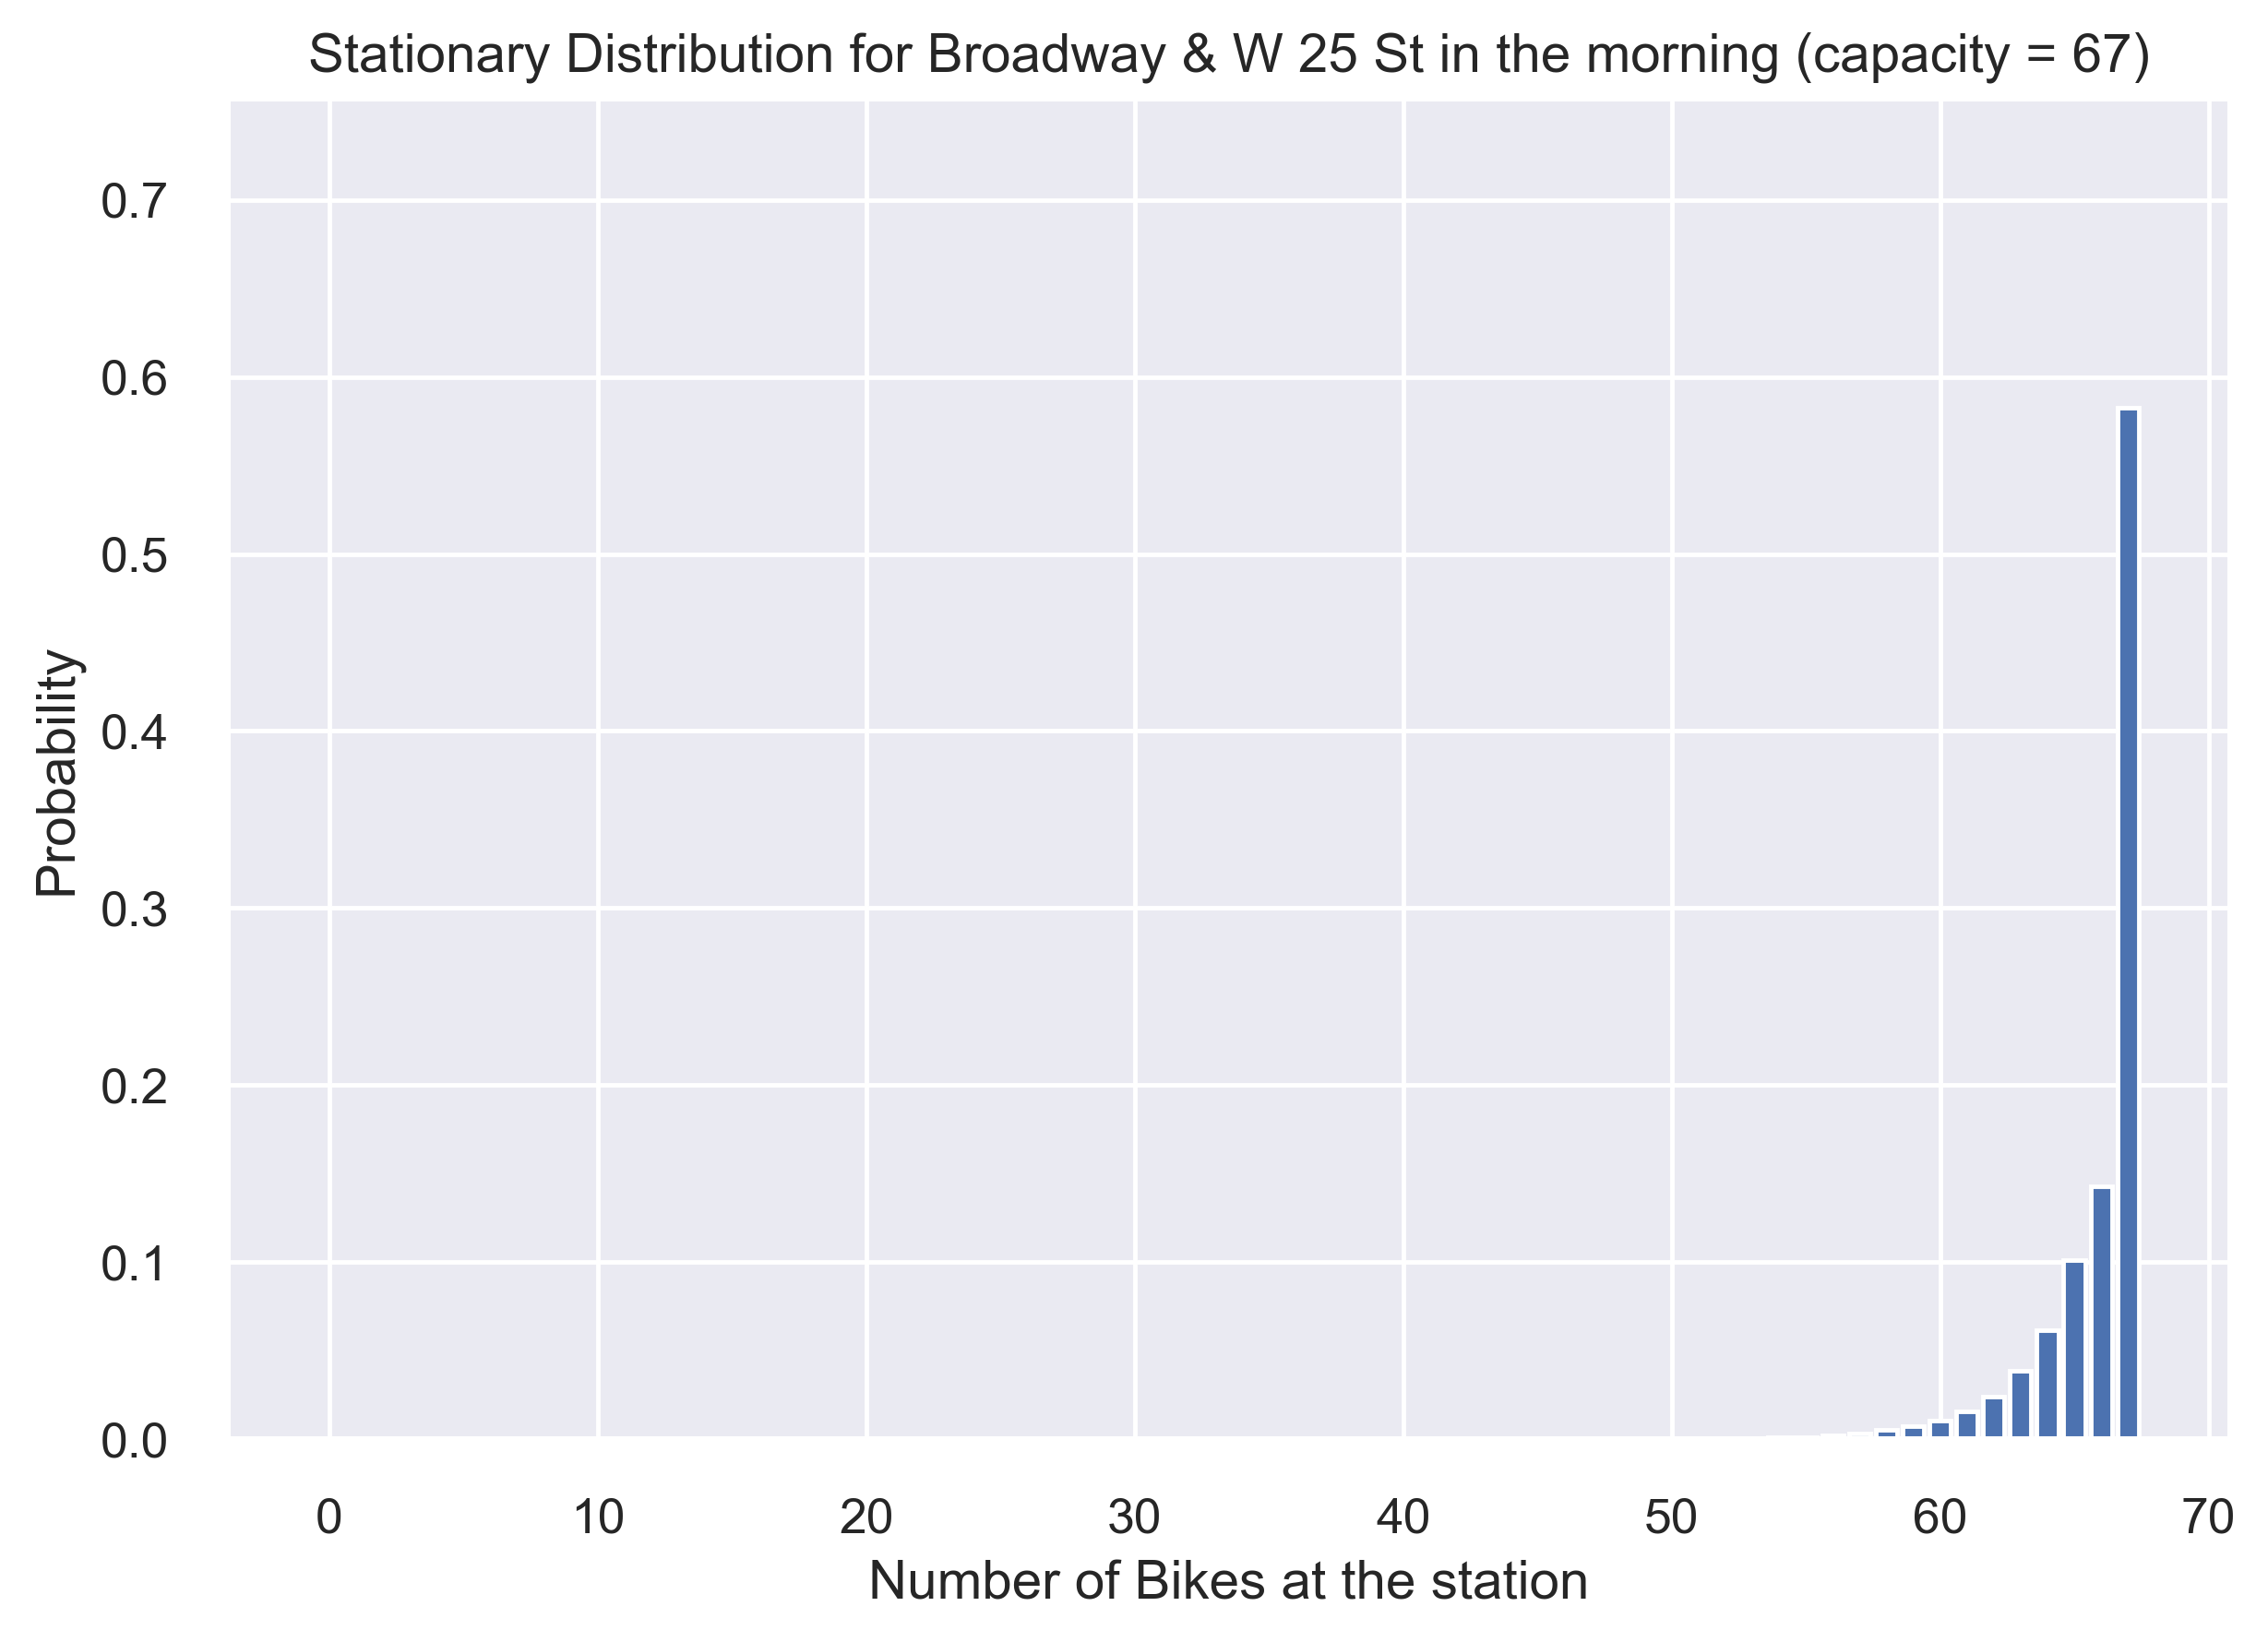

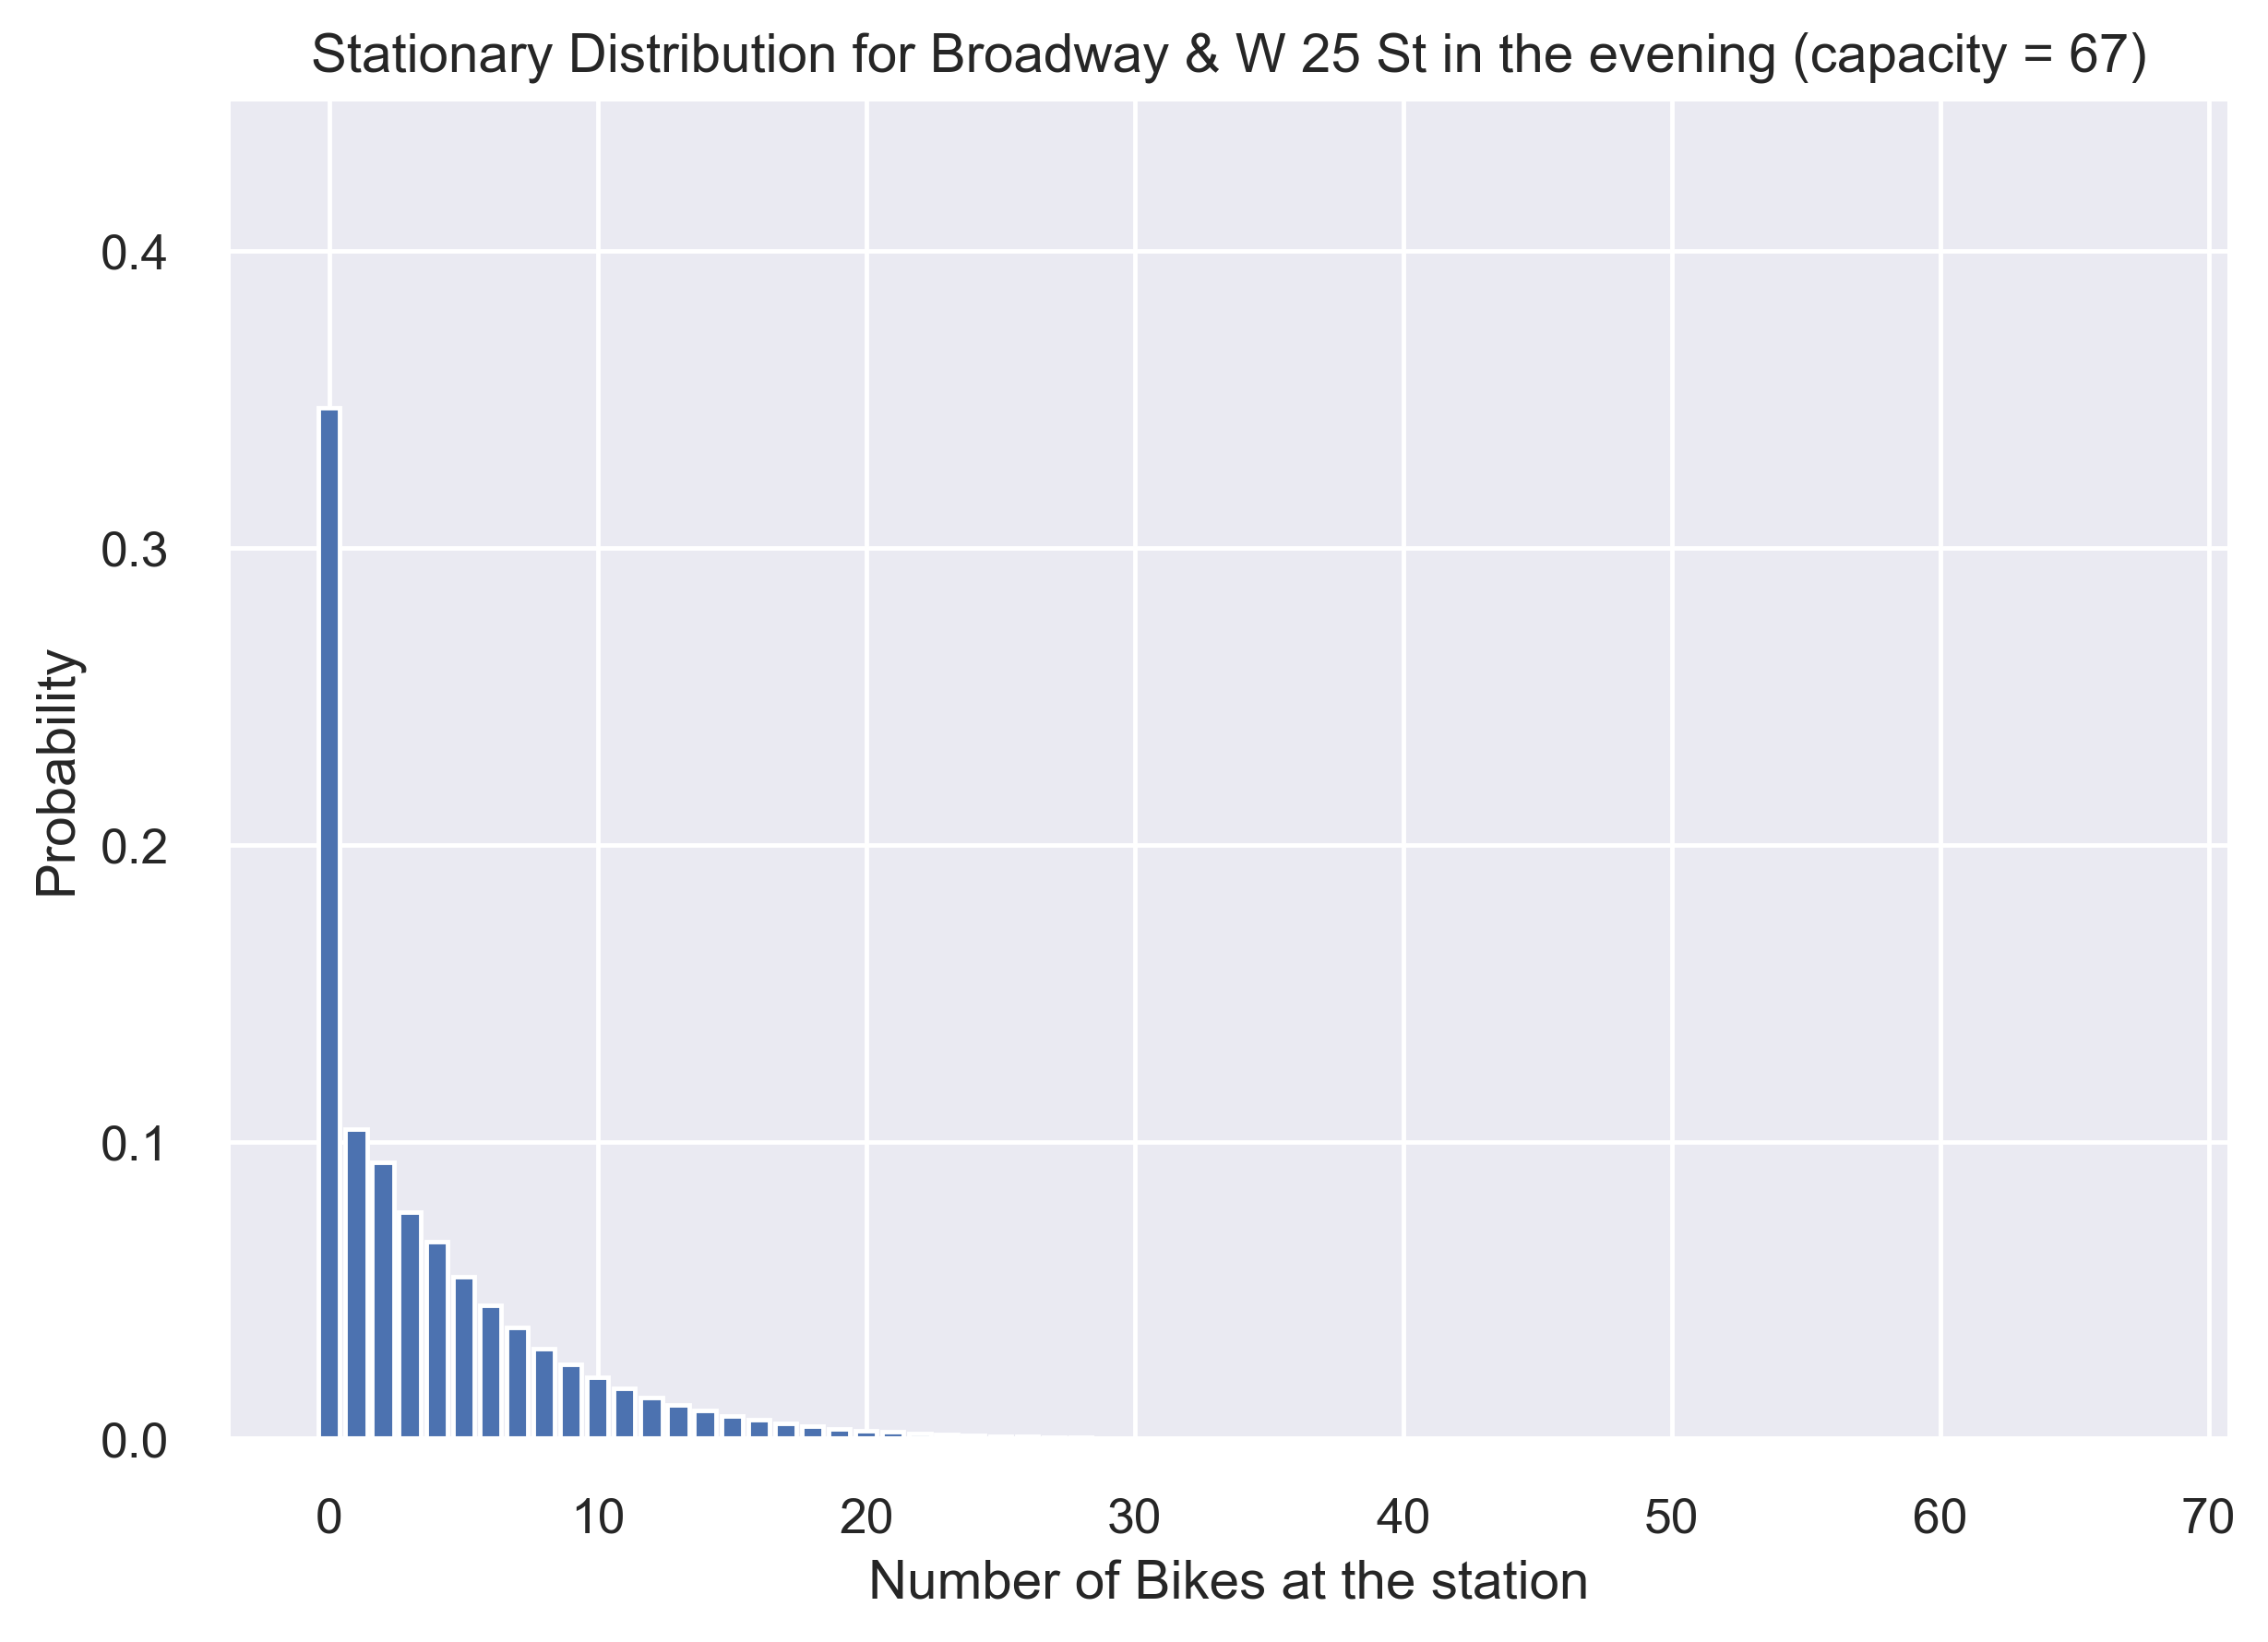

In [61]:
stations = ['9 Ave & W 22 St', 'Great Jones St', 'Broadway & W 25 St']
times = ['morning', 'evening']
capacities = [58, 19, 67]

for i in range(len(stations)):
    for time in times:
        flow, probability, transition_matrix, stationary_distribution = get_all(stations[i], time)

        y = stationary_distribution
        x = np.arange(0, len(y), 1).tolist()

        plt.ylim(0, y.max()*1.3)
        plt.bar(x,y)
        plt.title('Stationary Distribution for ' + str(stations[i]) + ' in the ' + str(time) + ' (capacity = ' + str(capacities[i]) +')')
        plt.xlabel('Number of Bikes at the station')
        plt.ylabel('Probability')
        plt.show()

## Conclusion for selected stations

Based upon the stationary distributions we had plotted, we can conclude that:

* There is a high probability 9 Ave & W 22 St station would be **empty in the morning** and and high probability it would be **full at night.**
* There is a high probability Great Jones St station would be **full in the morning** and and high probability it would be **empty at night.**
* There is a high probability Broadway & W 25 St station would be **full in the morning** and and high probability it would be **empty at night.**

Generally, we would expect the stations to have a higher probability of being full in the morning and a higher probability of being empty at night. According to Citibike (2022), there have been typically 45% more evening commuters than morning commuters on a standard weekday. In addition, bike angels, bike trains, and motorized vehicles help transport bikes to rebalance the stations and improve the availability of bikes and docks for riders, which also explains why stations are typically full in the mornings. This pattern could be observed in the Great Jones St and Broadway & W 25 St station. 

However, 9 Ave & W 22 St station displays a different pattern - the opposite pattern of most stations with a high probability of being empty in the morning and full at night. This phenomenon may be explained by the geographic location of this station. 9 Ave & W 22 St station is located near the High Line and Hudson River, which is the perfect spot for cycling in comparison to in the city. In order to test this hypothesis, the following section computes the stationary distributions of other stations.

## Test for other stations

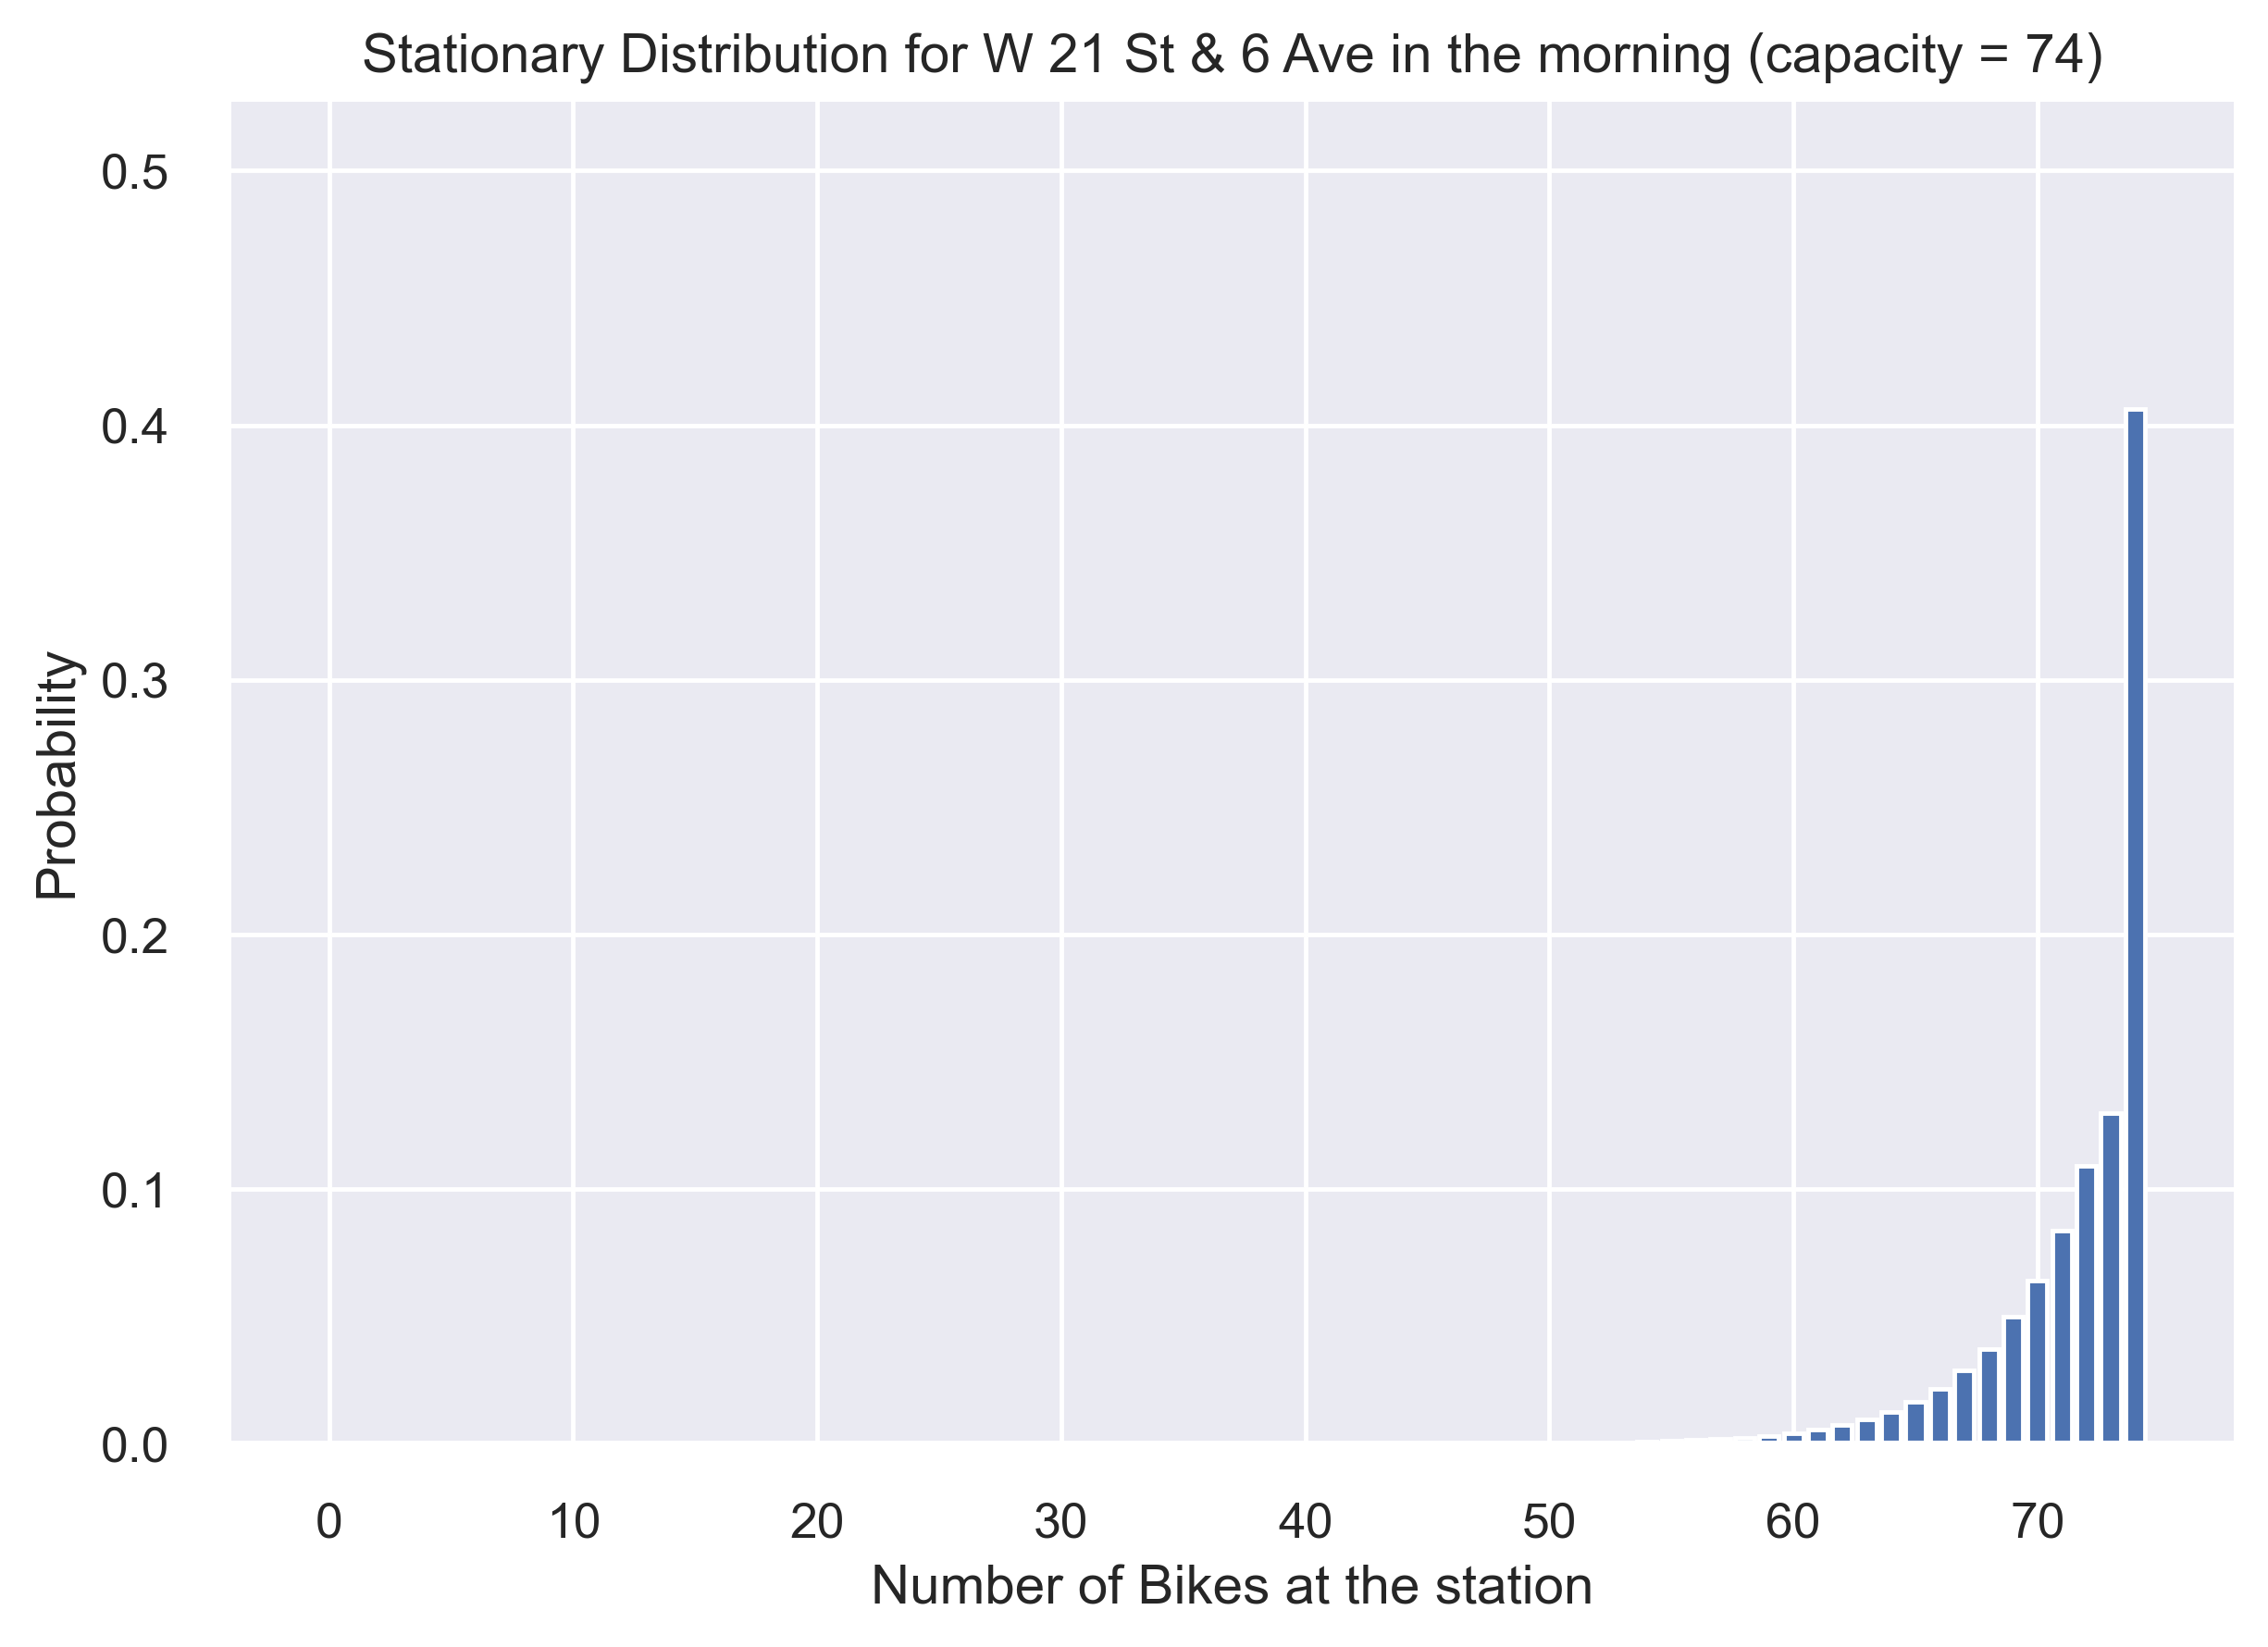

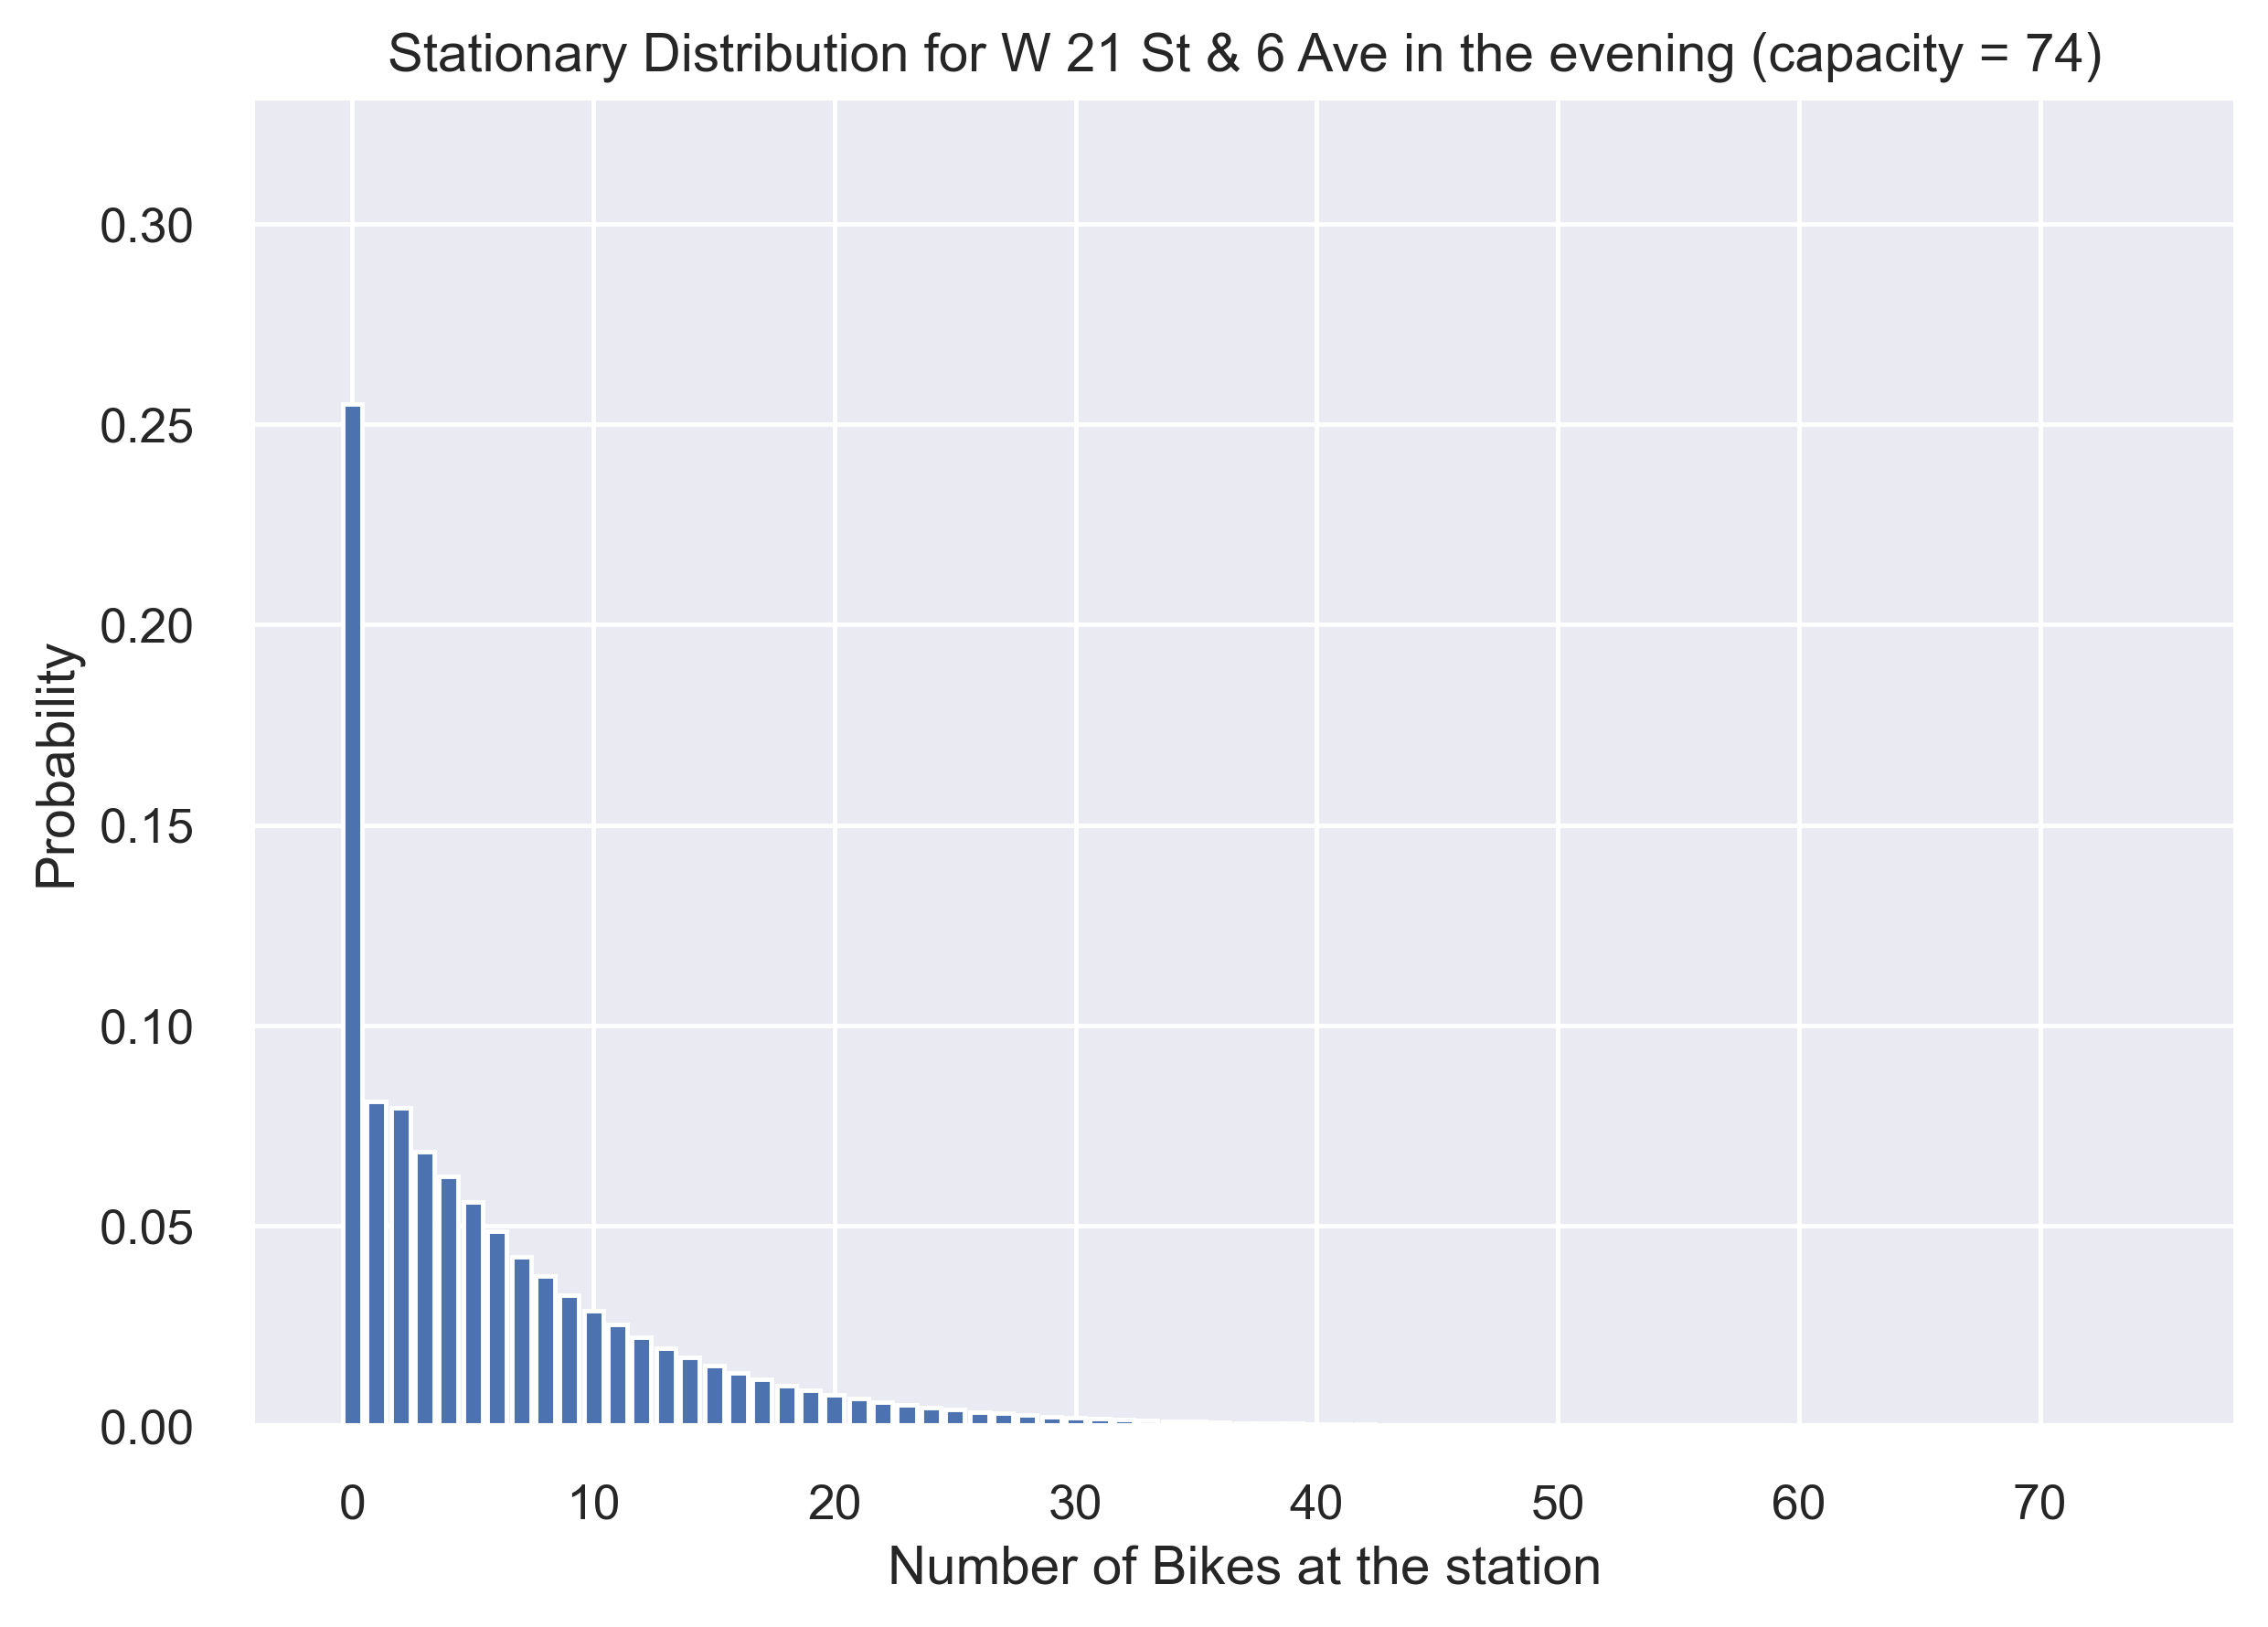

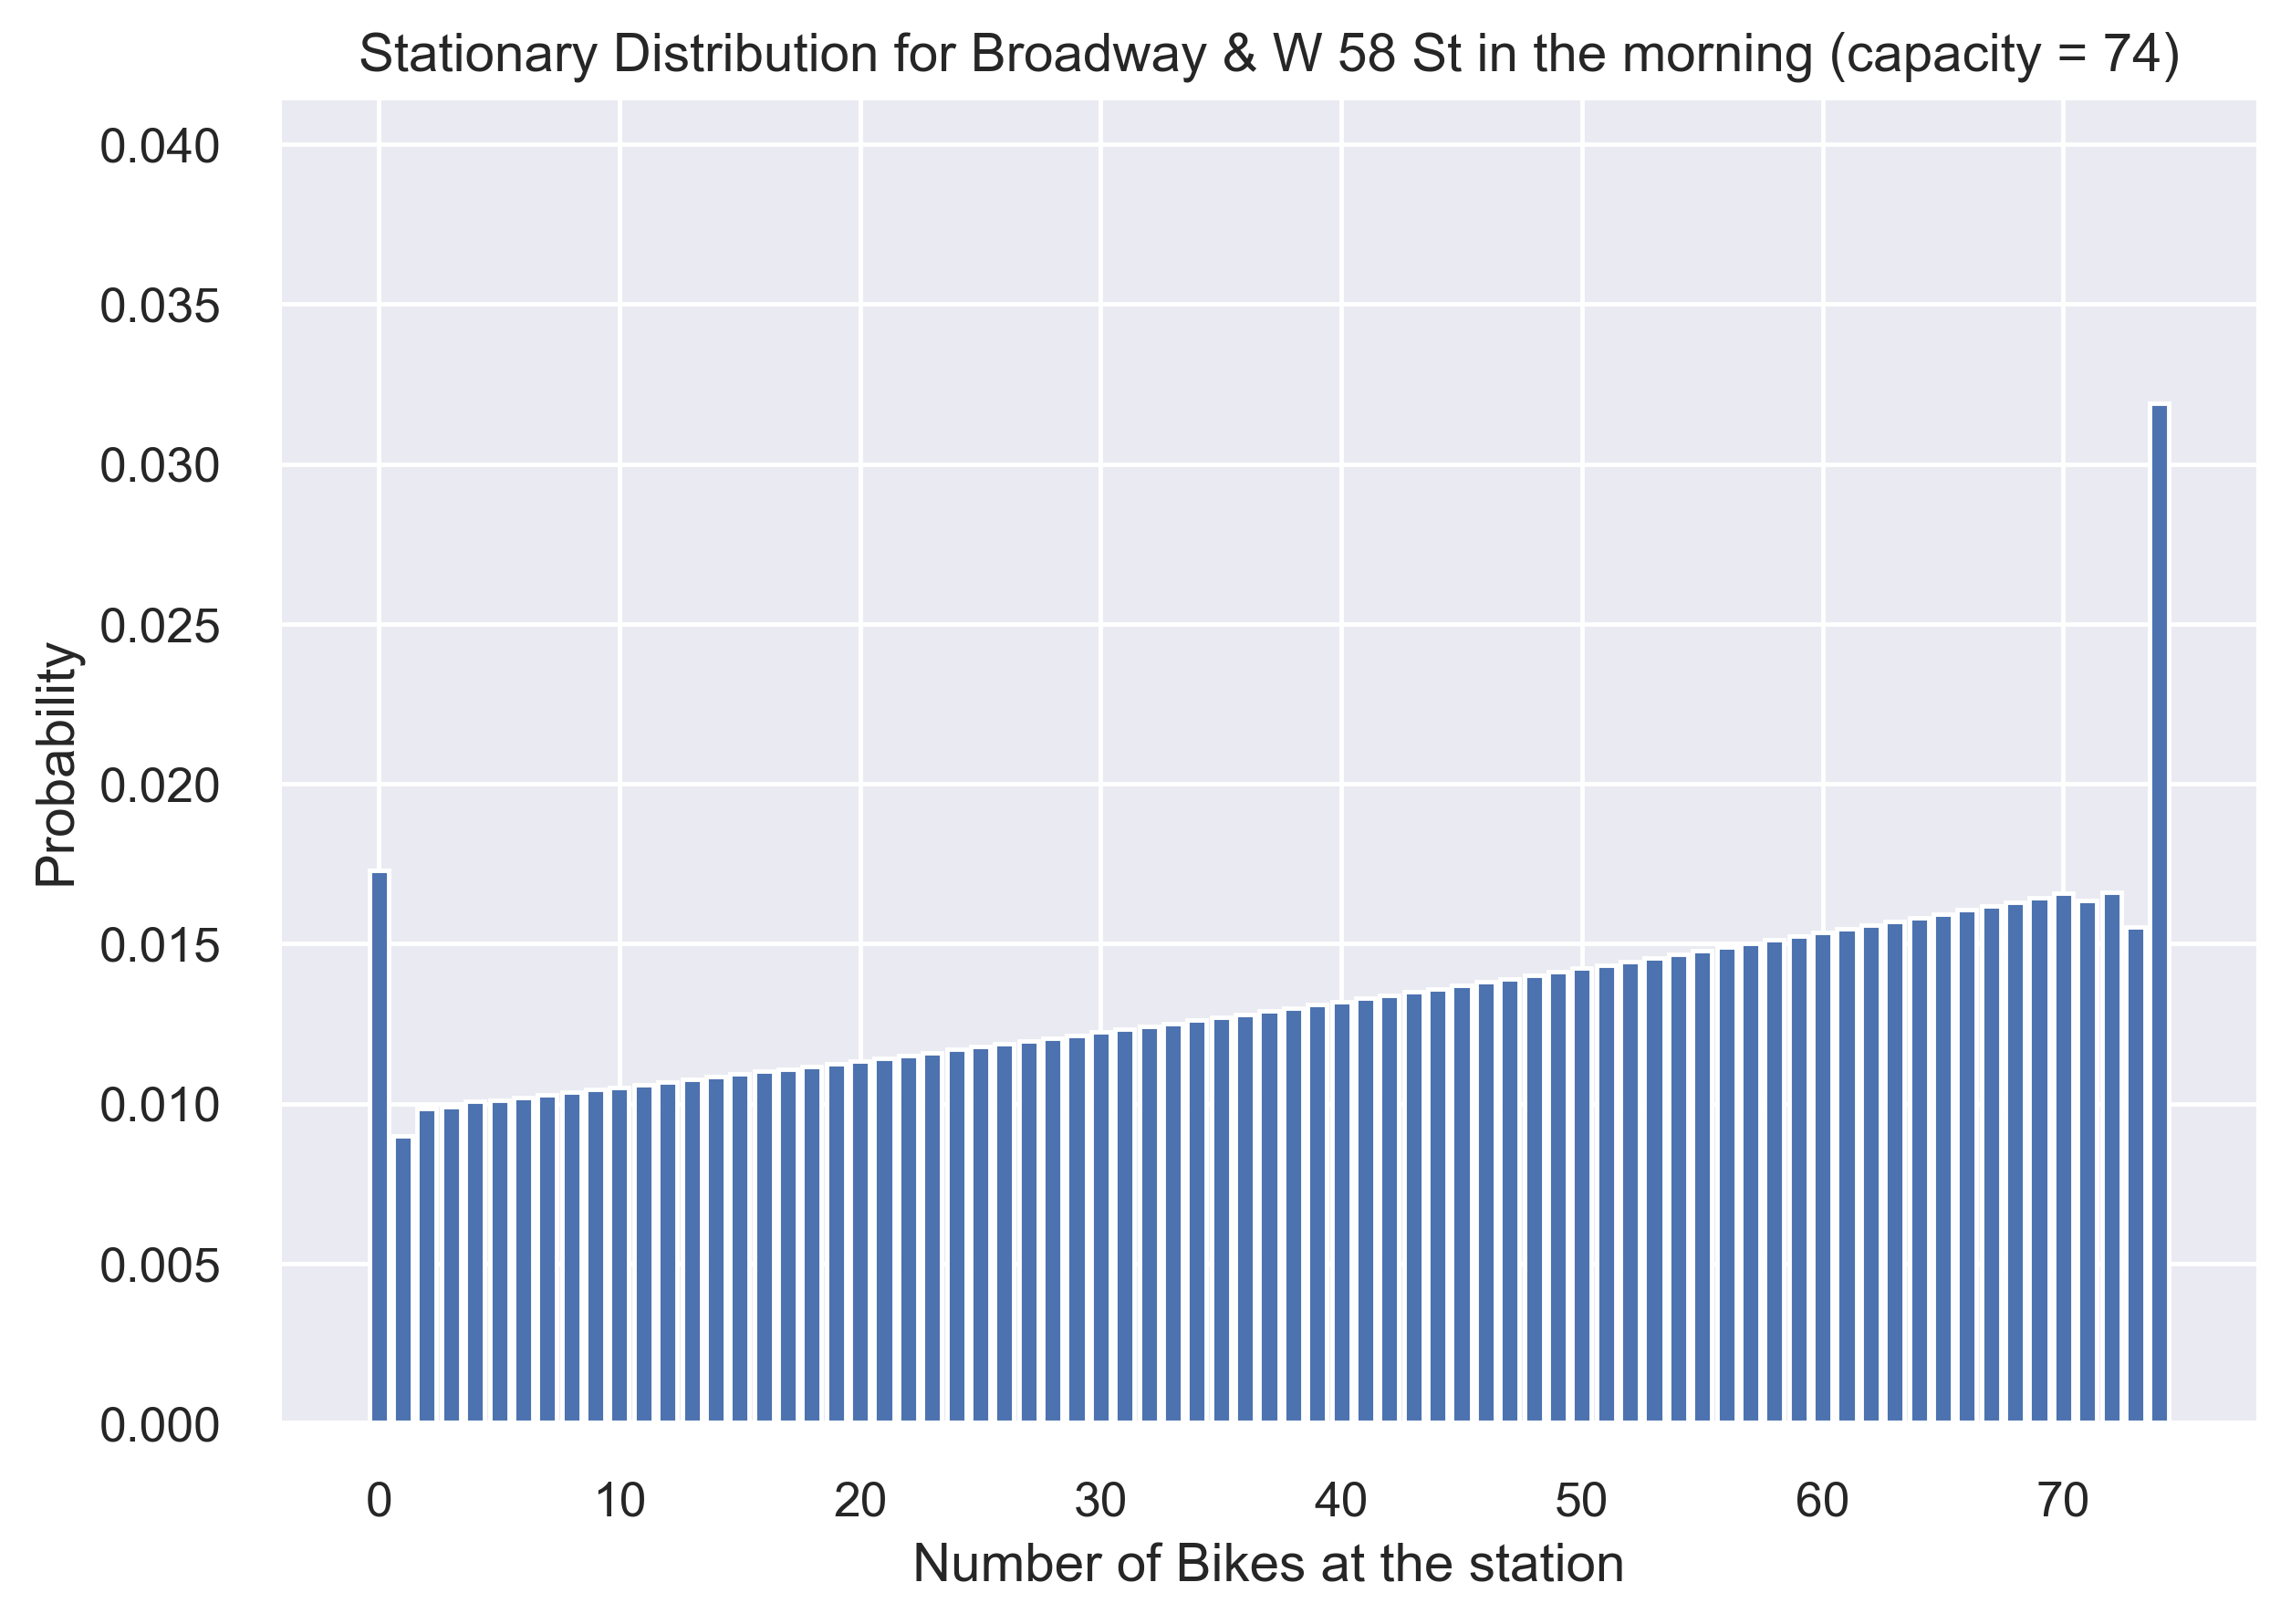

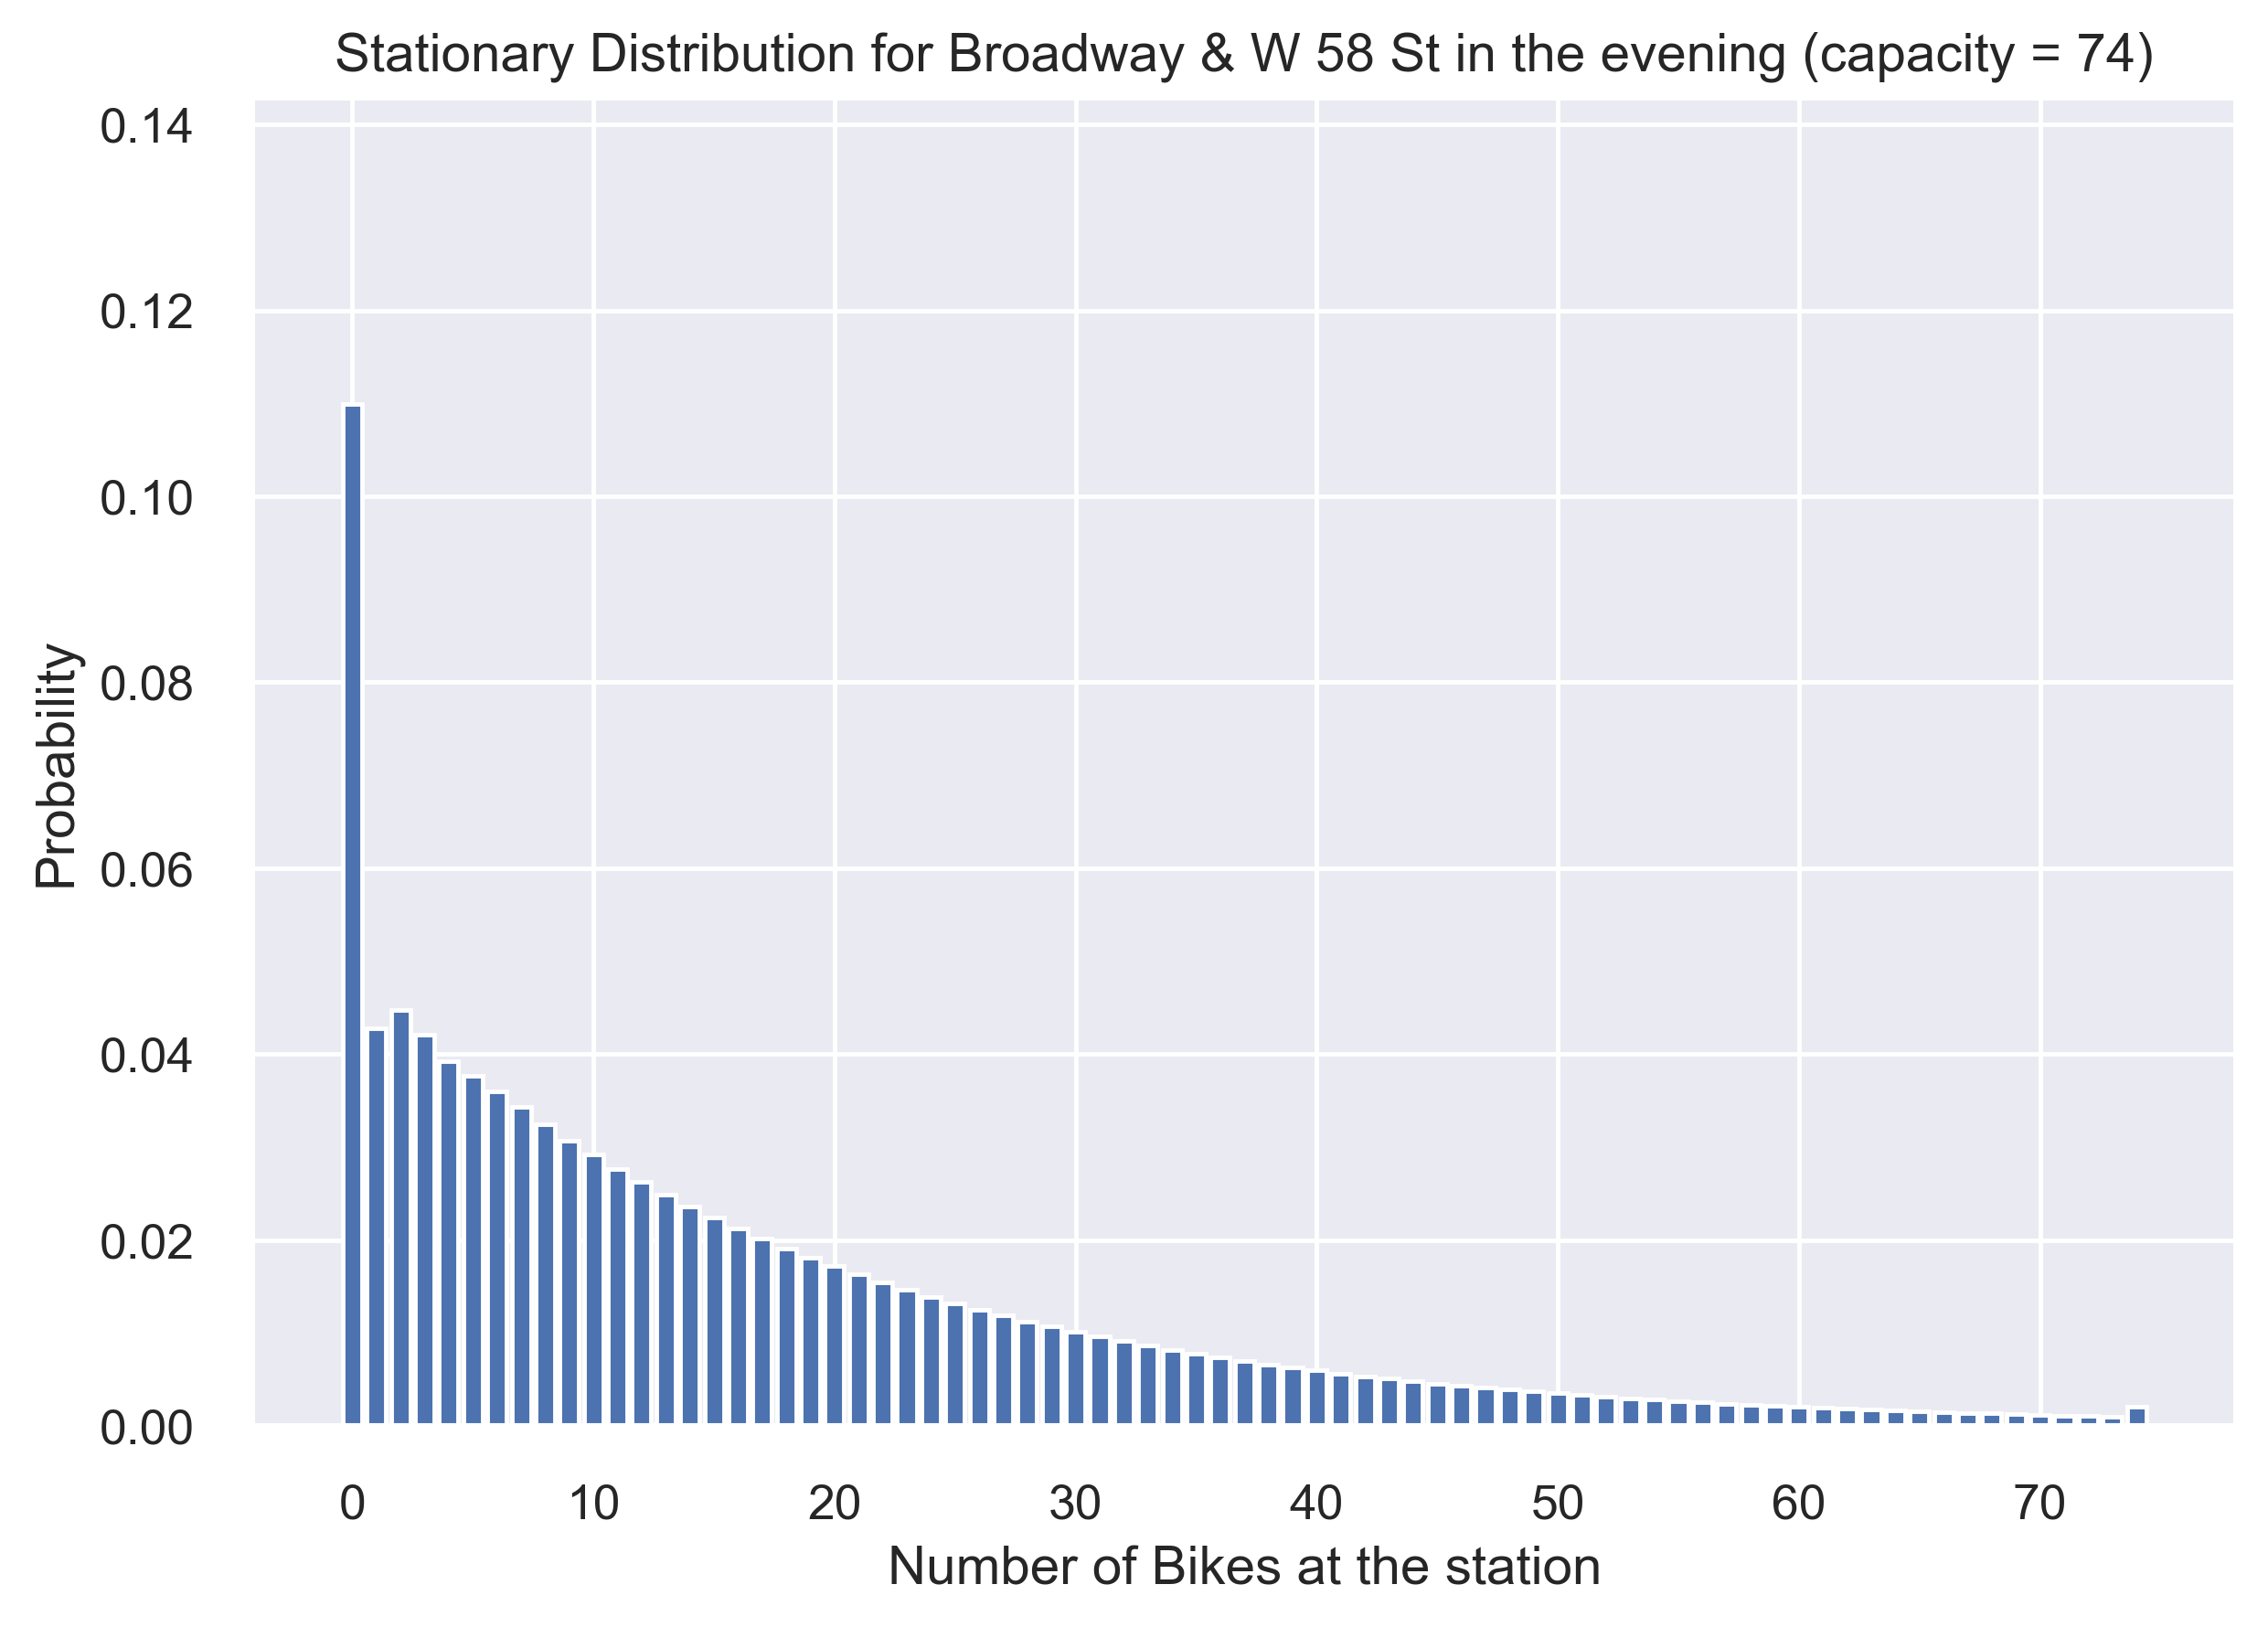

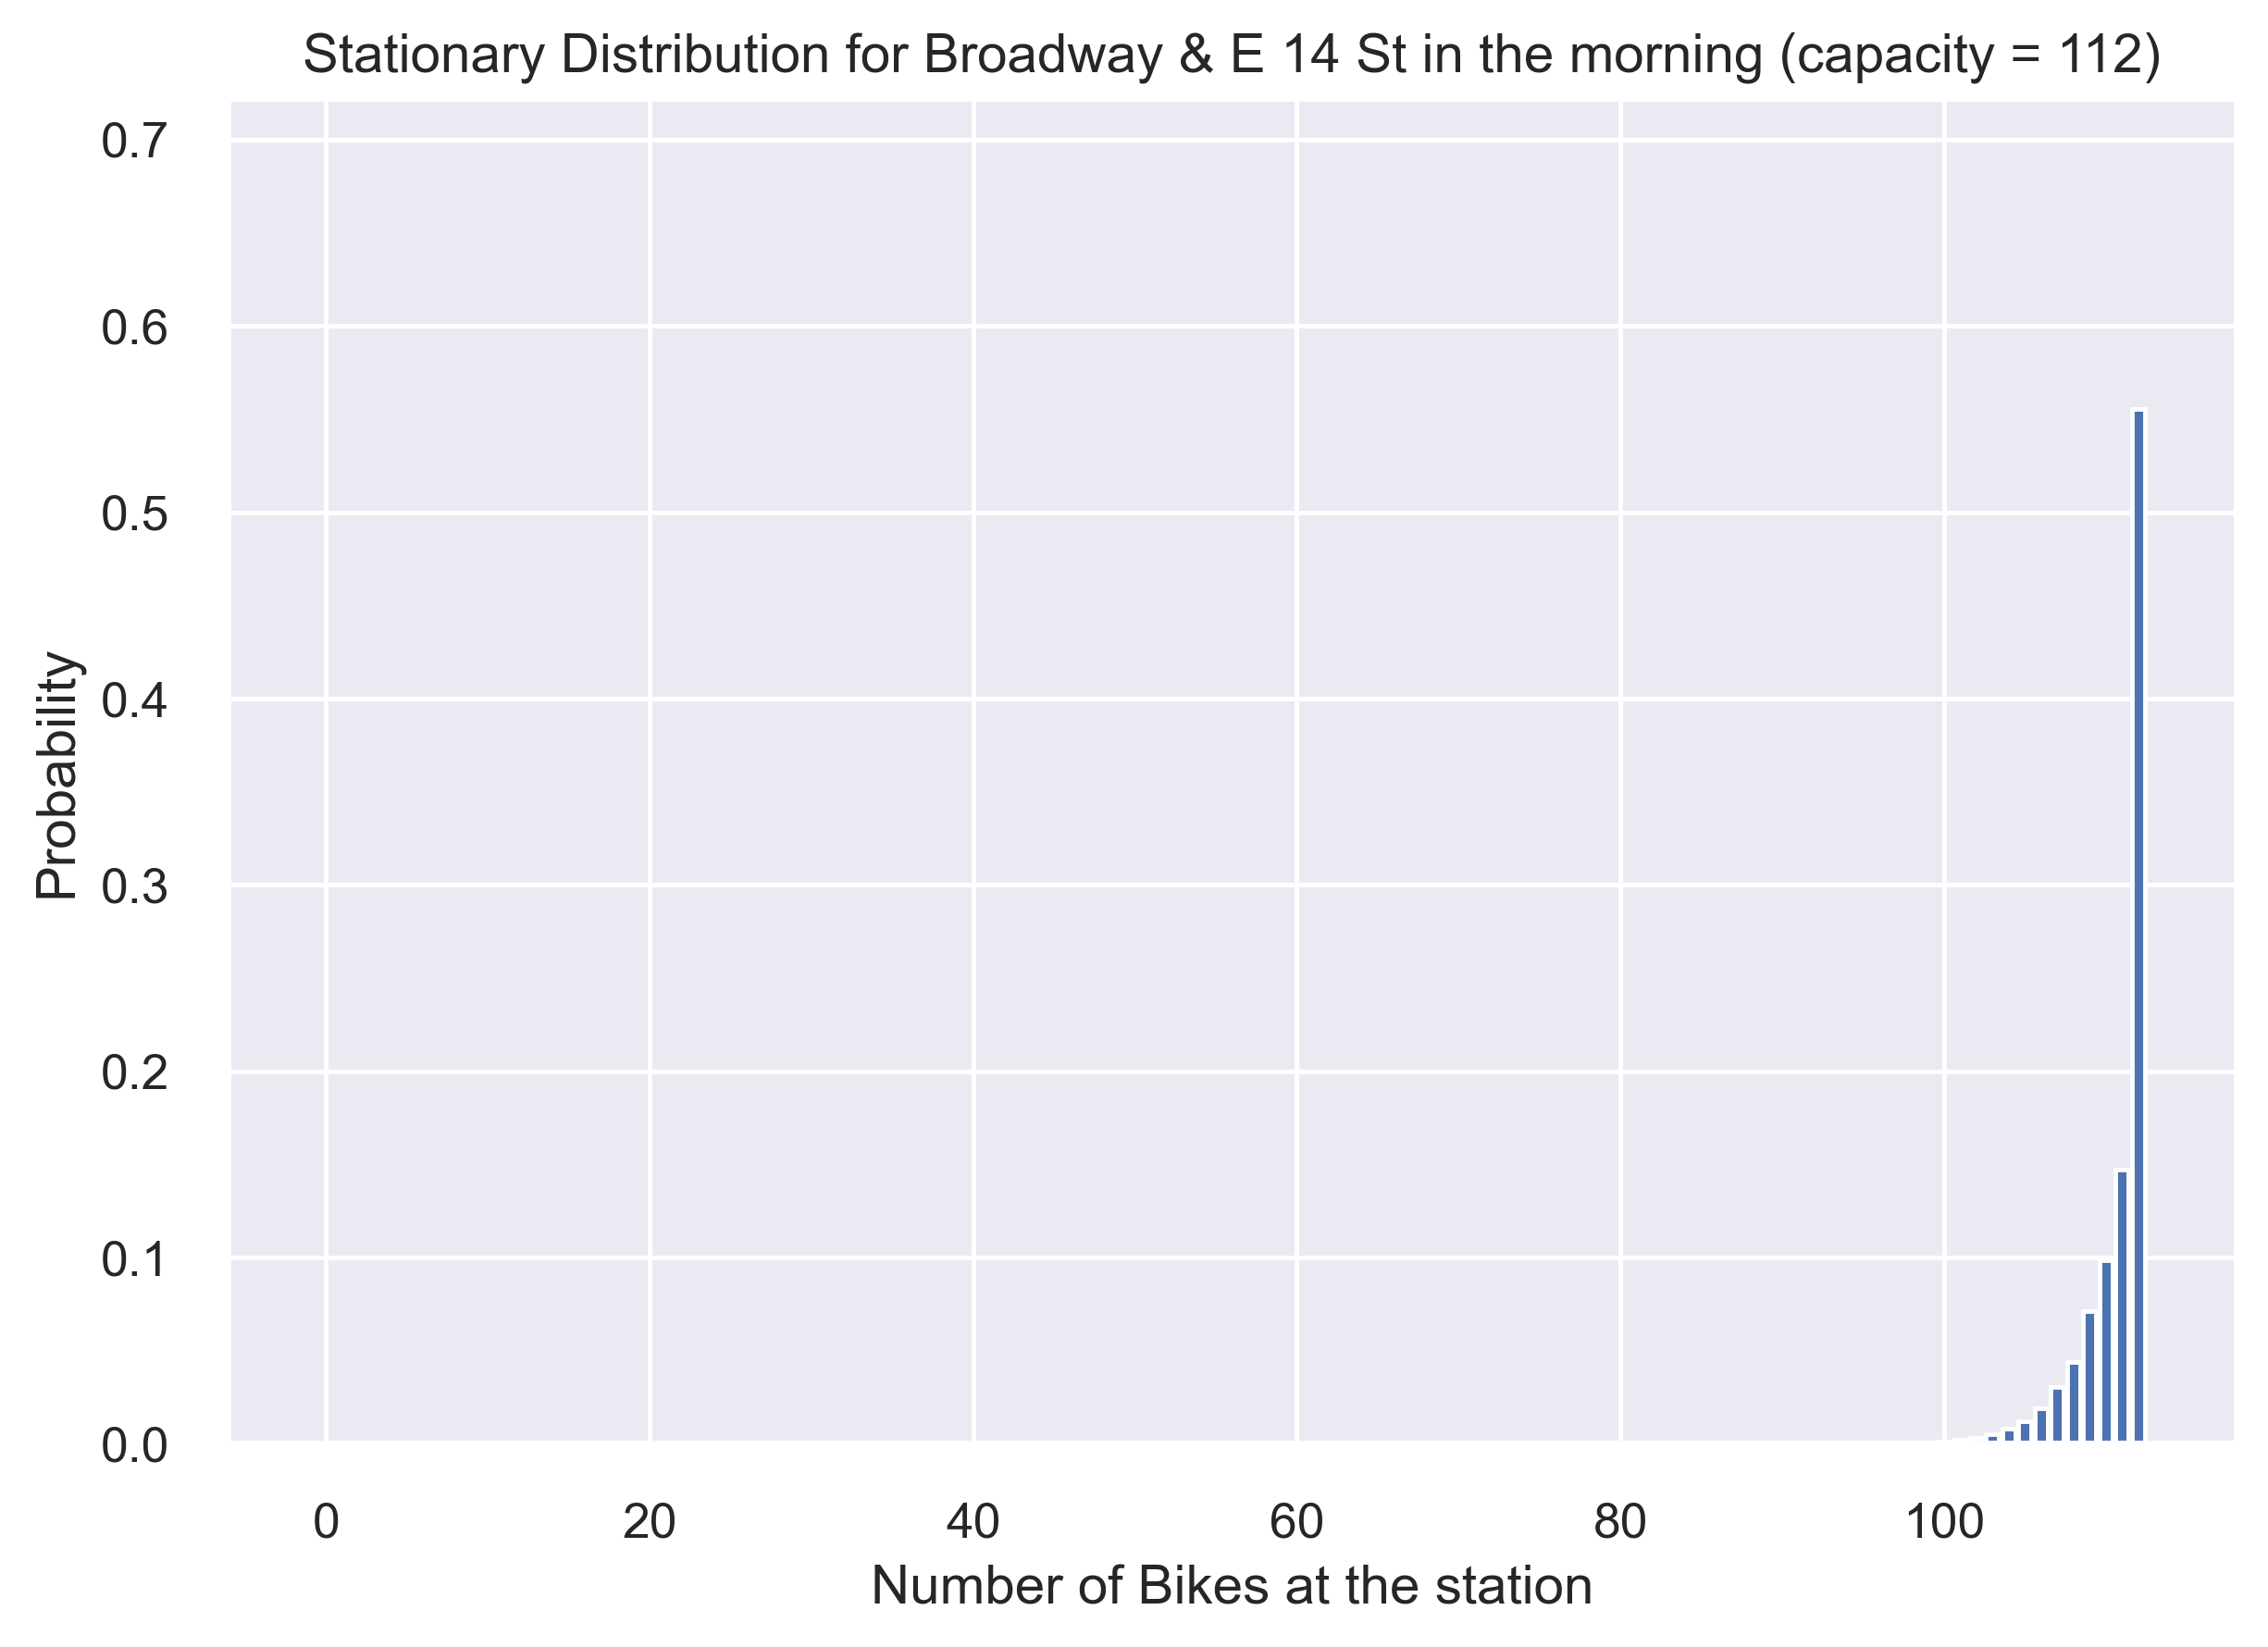

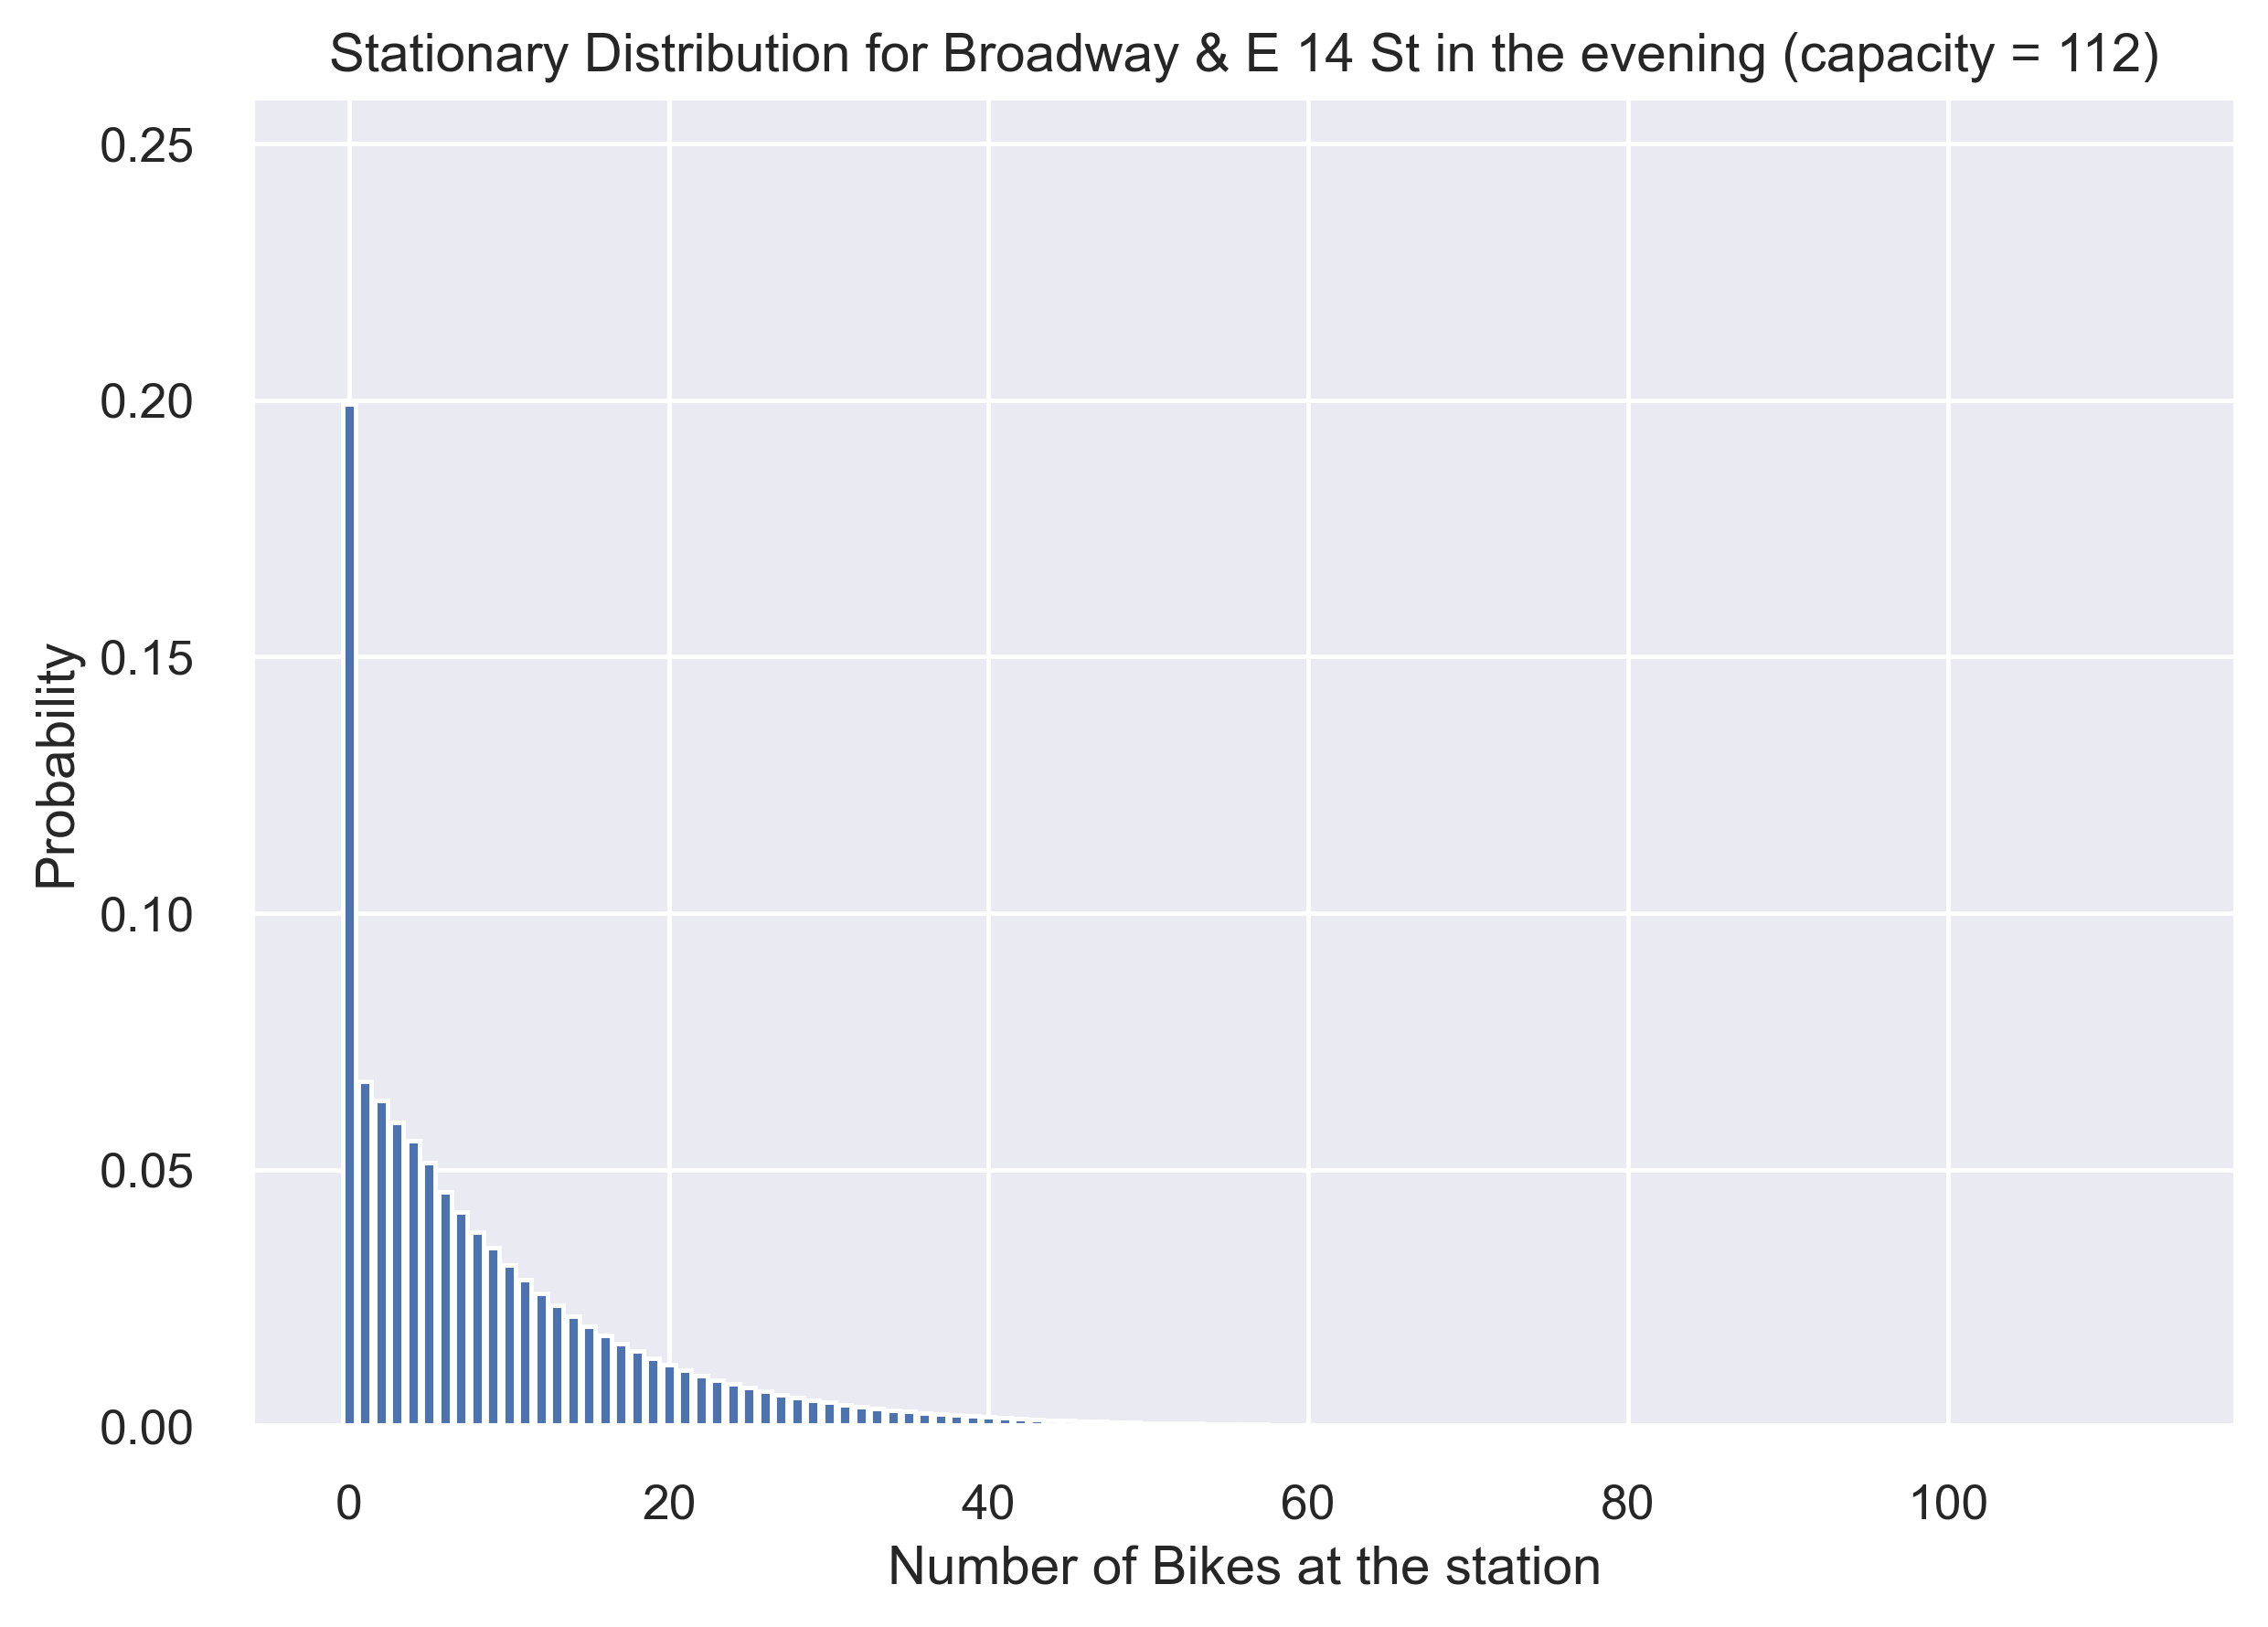

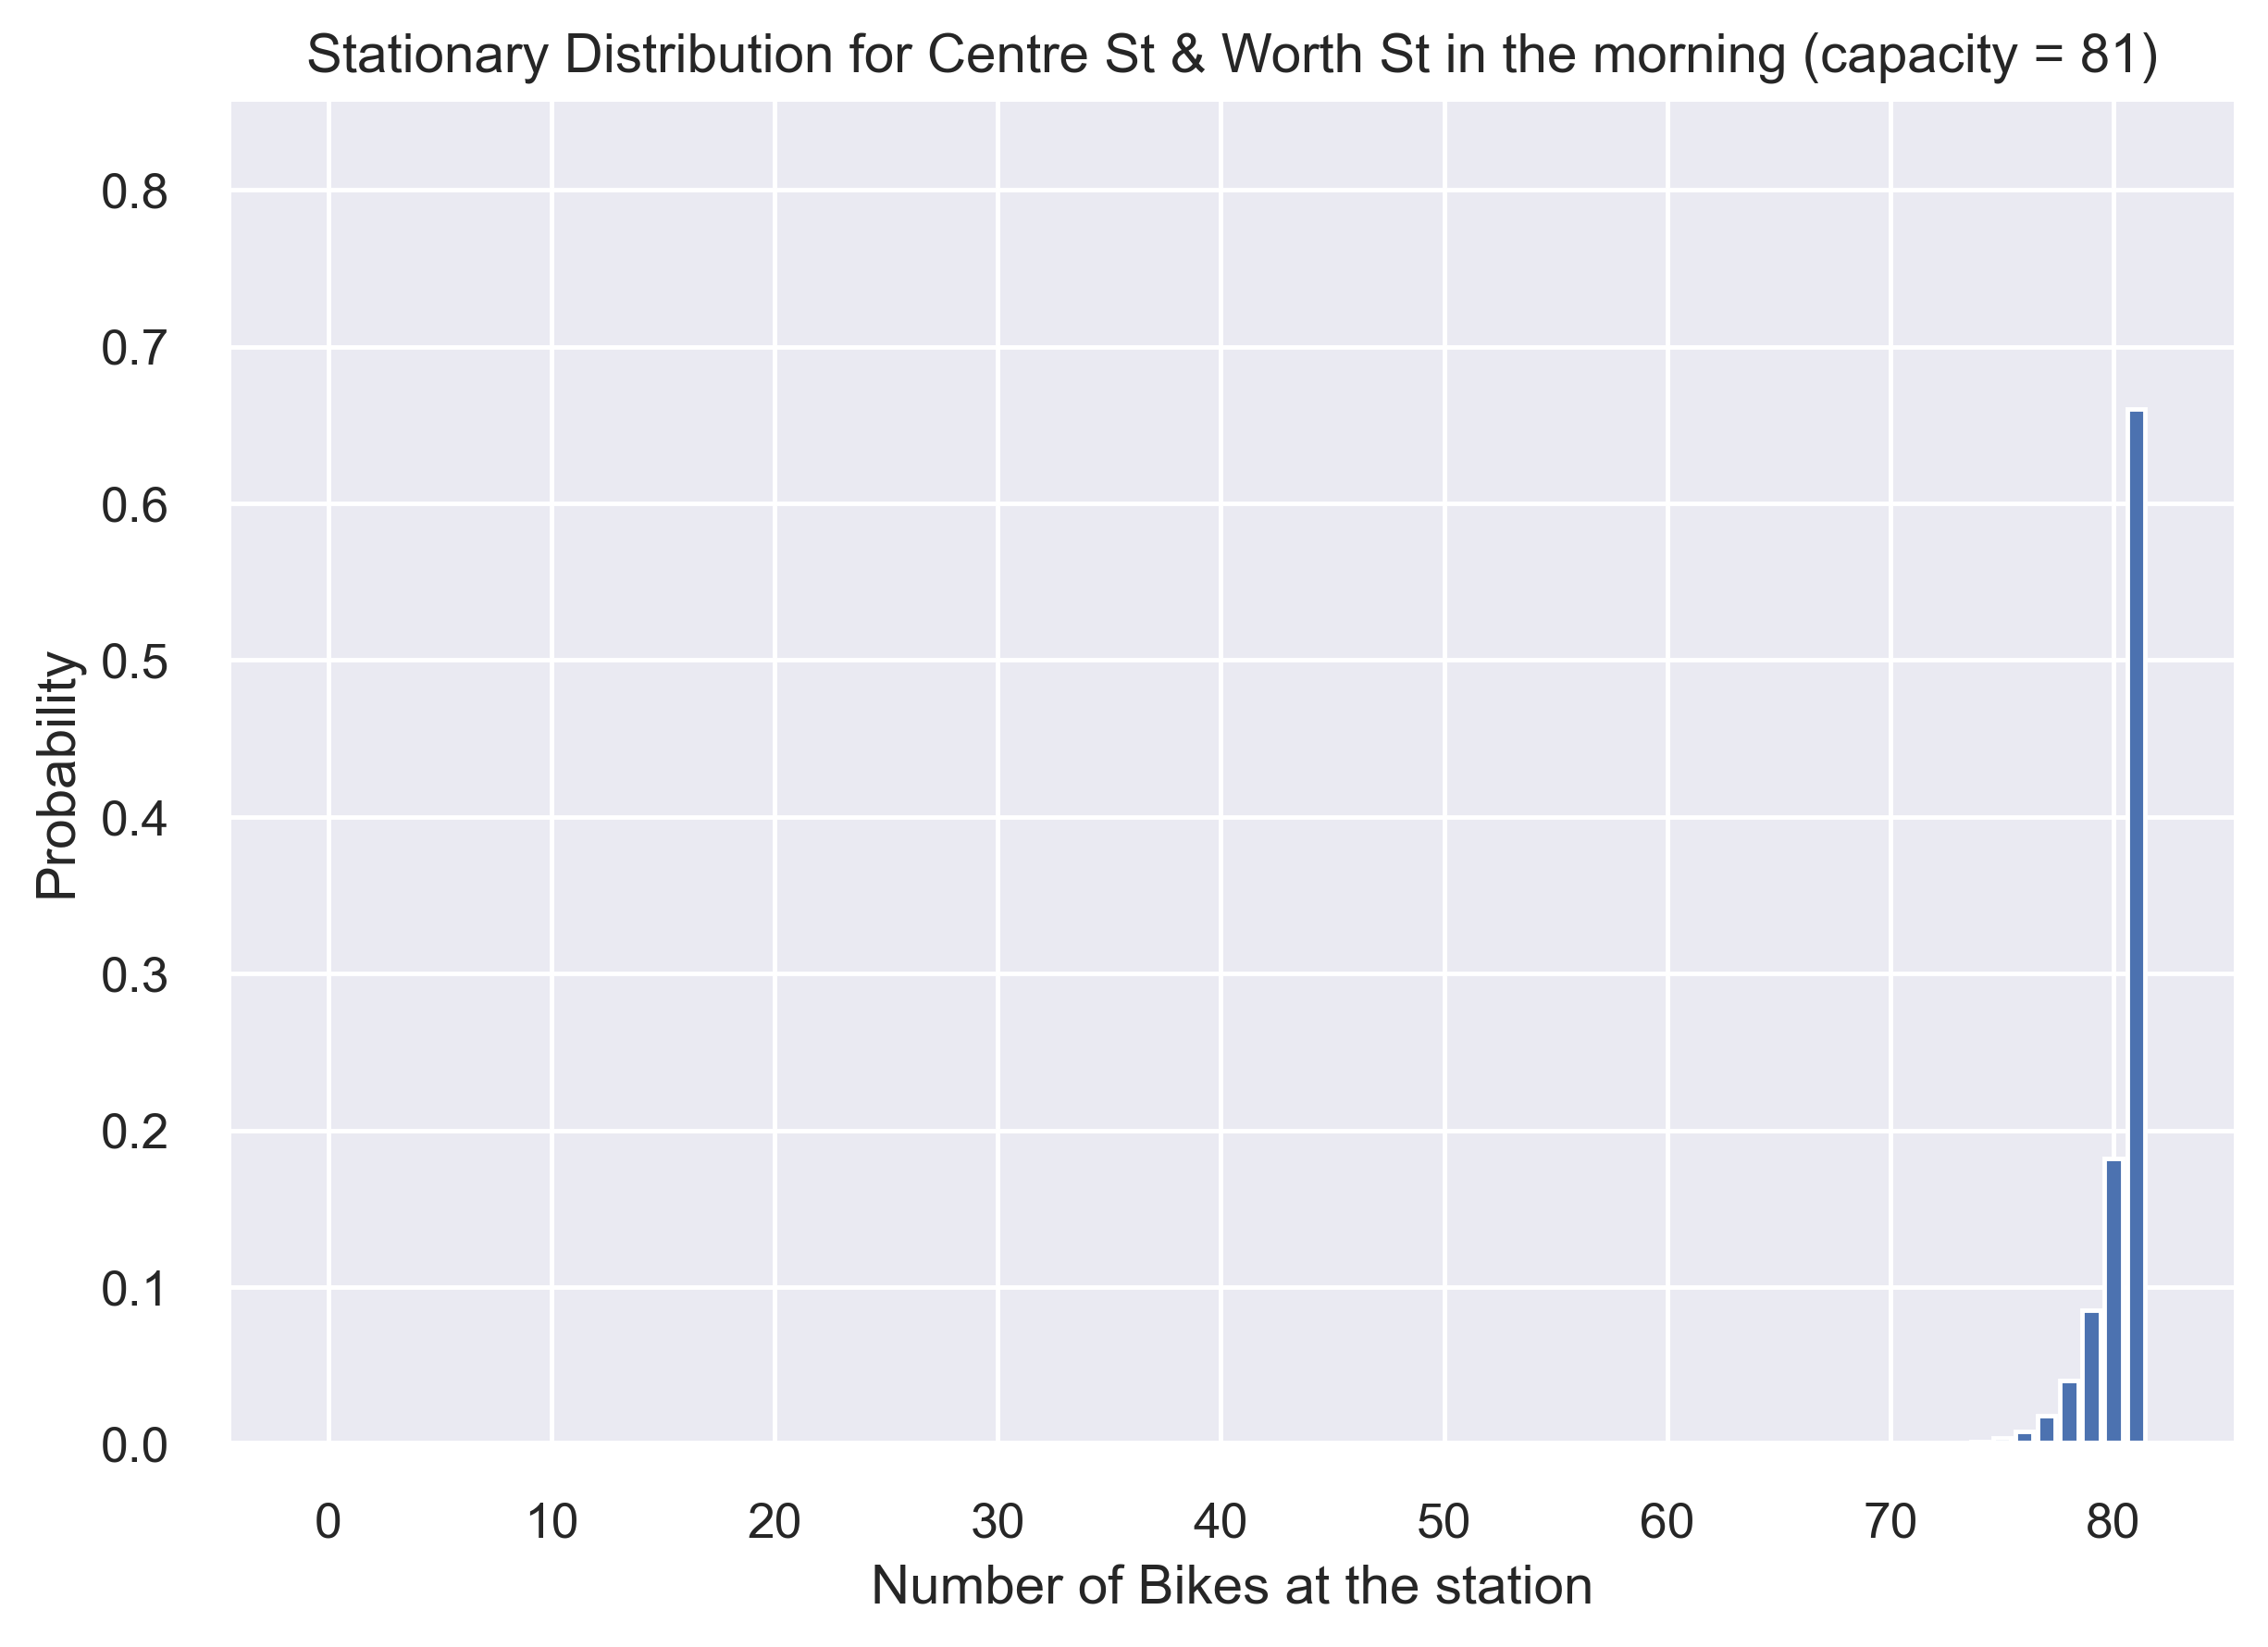

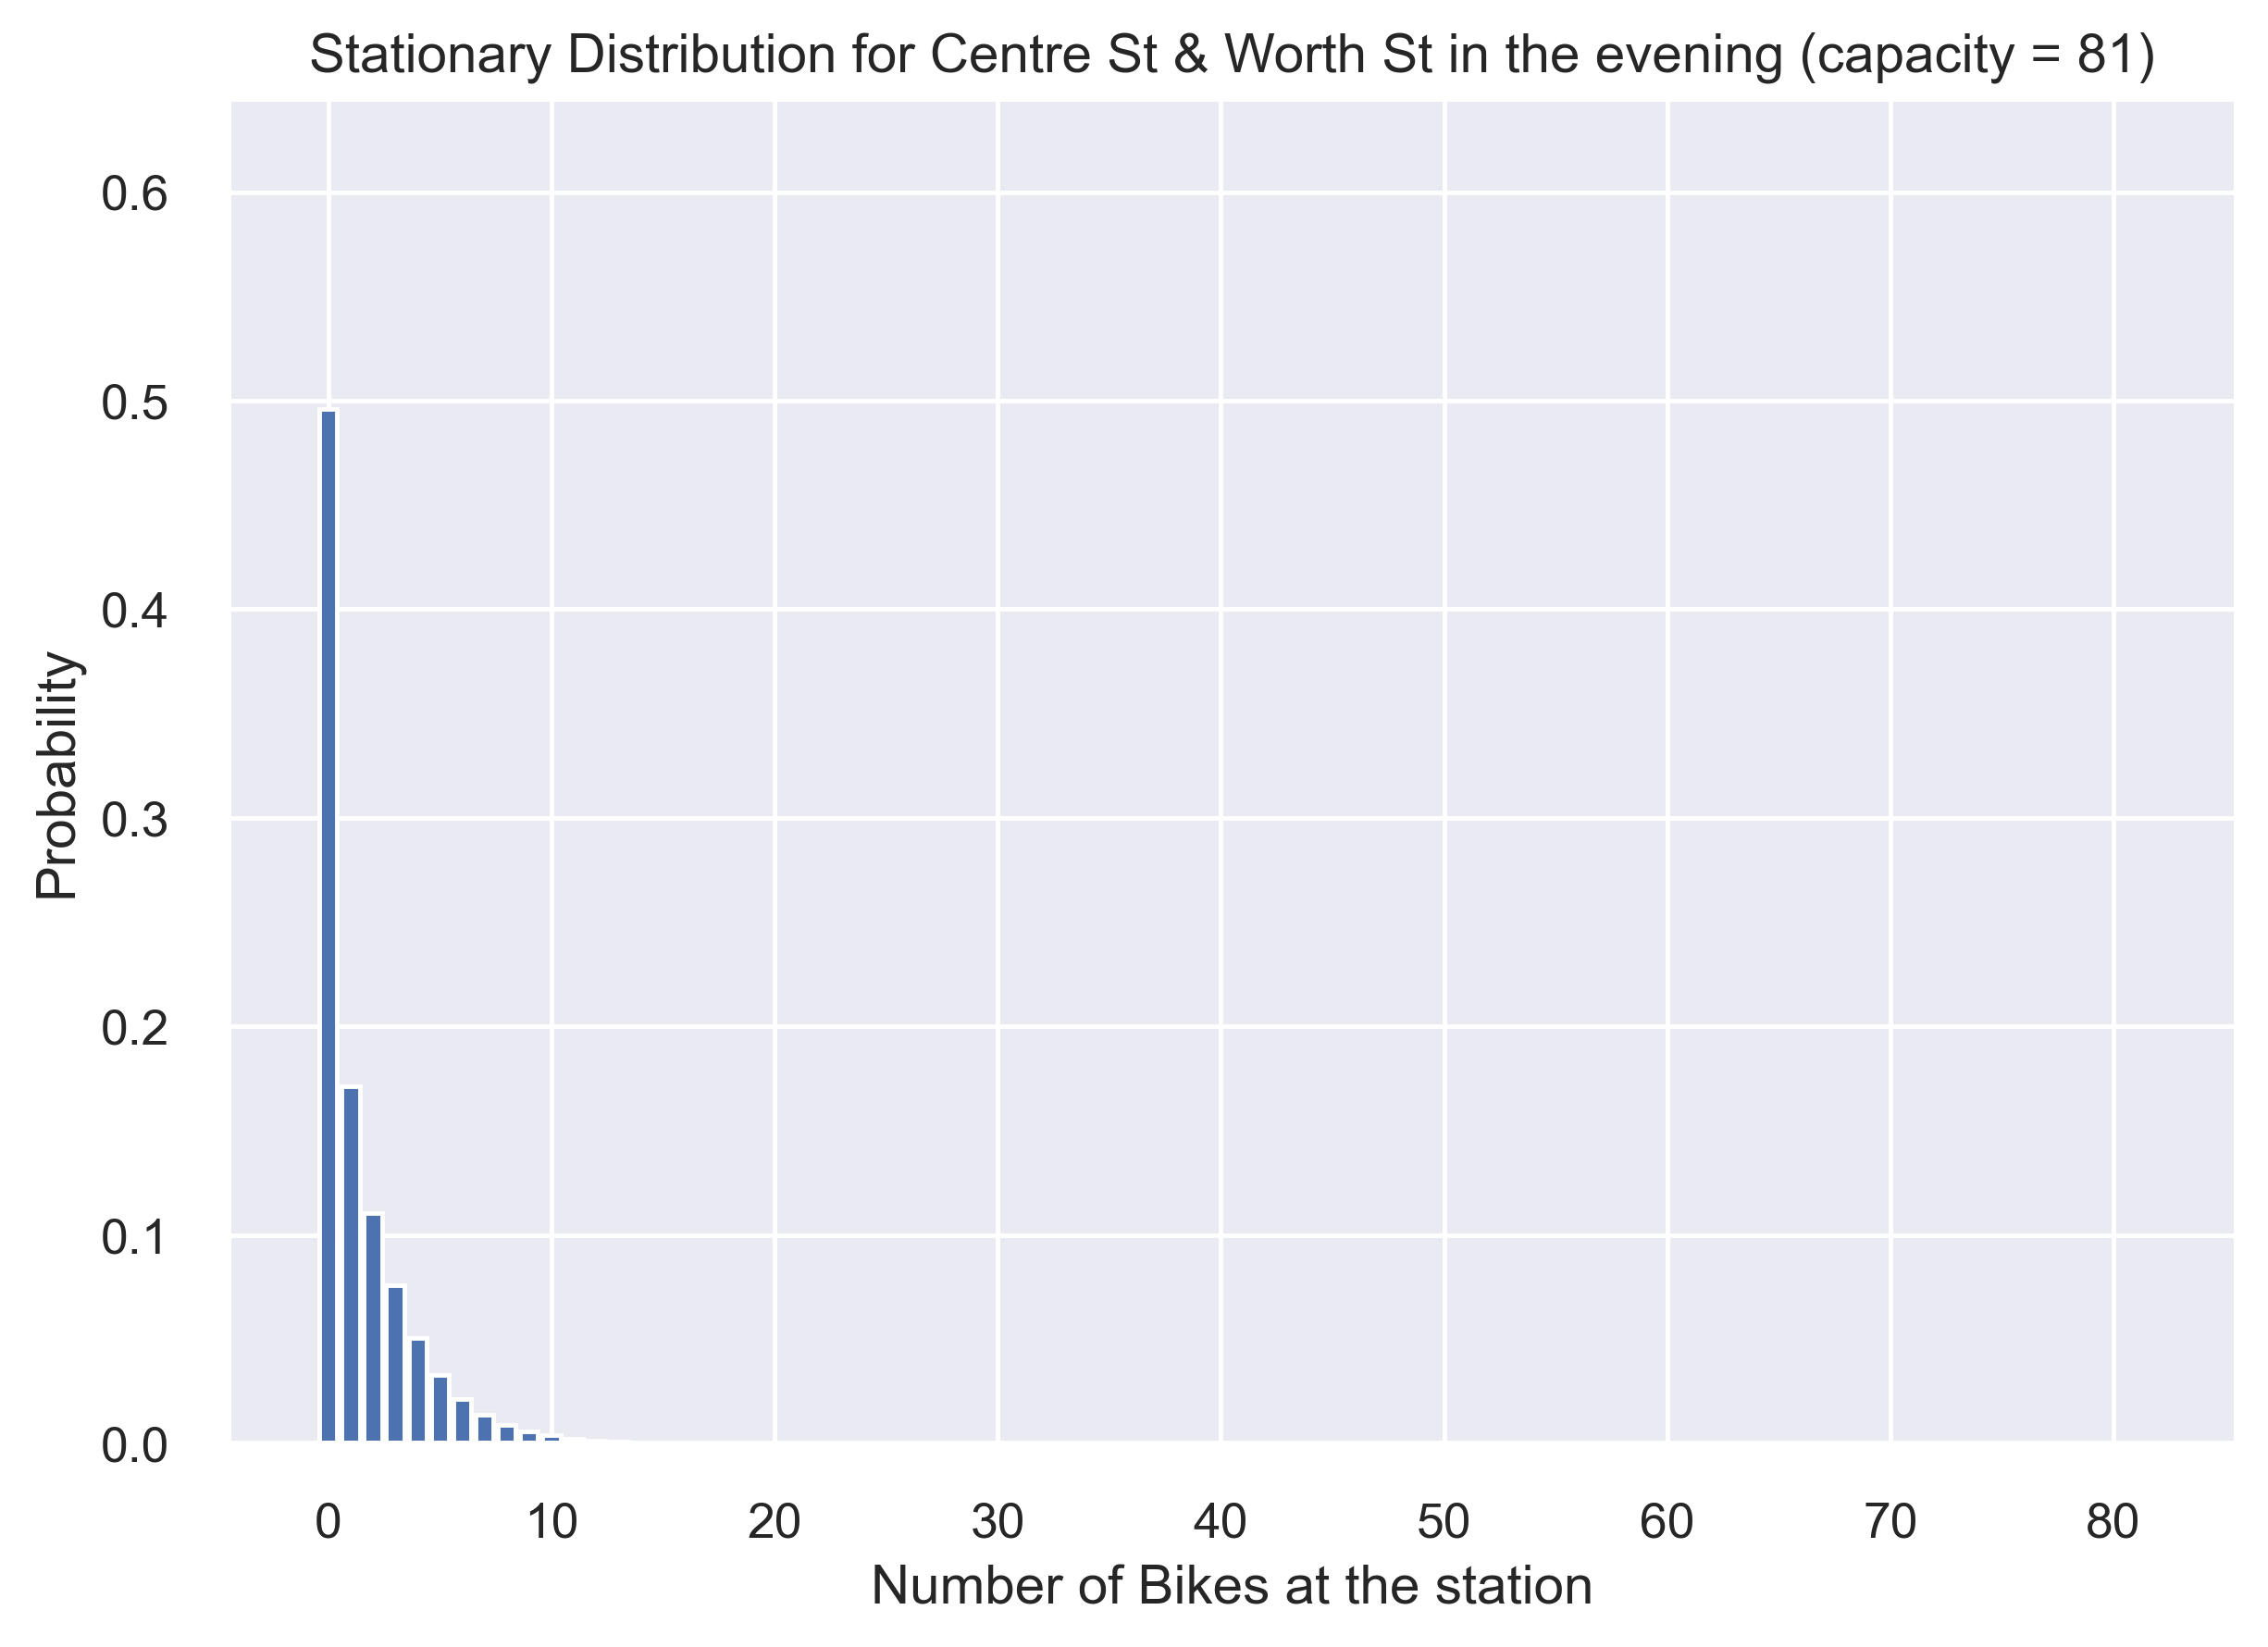

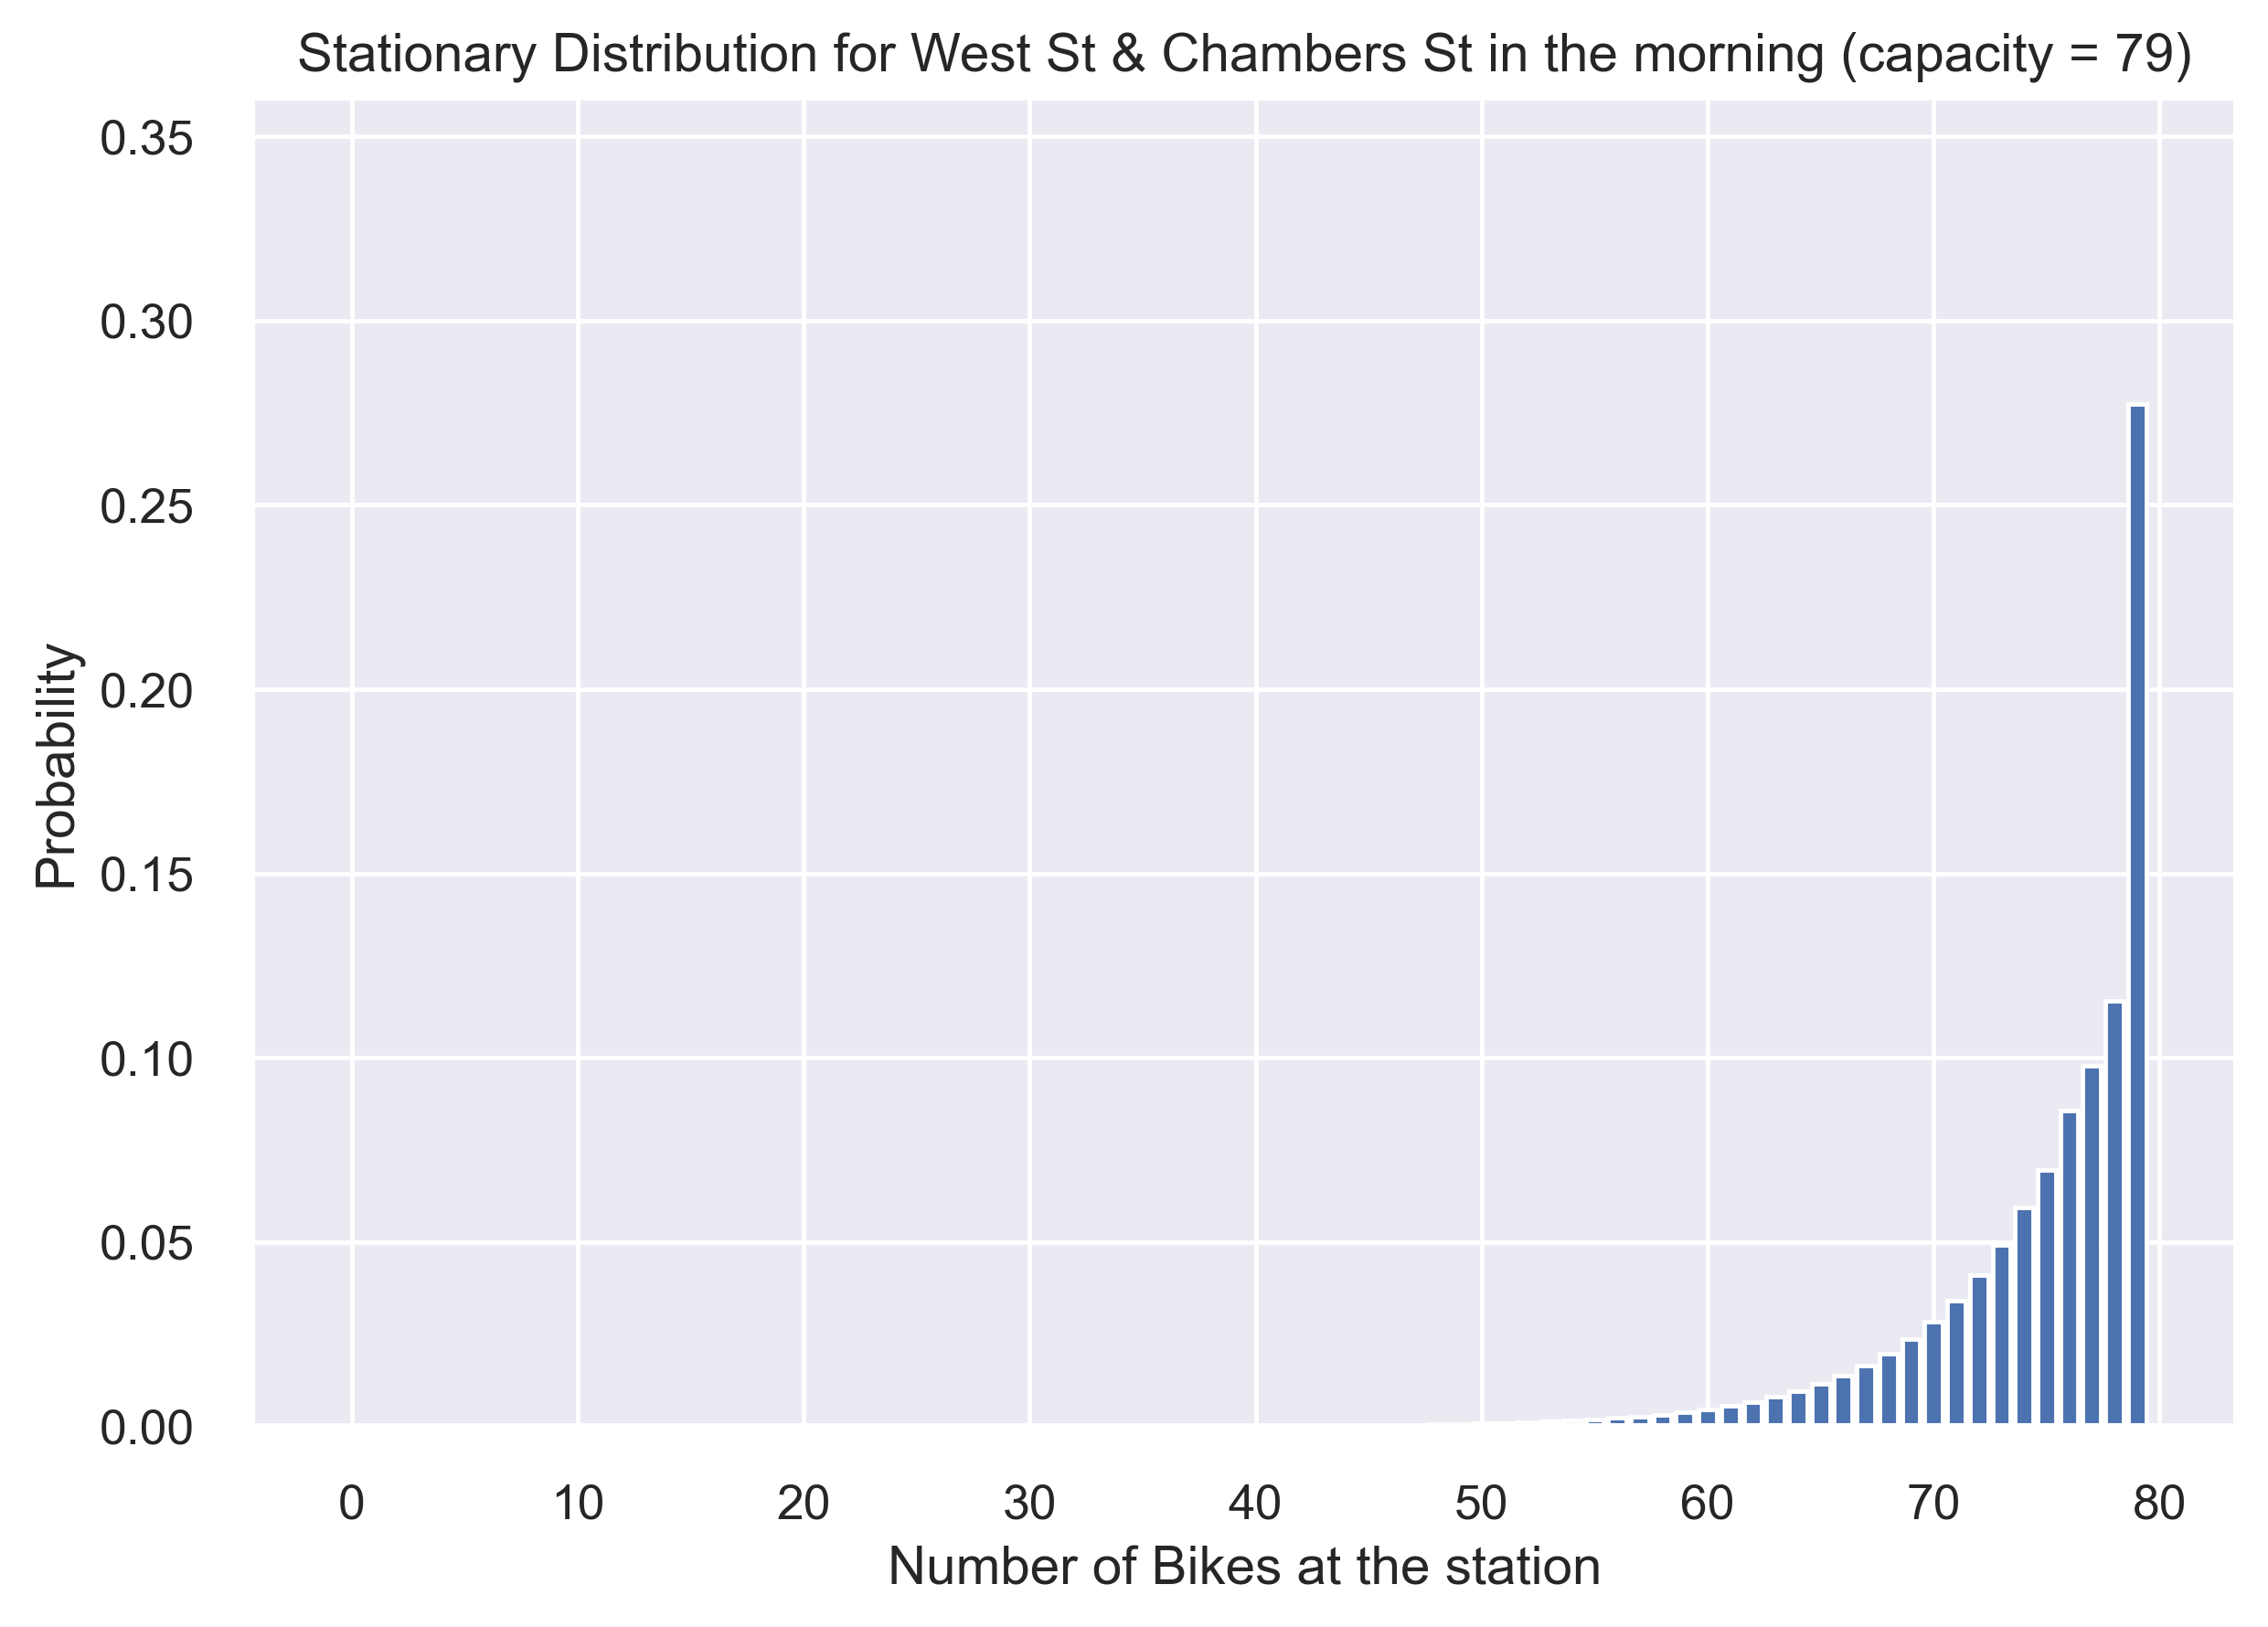

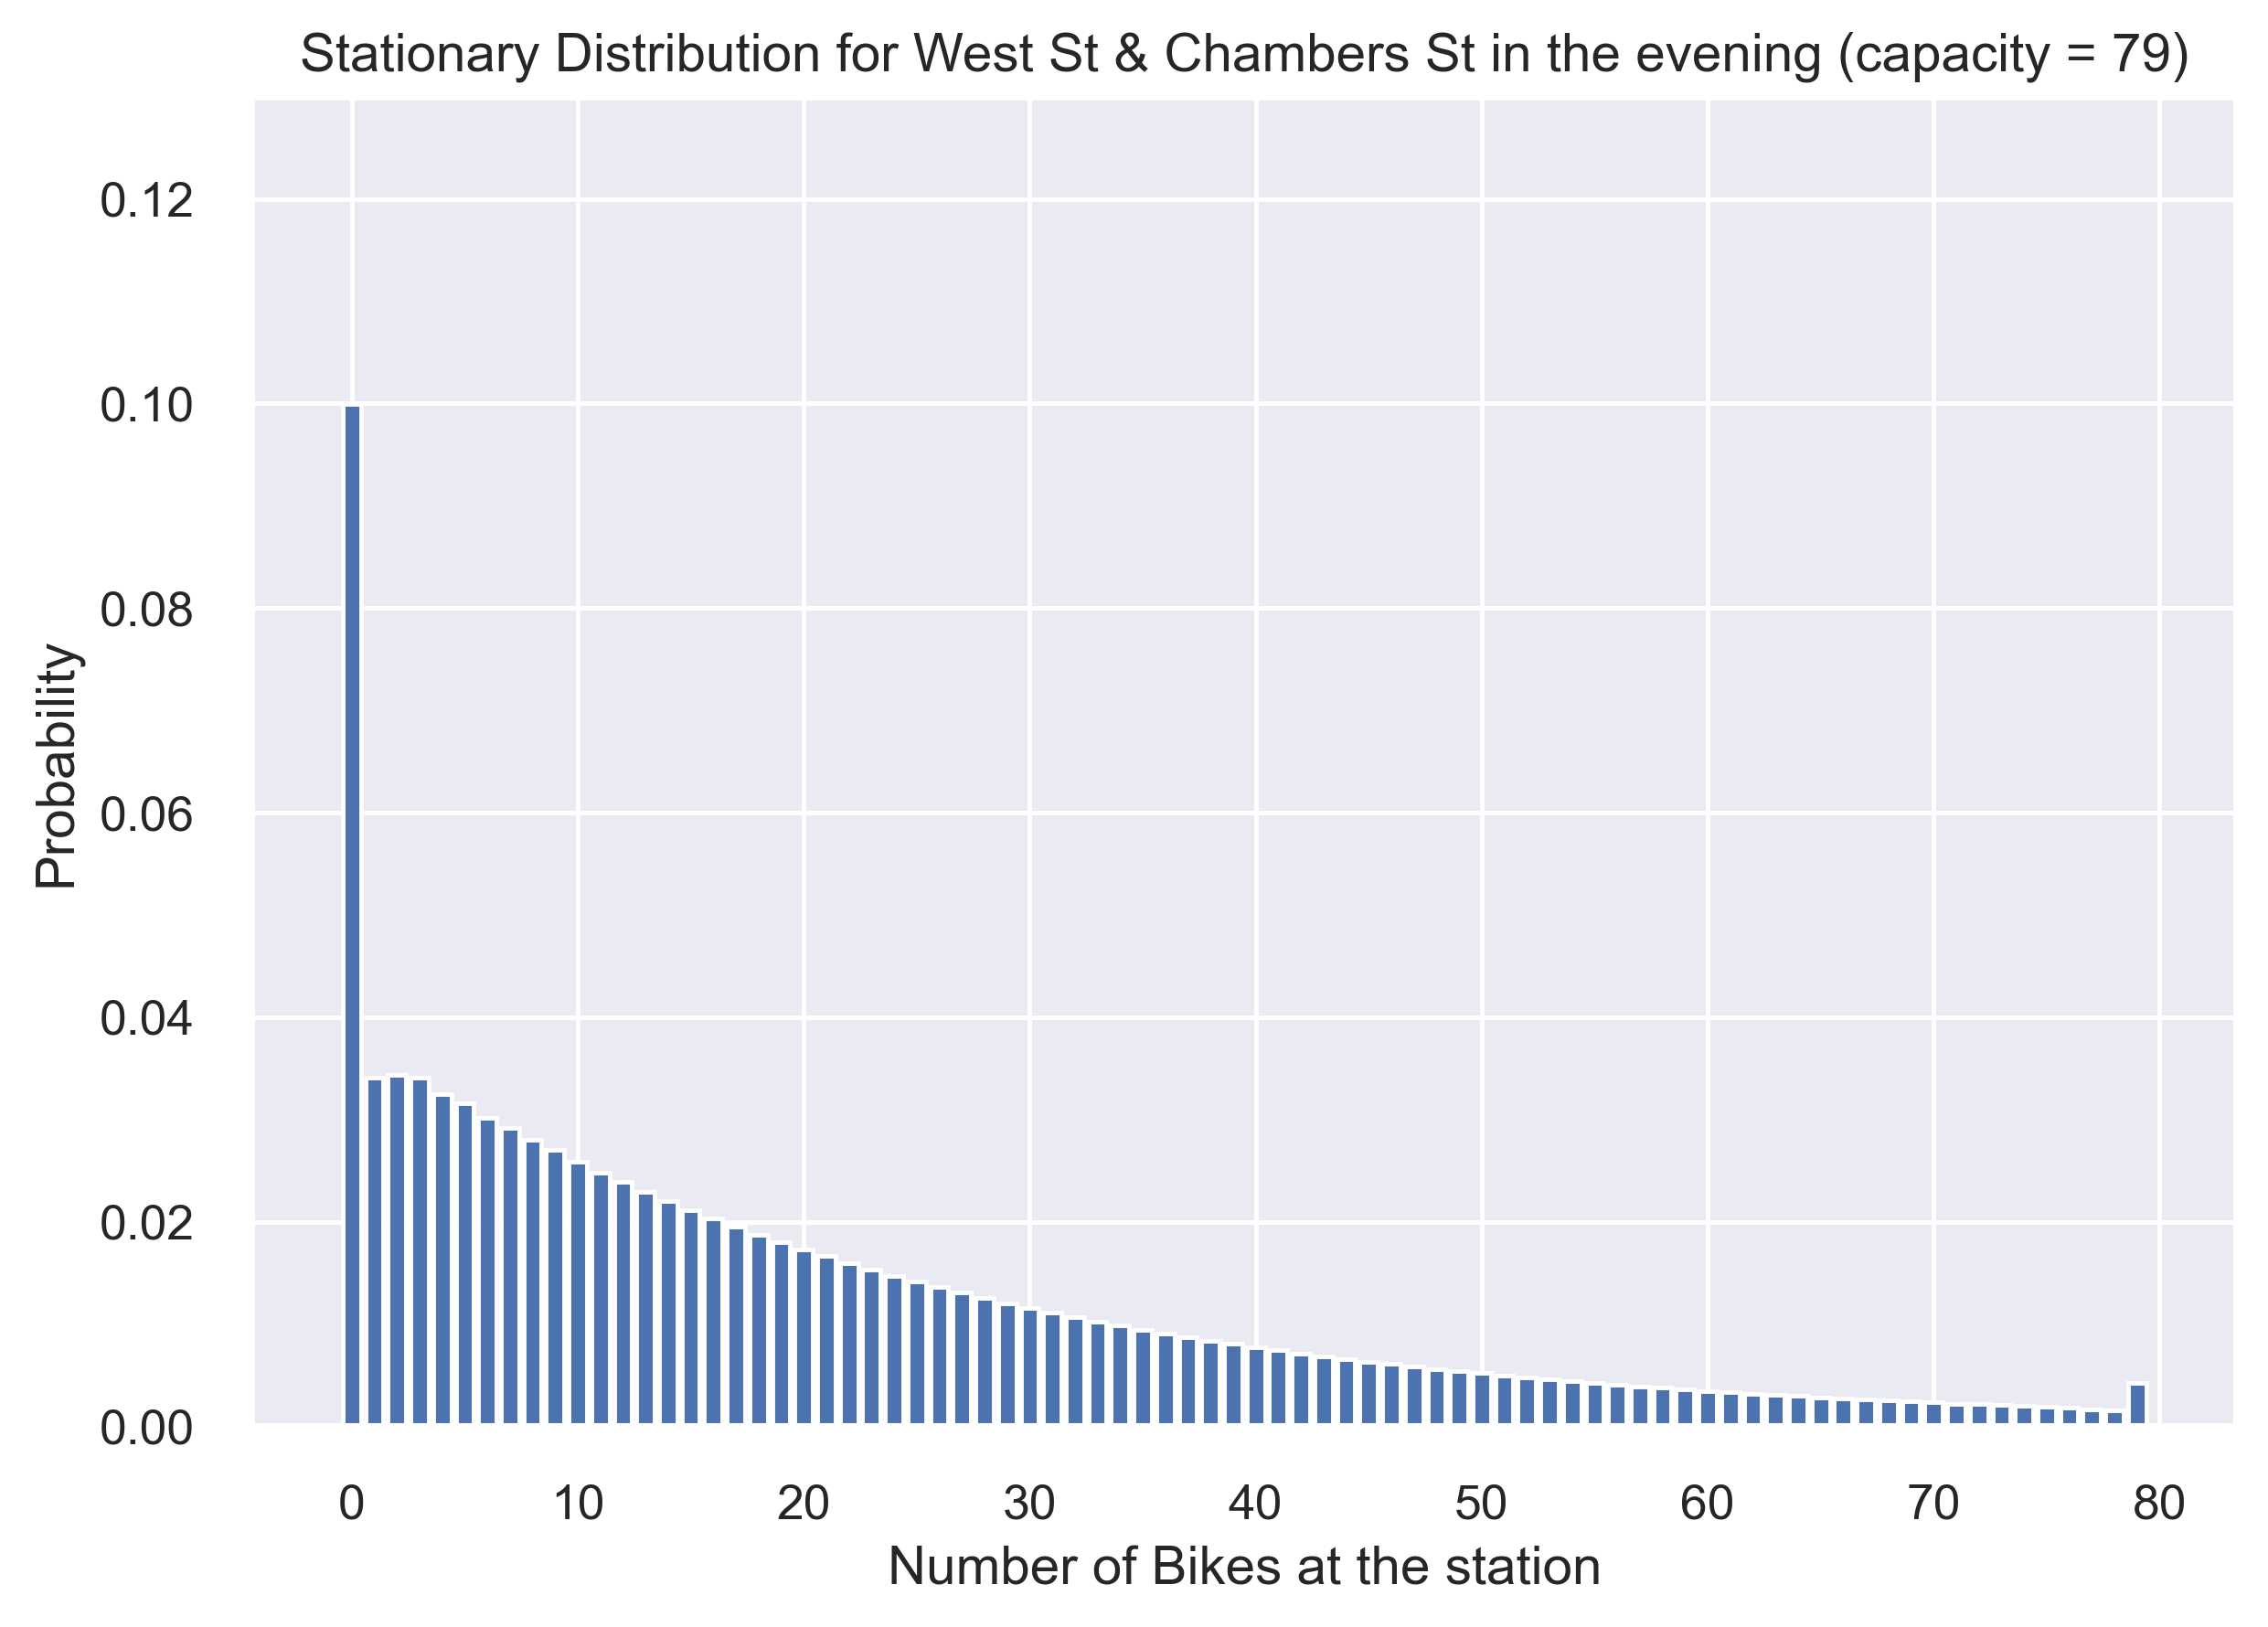

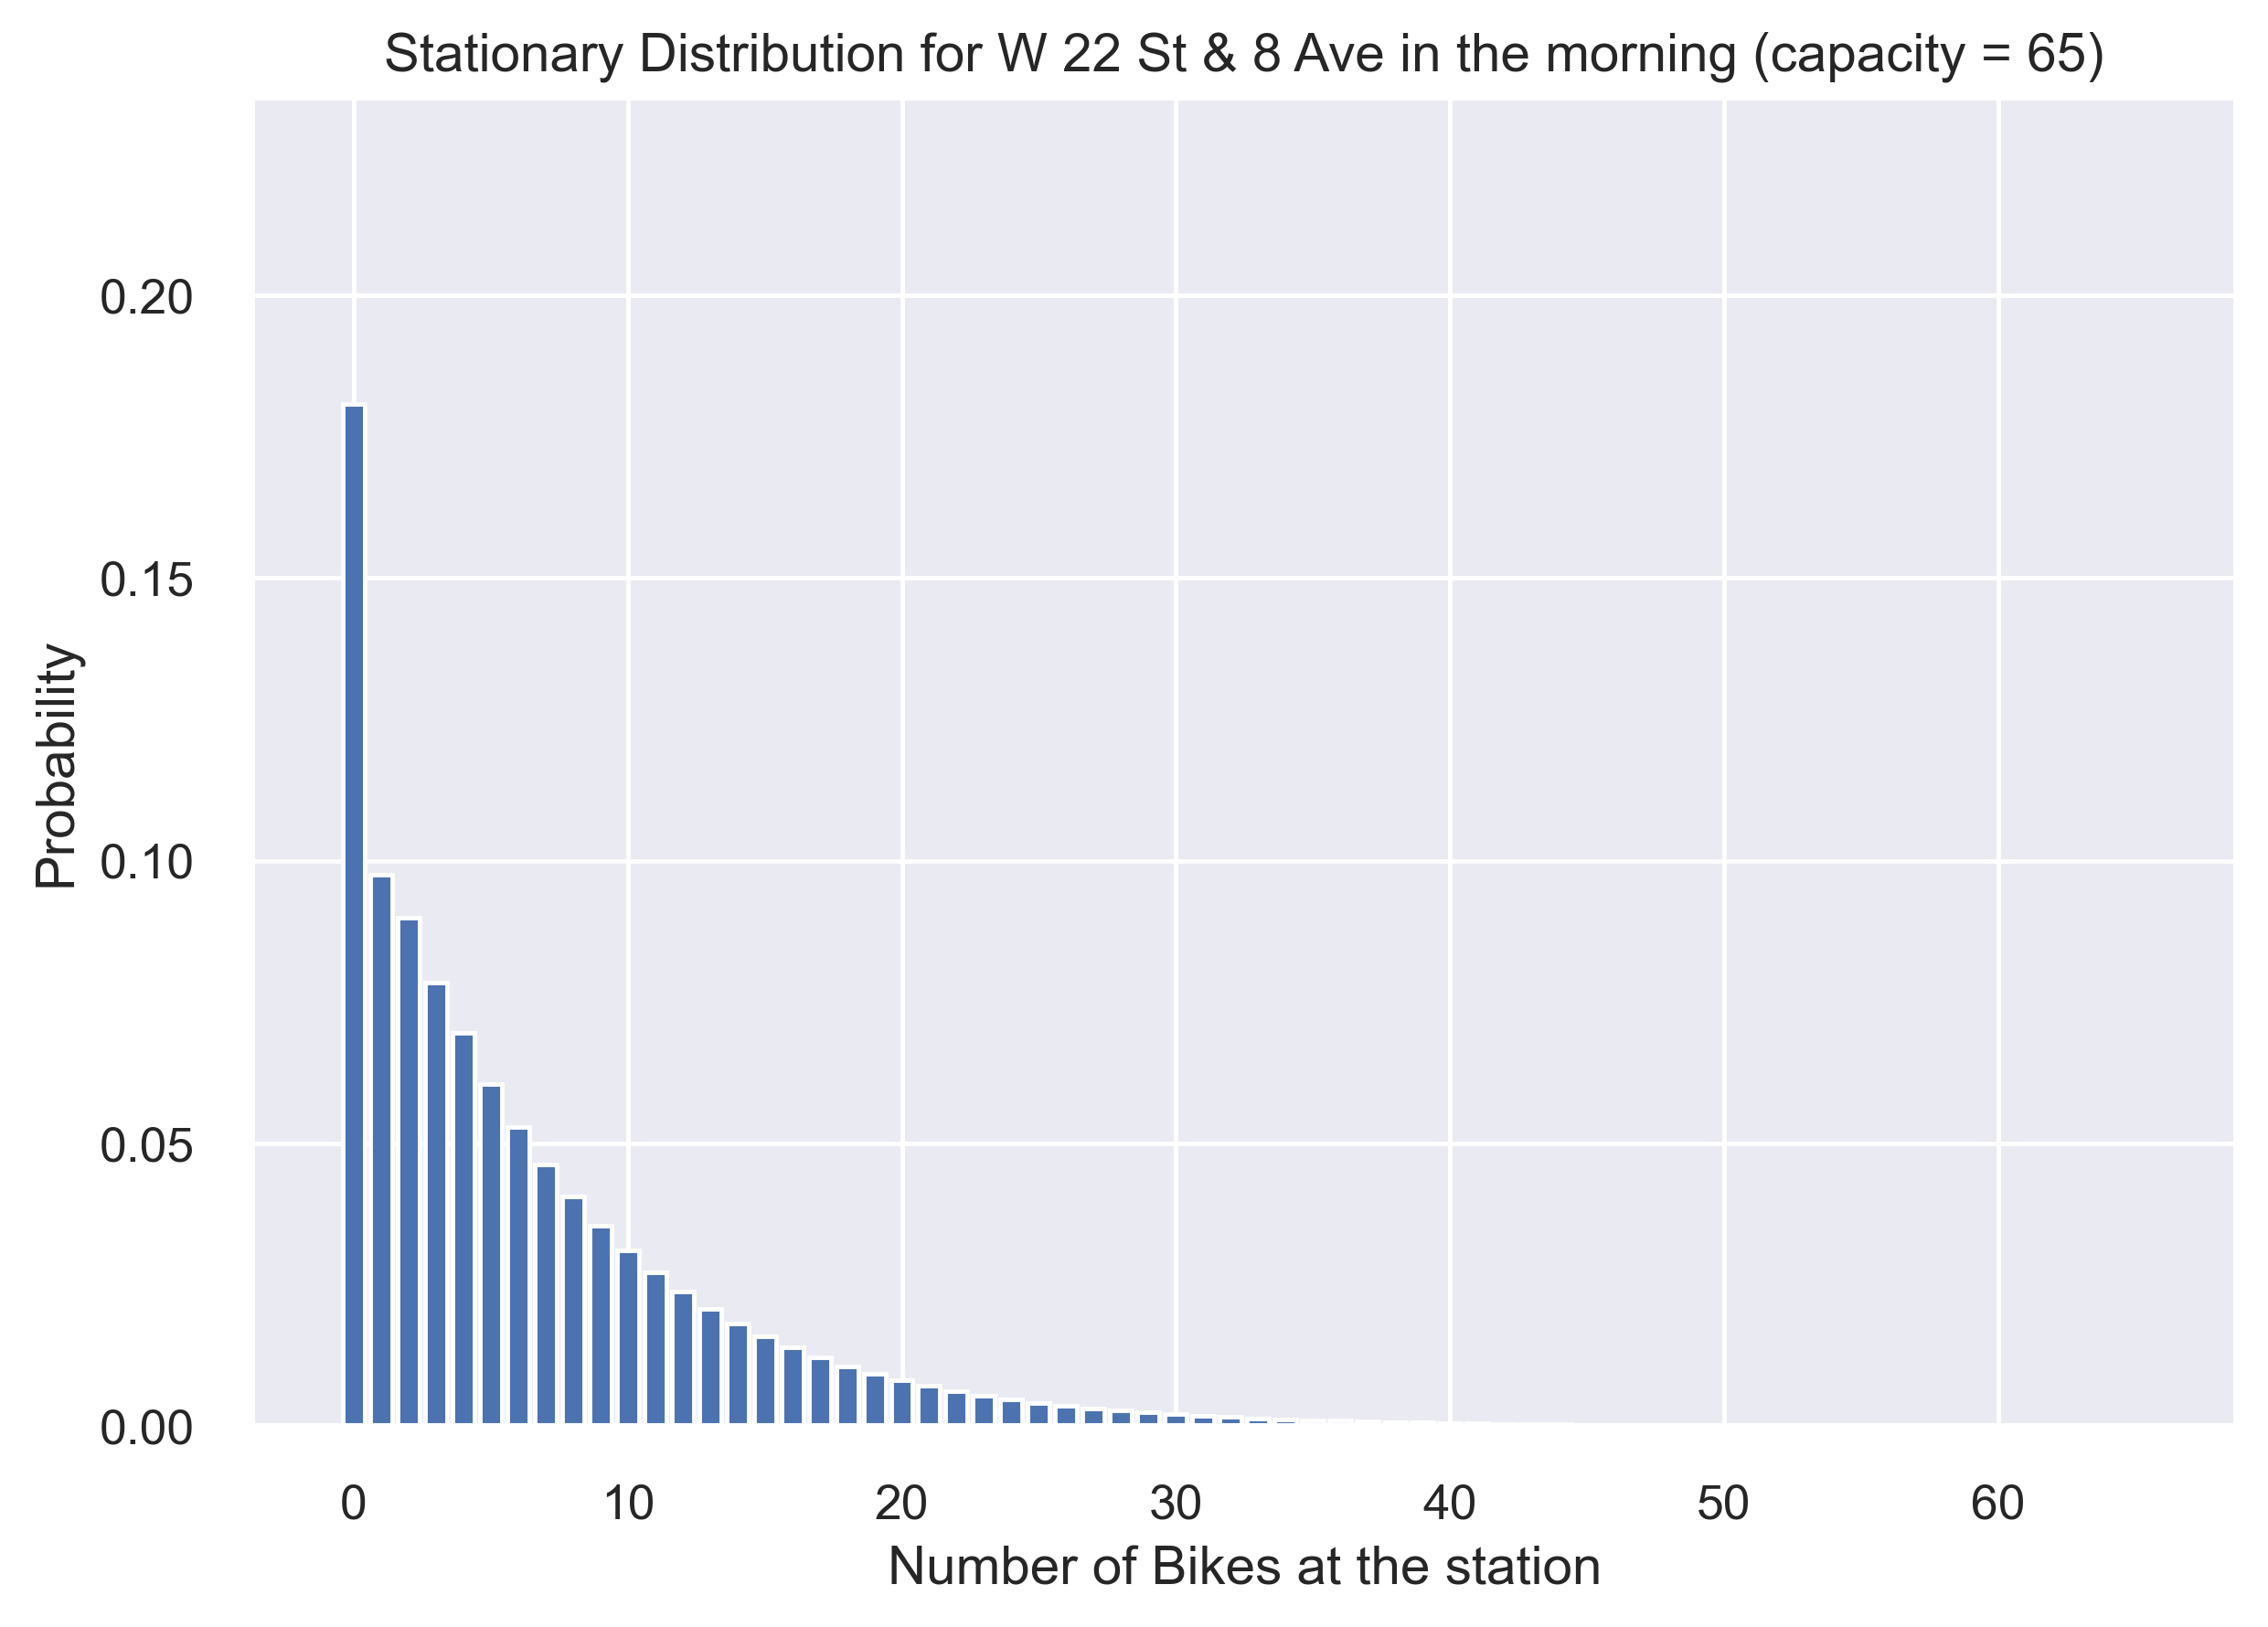

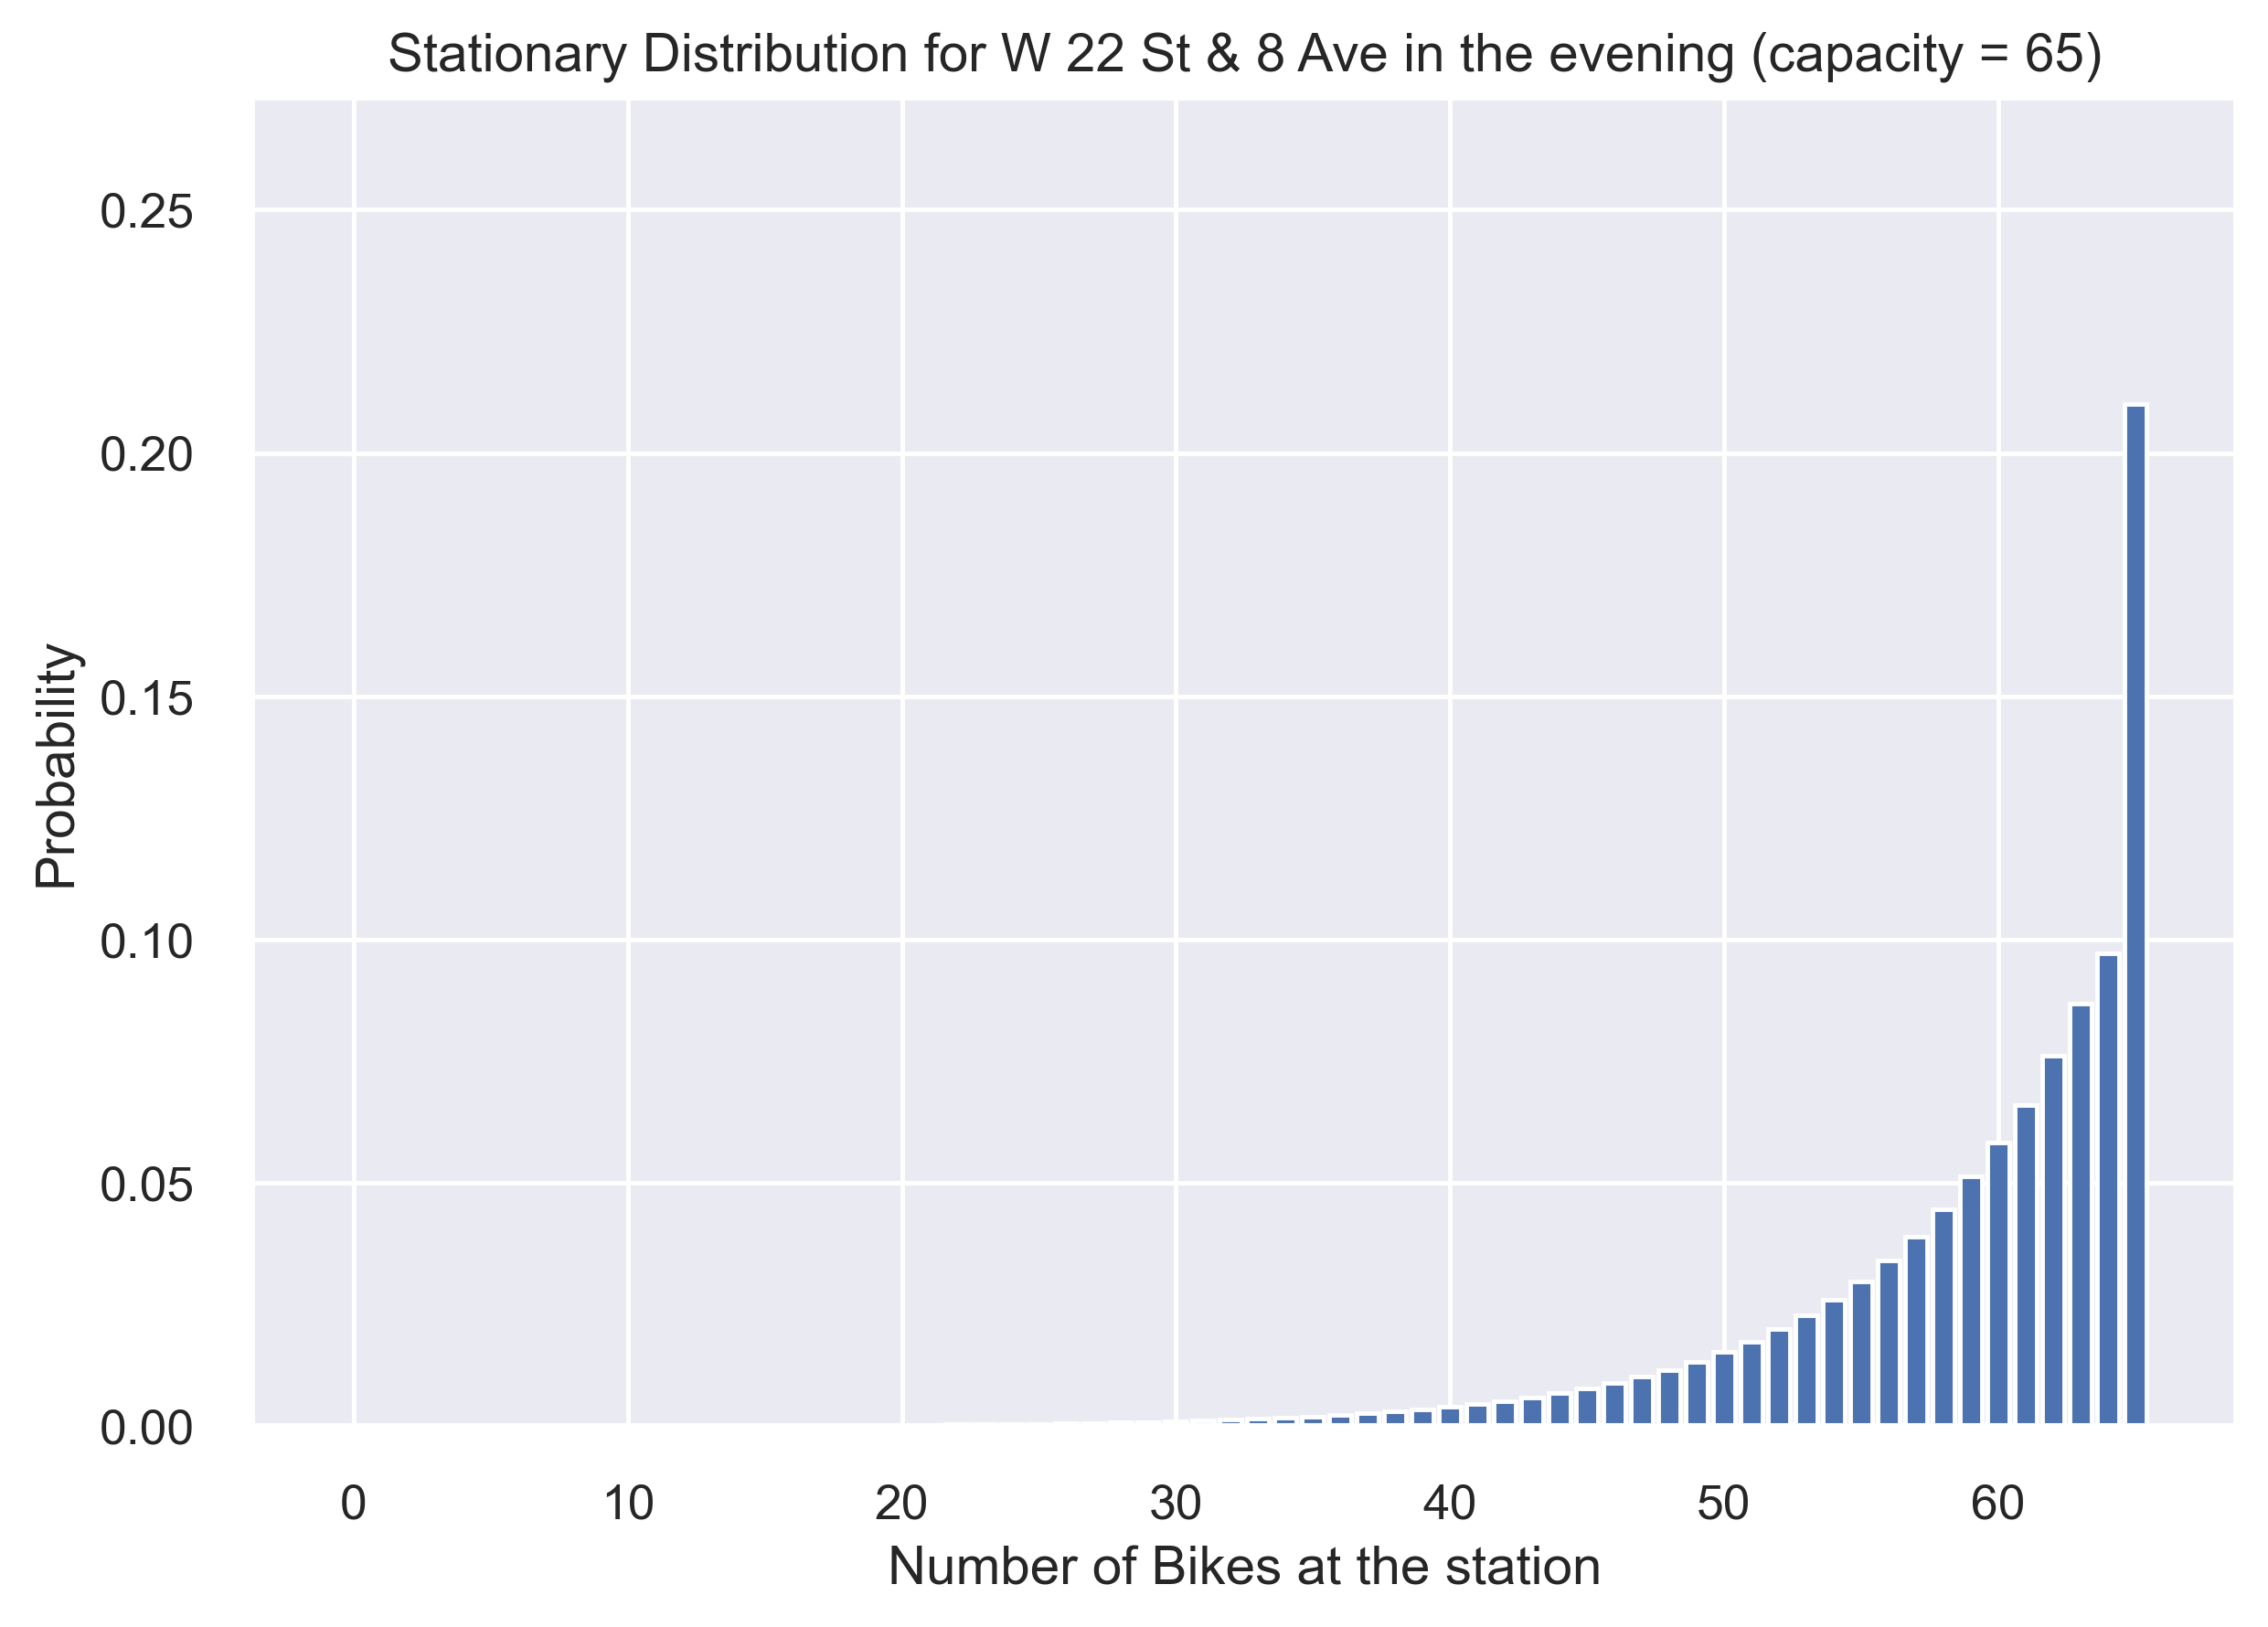

In [62]:
test_stations = ['W 21 St & 6 Ave', 'Broadway & W 58 St', 'Broadway & E 14 St', 'Centre St & Worth St', 'West St & Chambers St', 'W 22 St & 8 Ave']
capacities = [74, 74, 112, 81, 79, 65]

for i in range(len(test_stations)):
    for time in times:
        flow, probability, transition_matrix, stationary_distribution = get_all(test_stations[i], time, capacities[i])
        y = stationary_distribution
        x = np.arange(0, len(y), 1).tolist()

        plt.ylim(0, y.max()*1.3)
        plt.bar(x,y)
        plt.title('Stationary Distribution for ' + str(test_stations[i]) + ' in the ' + str(time) + ' (capacity = ' + str(capacities[i]) +')')
        plt.xlabel('Number of Bikes at the station')
        plt.ylabel('Probability')
        plt.show()

## Overall Conclusion

Random stations that are relatively popular and have large sample sizes were selected to compute the stationary distributions and all share a similar pattern, where there is a higher probability of being full in the morning and empty in the evening. Stations that were near prime cycling locations, such as, West St & Chambers St (station near the river) and Broadway & W 58 St (station near Central Park) also followed that pattern.

However, W 22 St & 8 Ave station, a station very close to 9 Ave & W 22 St demonstrates a similar behaviour to 9 Ave & W 22 St station where it is has a higher chance of being empty in the morning and full at night. This suggest that there are a lot of people taking out bikes out in that area in the morning and a lot of bikes arriving to those stations in the evening. Whilst geographic location could explain the stationary distribution of 9 Ave & W 22 St station, the precise reason is unclear. Many external factors could explain this pattern. Therefore, further research on Citibike activity and behaviour have to be conducted to understand the pattern.

Overall, this project only calculates the stationary distributions for one month. It is not representative of the station at any point of the year because seasons (e.g. less people cycling in winter) and other external factors (e.g. the pandemic) may influence the stationary distributions. To gain a better insight of the activities of these stations, computations should be conducted on the same month over a few years. Whilst it may be time consuming, it would provide valuable insights and help in planning Citibike’s next steps.




# References
- Citibike (2022). _How we’re rebalancing the Citi Bike system._ Last accessed 22 Nov 2022 from: 
https://ride.citibikenyc.com/blog/rebalancing-the-citi-bike-system 
- Mandel, David (2016). _Markov Chains and Stationary Distributions._ Last accessed 21 Nov 2022 from: 
https://www.math.fsu.edu/~dmandel/Primers/Markov%20Chains%20and%20Stationary%20Distributions.pdf
- Novembre, John (2016). _Computing Stationary Distributions of a Discrete Markov Chain._ Last accessed 21 Nov 2022 from: 
https://stephens999.github.io/fiveMinuteStats/markov_chains_discrete_stationary_dist.html
- Vergara, Nina (2021). _Calculating Stationary Distribution in Python._ Last accessed 21 Nov 2022 from: 
https://ninavergara2.medium.com/calculating-stationary-distribution-in-python-3001d789cd4b